# Análise sobre mortes decorrentes de complicações da Aids no ano de 2016

### Dados coletados em: DATASUS  Tecnologia da Informação a Serviço do SUS
#### Fonte: http://tabnet.datasus.gov.br

Bibliotecas importadas:

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
import pysal

### CID's 10 utilizados:

B20 Doença pelo vírus da imunodeficiência humana [HIV], resultando em doenças infecciosas e parasitárias.

B21 Doença pelo vírus da imunodeficiência humana [HIV], resultando em neoplasias malignas.

B22 Doença pelo vírus da imunodeficiência humana [HIV] resultando em outras doenças especificadas.

B23 Doença pelo vírus da imunodeficiência humana [HIV] resultando em outras doenças.

B24 Doença pelo vírus da imunodeficiência humana [HIV] não especificada.

# Importação dos dados do ano de 2006
### Após a importação, foi necessário remover os números que vinham juntos com o nome do município, alterar os nomes das colunas e deixar os nomes dos municípios com caracteres maiúsculos 

In [23]:
df2006 = pd.read_csv('./dados/dados_aids_2006.csv',sep=';',encoding='ANSI', header=4)
df2006 = df2006[:314]
listaMunicipio = []

for item in df2006['Município']:
    listaMunicipio.append(item[7:]) 
df2006['Município'] = listaMunicipio

colunas = ('municipio obitos').split()
df2006.columns = colunas
df2006.municipio = df2006.municipio.str.upper()

# Importação do shapefile do estado de São Paulo
### As colunas foram renomeadas e foi feita a junção do dado csv do ano de 2006 , com os dados tabulares do shapefile. Após a junção, foram excluidas as linhas que não possuíam valores no campo 'óbito'

In [24]:
shpdf2006 = gpd.read_file('./dados/shapefile/municipios.shp')
colunas = ('nome','geocod','geometry')
shpdf2006.columns = colunas
shpdf2006 = shpdf2006.set_index('geocod')

merged2006 = df2006.merge(shpdf2006,left_on='municipio',right_on='nome',how='outer')
merged2006 = merged2006.drop('nome',1)
merged2006 = merged2006.dropna()

# Importação dos dados do ano de 2016
### Após a importação, foi necessário remover os números que vinham juntos com o nome do município, alterar os nomes das colunas e deixar os nomes dos municípios com caracteres maiúsculos 

In [25]:
df2016= pd.read_csv('./dados/dados_aids_2016.csv', sep=';' , header=4, encoding='ANSI')
df2016 = df2016[:316]
listaMunicipio = []

for item in df2016['Município']:
    listaMunicipio.append(item[7:]) 
df2016['Município'] = listaMunicipio

colunas = ('municipio obitos').split()
df2016.columns = colunas
df2016.municipio = df2016.municipio.str.upper()

# Importação do shapefile do estado de São Paulo
### As colunas foram renomeadas e foi feita a junção do dado csv do ano de 2016 , com os dados tabulares do shapefile. Após a junção, foram excluidas as linhas que não possuíam valores no campo 'óbito' 

In [26]:
shpdf2016 = gpd.read_file('./dados/shapefile/municipios.shp')
colunas = ('nome','geocod','geometry')
shpdf2016.columns = colunas
shpdf2016 = shpdf2016.set_index('geocod')

merged2016 = df2016.merge(shpdf2016,left_on='municipio',right_on='nome',how='outer')
merged2016 = merged2016.drop('nome',1)
merged2016 = merged2016.dropna()

# Total de óbitos no ano de 2006

In [27]:
df2006['obitos'].sum()

3209.0

# Total de óbitos no ano de 2016

In [28]:
df2016['obitos'].sum()

2523.0

# Analize estatística descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN. Ano 2006

In [29]:
df2006.describe()

,obitos
count,314.000000
mean,10.219745
std,59.419767
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,1038.000000


# Analize estatística descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN. Ano 2016

In [30]:
df2016.describe()

,obitos
count,316.000000
mean,7.984177
std,39.704261
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,692.000000


#  Os 10 municípios com mais óbitos - Ano 2006

In [31]:
df2006.sort_values(by=['obitos'],ascending=False).head(10)

,municipio,obitos
274,SÃO PAULO,1038.0
241,RIBEIRÃO PRETO,86.0
106,GUARULHOS,70.0
262,SANTOS,69.0
261,SANTO ANDRÉ,63.0
55,CAMPINAS,58.0
270,SÃO JOSÉ DO RIO PRETO,53.0
192,OSASCO,52.0
35,BAURU,49.0
283,SOROCABA,45.0


#  Os 10 municípios com mais óbitos - Ano 2016

In [32]:
df2016.sort_values(by=['obitos'],ascending=False).head(10)

,municipio,obitos
277,SÃO PAULO,692.0
48,CAMPINAS,69.0
96,GUARULHOS,54.0
265,SANTOS,46.0
241,RIBEIRÃO PRETO,41.0
281,SÃO VICENTE,40.0
187,OSASCO,40.0
263,SANTO ANDRÉ,39.0
287,SOROCABA,38.0
95,GUARUJÁ,35.0


#  Total de óbitos - Ano 2006

In [33]:
merged2006['obitos'].count()

313

#  Total de óbitos - Ano 2016

In [34]:
merged2016['obitos'].count()

316

#### Para gerar o gráfico de barras, foram selecionados os 10 municípios com os maiores índices do ano de 2006

Text(0.5, 1.0, 'Os 10 municípios com maiores índices no estado de São Paulo - 2006')

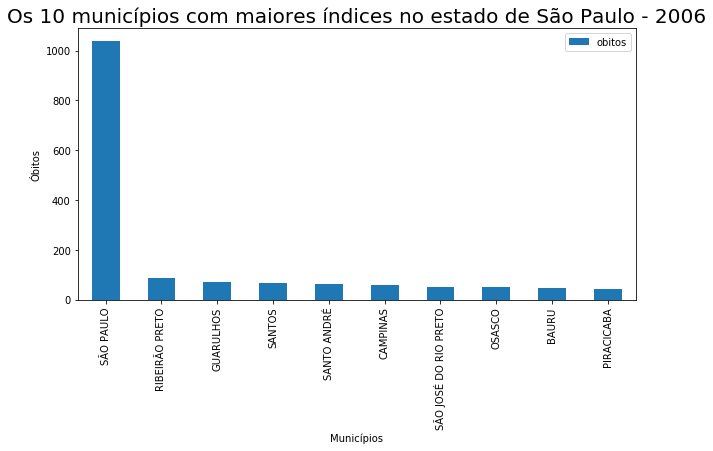

In [35]:
merged2006.sort_values(by=['obitos'],ascending=False).head(10).plot(figsize=(10,5),x='municipio',kind='bar')
plt.ylabel('Óbitos')
plt.xlabel('Municípios')
plt.title('Os 10 municípios com maiores índices no estado de São Paulo - 2006',fontsize=20)


#### Para gerar o gráfico de barras, foram selecionados os 10 municípios com os maiores índices do ano de 2016

Text(0.5, 1.0, 'Os 10 municípios com maiores índices no estado de São Paulo - 2016')

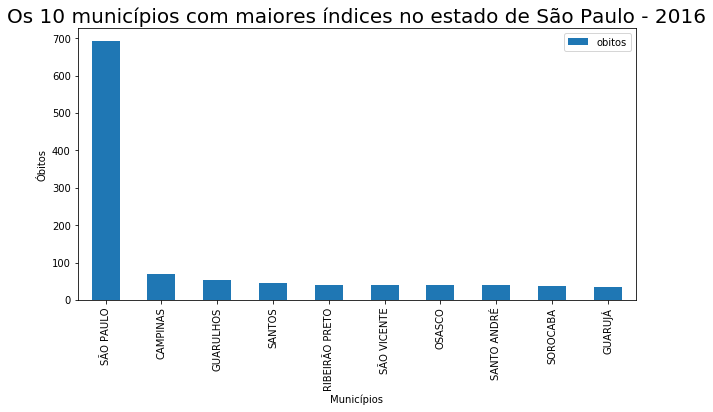

In [36]:
merged2016.sort_values(by=['obitos'],ascending=False).head(10).plot(figsize=(10,5),x='municipio',kind='bar')
plt.ylabel('Óbitos')
plt.xlabel('Municípios')
plt.title('Os 10 municípios com maiores índices no estado de São Paulo - 2016',fontsize=20)


### Para gerar o mapa, foi necessário transformar o Dataframe em Geodataframe.
### Foram selecionados os 20 municípios com os maiores índices.
### O método para fazer a divisão da classificação, foi o Fisher Jenks
### Ano 2006

Text(0.5, 1.0, 'Mortes decorrentes de complicações da Aids - 2006')

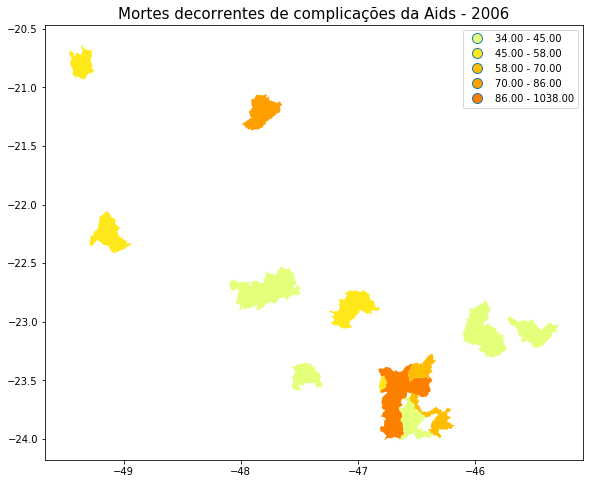

In [37]:
mergedgdf2006 = GeoDataFrame(merged2006, crs=4674, geometry='geometry')

maioresgdf2006 = mergedgdf2006.sort_values(by=['obitos'],ascending=False).head(15)
maioresgdf2006.plot(column = 'obitos', figsize=(18,8),cmap='Wistia', scheme='fisher_jenks', legend=True)
plt.title('Mortes decorrentes de complicações da Aids - 2006',fontsize=15)

### Para gerar o mapa, foi necessário transformar o Dataframe em Geodataframe.
### Foram selecionados os 20 municípios com os maiores índices.
### O método para fazer a divisão da classificação, foi o Fisher Jenks
### Ano 2016

Text(0.5, 1.0, 'Mortes decorrentes de complicações da Aids - 2016')

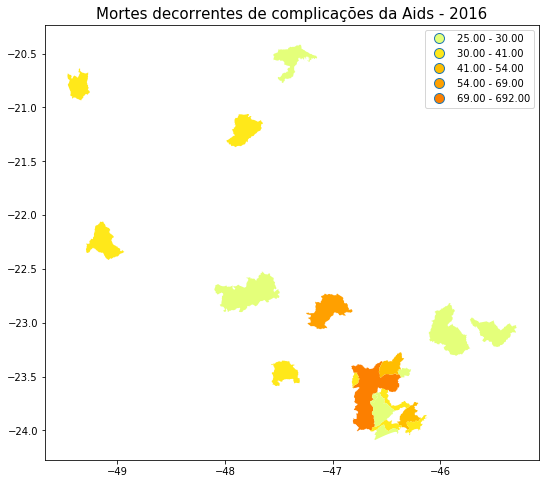

In [38]:
mergedgdf2016 = GeoDataFrame(merged2016, crs=4674, geometry='geometry')

maioresgdf2016 = mergedgdf2016.sort_values(by=['obitos'],ascending=False).head(20)
maioresgdf2016.plot(column = 'obitos', figsize=(18,8),cmap='Wistia', scheme='fisher_jenks', legend=True)
plt.title('Mortes decorrentes de complicações da Aids - 2016',fontsize=15)

### Criação do mapa com todos os municípios que possuem mortes. Ano 2006

Text(0.5, 1.0, 'Mortes decorrentes de complicações da Aids - Estado de São Paulo - 2006')

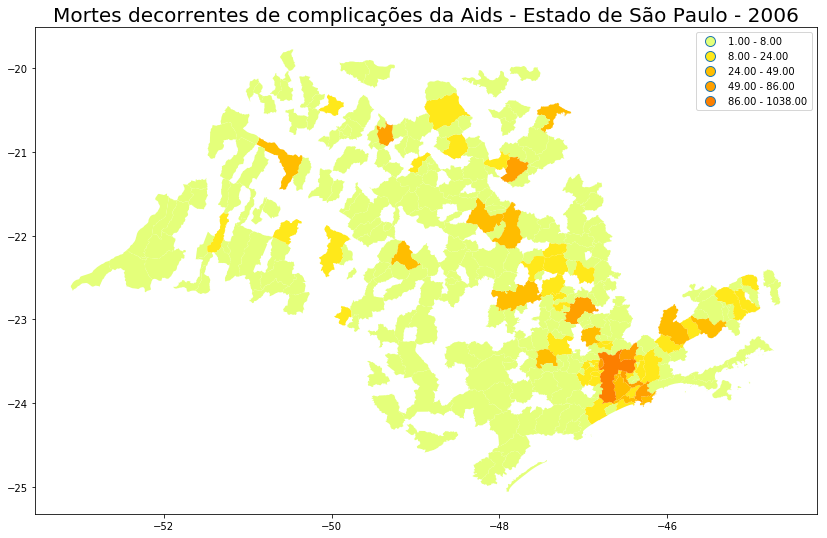

In [39]:
mergedgdf2006.plot(column = 'obitos', figsize=(14,11),cmap='Wistia', scheme='fisher_jenks', legend=True)
plt.title('Mortes decorrentes de complicações da Aids - Estado de São Paulo - 2006',fontsize=20)

### Criação do mapa com todos os municípios que possuem mortes. Ano 2016 

Text(0.5, 1.0, 'Mortes decorrentes de complicações da Aids - Estado de São Paulo - 2016')

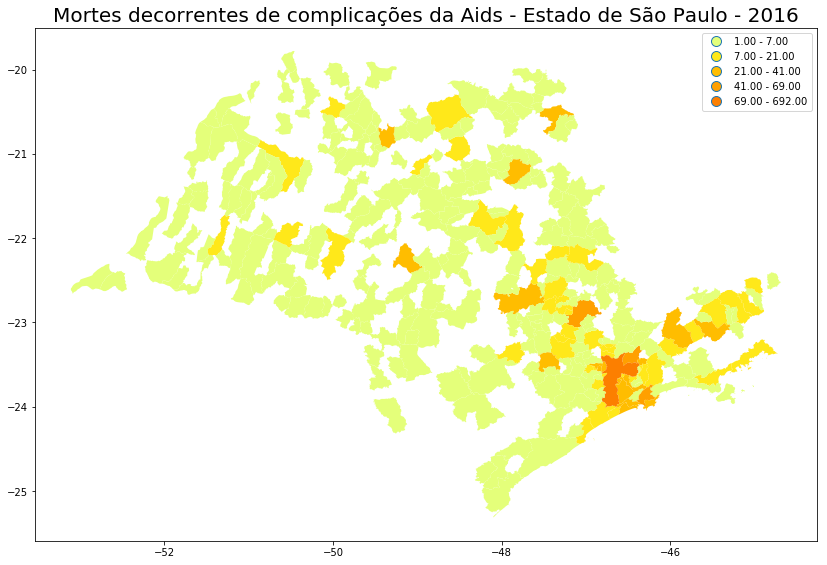

In [40]:
mergedgdf2016.plot(column = 'obitos', figsize=(14,11),cmap='Wistia', scheme='fisher_jenks', legend=True)
plt.title('Mortes dedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAzsAAAI1CAYAAADxUuTrAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvDW2N/gAAIABJREFUeJzsnXl4VdW5uN8vM4EEEgYFgqAEMIIYEcSpFlSKooIICmqvWNGqtddWvbfaX69cubeDtpXrPFMBWwVFGWoFUQZbkUHQOAJGJEgCCGRgyHyS9ftj7RNOTvY5OVMShu99njxw1vjttddea31r+JYYY1AURVEURVEURTnWiGtrARRFURRFURRFUVoCVXYURVEURVEURTkmUWVHURRFURRFUZRjElV2FEVRFEVRFEU5JlFlR1EURVEURVGUYxJVdhRFURRFURRFOSZRZUdpFhEpEJGCtpZDaX1EZJaIGBHp09ayHI2IyCoRMX5uI5wyfbCNxGoWEYkTkXkiUi4iH4rIxSJyuSN3elvL1xxu5X4kEG5bKiJ9nDKf1XJSHZ+0ZR0RkZuc93pTW+QfCBHpKSIficghEXlNRAaIyMMi8nFby9baHA3ttBI6x7Sy41RUIyL1ItI3SLiVPmFvamGZtPM6jlHFUTlKuAi4BpgJGOA94C3gb8aYA20p2JGIiHzttOsftrUsLYlP/9XcX58I0tbBZQwRkXgRuVVE3heREhGpFZE9IvKZiLwoImNdot0B9AJeBM4CNgP/CTzbwrKOcKlDNSJSKCKvi8i5LZn/0YSI5IrIgyKyWkR2OeVUJCKvisiQIPHiReSXzvuvdOrE2yJyXoDwZ4vIH0RkiYjsdt5JYYgy/kBE3nDkq3b+XSYiYyJ97mhJaKuMWxEP9jmnAv/P31NE+gE/9AmnKIrSkqwHcoB9bS1IED4GzjTGfAogIllAKpDfplIdgYjISKAfVik8V0QGGWO+CBD84taTrEXZDzwaxL+stQRRmiIi8djJiUux7+IfQCGQCfQFrgdOBRb7RX0B+Isx5lsRuRvoDxw0xuxsJdG3A7Oc/7cHzgEmAleLyERjzIJWkuNI5llgOLAReBM4BOQCk4GJInKtfzmJiABzsWW5BXgSWxcmAf8UkQnGmEV++VwP/AKoBTYBJ4QinIj8F/C/2P7tLWAX0AU4ExgBvB3e48aG42Fw/z22sH8iItOMMR4//1sAwb6Uq1pbOEVRji+MMRXYGdMjFmNMCVDi8zukGb3jlJ86//4RuM/5fZdbQGPM1tYSqoUpM8Y82NZCKAG5DqvofAr80Biz39dTRFKxA+ZGGGO2+/zfYAfGrUmBf70SkenANOARQJUd+BvwY2PMN76OInID8FfgBRH5hzGmxsd7MlbR+RC42BhT5cR5FvjAibPCGHPQJ84sYDbwpTGmJpQtnyJyDVbReQ+42i89RCQxvEeNHcf0NjYfXgBOBK7wdXQKfgq2AnwZKLKI9BOROc5SYY2I7HR+93MJ+6Cz3DdCRK4XkXXO/tcCZ3l+mxN0it+S7U1+6Yx2lhj3OcuAW0XkTyLSySXPwc4SZoETdq+IfCwij4ZaucTycxH5UkSqnGd9UkQ6NhPvOrHbAEudeJtE5L9EJDlA+FNF5C8+su4RkX+JyB0uYS8WkaXOcmuV2K0iD7nJJM7+axFJEpFpIrLFSX+W49+wR1pELnXC7/f/gB35ZonIDif+9yLyiogMcMmz4TyLiNwmIp87cn4vIs/7yunUBwP0Bnr7vftZUchwgoj82XnechEpc/4/S0ROCfTeXNK5xHkP5U55LxSRU5uJM1xE5otd4q5x5H1ORHqEmq9PWpNEZLnPuy5w6vRQv3DJInK/2KX4ChE54Mh9rUuaDVtGRaSvI2uxiBwUu6Q+yAnX1Xlfu5y8PxI7W++fnu+3PUVEPhG7HWCPU6dPDPFZA27XEZFMEfmdiHzhPN9+EfnUqfftfcKdJSKPOX7eMssXkUdEJKM1y9knTsj1QUROccr8Gzm8peJzEXlWRDqHUo5OOpNFZKPPe3g5UP0T2zb8XGy7ut35tkpE5D0RuSzUPP3S7AyMx654/Rd2cu3HIpISILzrNlYRSRORGWK37VSJyGYRuYcAfbTE6LtvDUKRVWwbuNKJ8t/SuH0c4YTpKCL/KSIrnHKqEdvXLRaRc4LkH3IdccLHicjtcvjsSrnz/ztEJKwxk4hki92GVSqHz79d3kycLLF977dOHS12nnFYGFl7tybN8ld0wE64GGNW+rqJSLqI/IdL+f5dAmx1cuKF3E9HyFPOvyeLSFcnz7DqgjRzfEDCPL8lYYwJY40x5gl/Rcdx/xu2HeoMnO7n7R1f/ZdX0XHifATMA7pilSHf9PKMMZ/4KU0Bcb6Nh4EK4Hp/RcdJszaUtFqC42FlB+BVYAZ2FWehj/tY7NLc/UC2W0SngXkPSMMu+X6FXf69ARgnIhcbYza4RL0XGAX8HduIdwRWAZ2wS4Of+smS55PnNGA6dmb1LWAPMBj4D2CMiJzr3TcvIoOBddgtFIuxylS68zw/w3bAoVSwR7GzkbuA550447CzP0lAkwovIjOBm7HL429il8vPwWr2F4vIKN+VNKeRfx1IBpZi30sn4AzgV8AzPmFvc36XO3H2YJdA7wOuFJHzjTFuWyXeAIYBS7Dlu8fPfyJ2xmsJdjm4j0+elzrPkYh9b98AWcDVwOUiMtIY43ZQ84/AaCfOMmAkcCv2HVzkhCnAvtNfOr99t4D4vvuQZRA7O7cauy3hXSe8YBWqccB84FsXeRshIhOxDV6N8+8u4AJgDfBZgDg/wU4iVGPr3Q7sVp5bsO/nHGPMdyHkLcBL2EmHfc6z73WeeSR2ZnGDEzYJeAe77XQzthNMxb7TeSKSa4xpslUV+47XYZfiZzm/xwOrxO4FXwoccJ49EzsLtkRE+gd4hruBHznhlzpl9RNghIgMN8bsbe65A5TFydi2ojd2i8Iz2MFufyfPZ7HfA9j6NR54H9s+xQNDgHuAyxw5Dvqk3aLlHE59EJHuwEfYdupt7DebApwM/Bt2i0VxCOV1N7ZdLwPmOP+Oxk5eNRngYd/tY47/u87zdweuBN4WkVuNMS82l68fU7Dt2SxjjEdE/oZ9B9cAL4eSgNiJoeXYdutT7MxtJ+AB7DvwDx+T7741CENWb184BVunV/kkU+D8mwP8DvgndltWKXASth+/TESuNMYs9cs/3DoC9r1dj63DL2L71vHA09hv/YYQn70ftg3tjO1v8rB9wkLnt1ucIdg+JBP7Db6J3QJ0FfCBiIw3xoSyDcj7/fQPRVafsH/Alr9/+V4qIuP8846inw4H8fm/VyEJuy7EiijGhK2Bd6znO+5Kxiq/FcC/XOIswba7F2H7iEg5D9uGzwdKnfHeIKAKWG+MWRNF2tFjjDlm/7AfRqHz/xexFSDLx38ptsFLBX7rhL/Jx1+wAyQD3OCX9iTHfTMQ5+P+oONejt3z7i9TH8d/VgCZRzr+HwKd/Pxucvz+z8ftEcdtnEtaGb6yBSmn85w0vgEyfdxTsI21wS4vu8nyJtDOz89bBr/wcevilHUNdlndXwbf99IbO2g6AJzqF+5pJ+3n/dxXOe6fAV1c0vfKWw9cGqCsSrEDwdP8/AZi98V+7Oc+y0nzO+AkH/cEbCNsgLP94hT4l2WkMmAHaY3qg49fEpAWwrvvgO0Ya4Ghfn7/56RvgD4+7v2d9/gN0NMvzkVAHbAgxG/0p07664GOfn7xQHef3792wr4NJPi4d3PK1QDnuXxrBviNX9oPOO4lWCXC9xv+N7dy9anXNfh92z5lNdOtXvq5jXDCPujnvtpx/7VLOXUBUvy+kXiXcFOdNO5rxXIOqz4A/45f++Dj1x6/9iRAvemDbSNK/OpmHFZ5Mi7lnoxPO+Pj3hH4wkmr2bz94n7lPF+W83uQk/e/AoQvoGlb+v+cOG/41cOTHZka9RfE4LuP9I/D31SZ8z24/d0eiayBvgu/9+TWtmcBO4FNMagj1znuHwMd/OrlBsfv+hDLaplbPccqed526SYf9wTsN1SFXx8J9ACKsBNRySHkfSb2m6zHKm9XA72biZPeTPlu9nMPu58Okrf33a9y8fsfx29rlHWh0Xfk57/KpS40qY9EMCZsrT/sxLTBTj7H+7gPdNw/DxBvqOO/rpn0Dc54OoD/3U6YJ7HjMOP39z7QtbXLpUG+tsq4lV5+w8vxqQjTnN+9sZ3U085vN2XnfMftwwDp/8vxv9DH7UECNO6Of3Mf3QLHf2AA/0+APT6/vcrOj6IopxecNH7i4uf94Atc5KjFTyFz/OKxA/b1Pm73Ouk8FoI8v3HC/t7FLwPbuFbi0+hzWNlpovQ5/jc5/q6DcOxqmwHuDODvHcye5uM2y3G7xSX8Txy/n/u5F/iXZaQycHgg0aScwnj3NzhpzHbx64gd1BgaDxa8clwepA57CE3Z+txJq8nEgEvYfGznfaqLn3eQ/xcfN++3tg0/xQA7C2iwkxJpfn7xTt1e6ef+IC4KjV9ZudbLAN/Ugz5uZzlunxBFR4ntjPcDK1qxnMOqDxxWdn4axXN624jpLn6nYNt2E0Z69+DXlocQ50Inzjt+7hsd9xyXOAU0bUvzHXn7uoT31rlZPm5Rf/dRlLv3mwr2lxeJrG7fRRhyPe7E9Z10CruOYFefXPtTrHEJ4/9tBZAnywn7Le6TEqtoOt7wKkF/CpCmt38YE2KZXItVjnzfTbHzPV4Zw/INuZ8O4d0XcFhp/hOHJw3rgPFRyOqtt7MCxFnlUhea1EciGBO2xp9T3l87eV/r5+edzP4gQFyvcZUtzeRhCK7s/MEJ48G2aRdjJ1MHYhcWDC7KbGv9HS/b2DDGrBORz4GbReS32O0VcdiBfiC8ZvxWBPBfgV3WPhP7UfqyPkJRz8UOtK4Re9jLnySgq4h0NsYUY7fS/AJYKCLzscurq014B2G9z/m+i9+/8FkShYatCWdgFZpf2h0yTajGLjV78e6jdV2+DyBPk3I3xpSKyCfYgcap2G0fvjRX7oH8vaYtzxB306fe7QA52NlcX9yWrHc4/wY8PxEDGd7Hzvbd72x/eBu7OpBnjKkLMc+A794Ys19E8mi6lcYr5w8D7CPvhlUY+mMHfq6IPYMyCPjeGPNJMCFFJA27BaTIGON2uN9bV8508XMrD691oa+N395iY0ydiHyPHbC40VxZ5eCzNTFEvN/HO8aY+uYCiz2Ldxt2y91pWGXL9zxBT5+wLV3O4daHxcDvgadEZDR2u85q4Cvj9JohEKzefisiO7ATWo0QkYFYU7oXYrew+Z+t6ekfJwi3Ov++5Oc+y5HvVqwSFRCf8t4RoM1eBfy3n1vU373YM6J9/PMyxqwKJT6w3RjjH9+NWLRRDYjI+dj+7lxsvUryC9ITu9IOkdWRIVhFf1WAZ6nDvY3xxxvmgwDPuYrA7WrvAO2/9zxIDiFYtDLGvCYiC7C7RbzjlAuwW+KuEpE5WGWr4ZuLsHwj6acD0ZvD9d2D3Wr6JvCIMaaRWfcwZY0V0YwJGxHgHc8yxhSEI5DTvi/G1o8/GmNeCyc+h7cJhtr2BiLeJ72JxrHkCXwpIuOxytgPnWMYrb6l7bhRdhxewGr9l2Jn3jc20/l7D9jtCuDvdW9iNADYHZGEdn9vAk07OH86AMXGmPUi8gPsLMtE7BYcRGQLdkbr1RDy9D7n9/4ezsDPf/98BrZCdw1BTi/eMioKQ56WKPdA/t5D0bcG8PfSwcXNbU+yV0GMd/ELRFgyGGMOOIcxp2P3Ko92/PeJyNPAb03zBwIDvnsHt/LyyvmfocgZhNaqE24HdD2Okh5o374He27KjebKKpKDueGUBdhJjvHYmeNFTt7Vjt8vsVu2Ikk7knIOqz4YY7aLyNnY2dtLsVtsAHaIyJ+NMY+HIWewd9FoIOt8Kyuw7ety7ADhAHZwm4udWXc1rOKPWCMQE7Hf/kI/71eAPwM3isivjTHV/vHDfI5GxOi7vwmX80C4D/IjJkayAuAMmOZjt3m9C2zFrszWY2fhf0jj9xd2HXHilBiXQ9lOm7EPO7BujmjaVbdJTl+aa1cbcMp2mfOHWJPUE4C/ADdiV3kWOn6Rlm8kbXIg3jfGjGguUASyxopYPrPb2GkVh8+oNYuj6PwDq2DNMMbc5xLM28cF6pfS/cJFSqnz77c+ig4AxphKEXkHuzPgbOzxiFbleFN2XsZai3gOq/X/TzPhvS8/kJWl7n7hfIlUS96P3caSGWoER0u+wjmIdhZ2APHvwCsistcY814IeYI11tDoYKvTOHam8UDJG/4TY0zAS6z88CoEPbFbakKR50TcreQFLPcQZoYD+XvTOsMY43oovxUIWwZjTQJPdQ6gn4Y9I3En1lRnHPZsSih5BrKh71b3GxpPE90Fk751ojmi+RZjTXNlFYkMIZeFWMtp47GruGN8B4uORZxfRZo2kZVz2PXBGLMJmCQiCdhV4kuwbdZjIlJujJkZopwn4N5GuMn/X0A7YKT/CoaI/Bqr7ITKjdhVoRSgMsDqdmfswPKVIOlE8v1F/d2HMqCMFTFoo7z8L/YcylCn/jQgIs/RVHmLpI7sBzJFJNFfCXPqahesgtwc0bSr44wx/vffxARnlek1ETkd+z1cxGFlPdLyDbufjgHhyupdLQ805g1VIYtZP2SMcW00QsVZFf4H8APsio6bogP2HFgdcIqIJJim1694Vwy/jkYeDpspD2SQwqsMtYsyn4g4XkxPA2CsVZD52O0p5VhrYMHwrvqMCODvdXez0BUI75J2oBn/tUCGs90iLIwx1caYD40x0zh8z0MoHbhXfreZvh/g10AYYw5hG7eBIhKqUrbW+TcUE68By12s6e1c7IzOJn//KPDK94MYpulGHcHffUQyGMuXxpgnsFYAIbR7owK+e7GmQ3NjKacvxphy7MHwE0Qk6NYQZ6vZVqCnuJv39JqKDudbjJRgZRVpvfSW6Whp3ryt13LkYpdZ8bPx60xaoZyjqbceY8xGY8zD2MPhEH29PQV7C7w/2dhZ+1Uufm5tXzC8q6+vAjNd/ub7hXPFKe9vsOXd1yXIiGbiR/rdtzohyNpc35iN3eroP7iNw85s+xNJHfkEOy660MXvQke2UNoYbx92gTNh6M8IF7fW6oMAvFt3fQfc4ZZvW/TTXsKV1TvQbvLORSSd0K3WtcSYMGyc/mYZtq78Loiig7Oy/CHWEJdb3fKOyQJtzQuVf2J3RPQTa9HTn0HOvwVR5hMZzR3qOZr/cDlQhT2YfBVwvp97IGtsmx33iX7hJzruW3C3xjYigEwdsLMM7wfw9x6C/BDo4eLfHjjH5/cP8LOu5Lj/h5POwyGUk/fQXTjW2G523BfibqQgAxji89vXGluTw3s0tsbWxwlXBmT7hXvCyfcFP/dVBDmQzGEDBTcF8O+MbRD34GdBzfGP83+nHDZQ0Mcl/AhcDttizwxV4WL1KVwZsI2HW94hWVfxqY8lhGeN7VTn/XwN9HdJMwn4QXN5O2FvddJ3sxIWR2MrYV6rVQtpbG2mC9YIgQEu8KtHwQ6lBjwwiftB8gedOMGssf3Fz71JvQxSN4JZY+uMY40Ne77HAG/4henG4cPx/rK3ZDmHVR+wCtkJLuG8beq8EOpNHyfPcCxteQ/JDvZz9xpdCNg++IX3Hvj9KkiYOA5bruvv4+5Wr7zlPZ/QrLFF/d1H+sfhb6ogxPAhy4pd9TG4GEtx/DdjV1V6+LgJdouc9/2NiLKOXO/znaT6uKc6bgY/K1xBnj1ca2yJ2D64ggBGCLDnU1JDyPs6rELZxNgJdlUi38n/mhiUb8j9dBB5RxDGAfZwZXX8N2EH475GhuI5bF7cvy54ZXrQL4+wxoQt8A1mYE33GxyDWyHWB4PtY3yteg7Dbn/eA6Q3k4YhiIECJ8xfnXC/9XMfhR33luEyXmyNv+NtGxvG3vUQ0qE1Y4wRkSnYPaHzRGQRtqIPwCpMB4EbTQgHin3SPCQi64AfOHcyfI2d0VpsjPnMGLNcRO7HWrbIF5G3sQOMDtj9xT/E3nh7qZPkvcCPRGQVdgvaIaz1i8uwA+fnQ5BptYg8gd1G8oVj6MB7z04pLvtTjTF/EZGzsHf5bHX2Y36HvR/gZOws2EvA7U74fSJyPbZDXykiS7DmCdOxdwj1cuJhjCkQkV9i7/f4WERewx5U/CG2sd+MteMfM4wxxWLvm1kArBWR5djVq3qsgnwuzoAzyqy892ksFZF/YhuaT40xf49AhkuAGSLyIbZM9mBXLcc5cf4UwnMfEpGfYs+A/EtEfO/ZGYSdrbnQL85mEbkZu+/7SxFZiq3HiY6cP8C+r6CXkjq86OR1I7a+L3Li9sBusfgLVskAew7iMuf5PnW+jVTsHvdu2KX8D0LIM1qWAKudeuktqwuwA9n7o0j3x1jl6PciMsH5v2C3GfwIW54F2I5uNXC18+4/wG6XuQzb0e6kKS1WzhHUh+uBO0XkfezgrhR7D8uV2O/B9w4qV5w24n6sNcpPnHq7H3smpBO2bRnsF+1Rx/8D593txw66L8C2SxMJjZ86/wa8k8cYUy8iL2HL9FaCn2d6BNufTMC2d+9g99dPwn5/Y/3CR/3dx4BOAQ5Ye5ll7EHrcGTdgt0uPVlEarD9iQFeNsZsx04oPIt9329g+6jzsUrS37H1p4FI6ogx5hURGYe1ZPaliCx0ZLgK2z+9ZuzljaFwJ3ay8FER+RH2kH42dguqm7y1InI11mDHP5wyy8MqP72w/cYp2K1SFc3kPRx7eH+3iHzA4cvMTwYux67+LuLwCiREVr6t2k9HKqvDn7CrrqtF5HXspONIbDv1KXY7bVBaYkwYAW9i262tQFyA73ChMcbXSM5c7NnIidgy+zt2LDEJq/Ddavy2IIu9VNy/P8uQxhez/ocxZp/P73uwde83InIhdoKgN7bO1zn5RHvvUmS0hYbVWn+EoIn6hG2ysuPjNwB73mcX9qPahdVgB7iEfZAgKztOmGzsB1mMbfCb5IvtgF/DDlxqsI1IHvaCtKE+4X6EVSq+wjbk5dhO43Gasavvl58AP8fOflQ7+T6F7XQLCGwu+QoOX3xagz14ud4pTzfTtQOxl7sVOeG/x1q5aWKG1nm2ZdjBUDV2YPRH3FeSVhHFyo5PuD5YO/H52MbwALYxexm4yi/sLMJf2WmPvYStEDvL1GjWNhwZsFZ5ZmCtwe11yqgA24GdF+w5XeQdhR00VzjlvQg7OA32jKc7/ts5fJ/FF9gzcReFmf8NTj3Y7zzzNuzlikP8wqVgZ8K/wJo1PejIfV2Ad9mkfP3ah1UB/AoIvLIzwqlPeY4Me7HfYHeXdJrUy0B1w/HrjD1XuMUphzInn9/ReKY5E3uXRYETbivWwlmqm+wu5VzryPBdtOUcbn3AdobPYAcYJU763zhlOCjMenMddstIlfMe/opV4JqUuxP+Cux2oYNO2S7DKvM3EVr70BHbxlbjcs+HX9he2A5+D5AUqF457unYb7nIeZbN2ImsU2i6shOz7z7cP0IzPd3Q/4UrK3ZAvxzbDtTj15dy+Lsrx1oDXeDUuwf9w0ZRR+Kwk3gbsO1hBXbF9E7CnLHH9vXznbpWjlV+Lg9W37ATCg9hv50K7ARmvpPOj/G5+6qZunenUz5bsH1IDXbs8raTjtuqTyTlG3I/HUTeEYSxshOFrFOxE4jV2LHKc9g2t0ldIHg7HfKYsAW+wQKa//7c6lUC9i6cz7FtbqlTF1zbDJ/nD/bXxyVeJvab3+bUuWLseOKcWJZDuH/iCKcoiqIEwZlB+29cDrgfjTirwUuMPS+jKIqiKMckx5WBAkVRFKWBBditLoqiKIpyzHLcndlRFEU5XnEsQ83BbjWbROC7hBRFURTlmECVHUVRlOMHgzUJOxF7luSXbSuOoiiKorQsemZHURRFURRFUZRjEj2zoyiKoiiKoijKMckRtY2tS5cupk+fPm0thqIoiqIoiqIoRzAbN27cZ4zp2ly4I0rZ6dOnDxs2bGhrMRRFURRFURRFOYIRke2hhNNtbIqiKIqiKIqiHJOosqMoiqIoiqIoyjGJKjuKoiiKoiiKohyTHFFndhRFURRFURSlpaitraWwsJCqqqq2FkUJkZSUFLKyskhMjOwebFV2FEVRFEVRlOOCwsJC0tLS6NOnDyLS1uIozWCMobi4mMLCQk4++eSI0tBtbIqiKIqiKMpxQVVVFZ07d1ZF5yhBROjcuXNUK3G6sqMoiqIoiqIcN4Sq6GwvLmfWh1tZ/GkRpeX1ZLSPY+wZPbnpvL707ty+haVUvESrmOrKjqIoiqIoiqL4sHLLHq56ehV1iet5+o6PWPnbD3n6jo+oS1zPVU+vYuWWPRGnffPNN9OtWzcGDRoUMIwxhrvuuovs7GwGDx7Mxx9/3OA3e/Zs+vXrR79+/Zg9e3ZYeW/ZsoXc3NyGv/T0dB599NFWy78t0JUdRVEURVEURXHYXlzOPa99xEM3fsag3oca3LM6V3Pbpds4P2cv98yBhT8bEdEKz0033cTPf/5zbrzxxoBhlixZQn5+Pvn5+axbt4477riDdevWUVJSwvTp09mwYQMiwllnncXYsWPJyMgIKe8BAwaQl5cHQF1dHT179mT8+PGtln9boCs7iqIoiqIoiuIw68OtXDlsVyNFx5dBvQ9xxbBdzF6zNaL0L7zwQjIzM4OGWbRoETfeeCMiwjnnnENZWRm7du3inXfeYdSoUWRmZpKRkcGoUaNYunRpRHIsX76cvn370rt37zbJv7VQZUdRFEVRFEVRHBZ/WsTlw3YGDXPFsJ0syitqMRmKioro1atXw++srCyKiooCukfC3Llzue6669os/9ZClR1FURRFURRFcSgtr+fETtVBw5zYqYayivoWk8EY08RNRAK6h0tNTQ2LFy/mmmuuaZP8WxNVdhRFURRFURTFIaN9HLvLkoOG2V2WRKfUlhtGZ2VlsWPHjobfhYWF9OjRI6C7L+vWrWswQLB48WLX9JcsWcKQIUM44YQTYp7/kYYqO4qiKIqiKIriMPaMnvzjo+AD+Lc+6sG43J4tJ8PYscyZMwdjDGvXrqVjx450796d0aNHs2xnrn0xAAAgAElEQVTZMkpLSyktLWXZsmWMHj26Udzhw4eTl5dHXl4eY8eOdU3/1VdfDbiFLdr8jzTUGpuiKIqiKIqiONx0Xl+uenoH5+fsdTVS8MX2Drz1UXcW/qxvROlfd911rFq1in379pGVlcX06dOZOnUqzz77LAC33347Y8aM4e233yY7O5vU1FReeuklADIzM3nggQcYNmwYANOmTWvW2IE/FRUVvPvuuzz33HON3Fsr/9ZG3PbetRVDhw41GzZsaGsxFEVRFEVRlGOQTZs2kZOT02y4lVv2cM9rH3HFsF1cMWwnJ3aqYXdZEm991IO3PurOjGuHMXJAt1aQWAH39yYiG40xQ5uLqys7iqIoiqIoiuLDyAHdWPizEcxes5WfPVNEWUU9nVLjGJfbk4U/6xvR/TpK26DKjqIoiqIoiqL40btze6ZdMZhpVwxua1GUKFADBYqiKIqiKIqiHJOosqMoiqIoiqIoyjGJKjuKohxRGDxtLYKiKIqiKMcIemZHUZQjglr2UsYCathBRy6jA+e1tUiKoijKccz24nJmf/g1i/MKKakQMlMNY3OzmHJefzVQcBShKzuKorQZ1WyllPkUM4e9PEsN24E4Uslta9EURVGU45iVW/Yw/qnlpNTO5o1rH+Dru+7gjWsfIKV2NuOfWs7KLXsiSnfLli3k5uY2/KWnp/Poo482CWeM4a677iI7O5vBgwfz8ccfN/jNnj2bfv360a9fP2bPnh1W/jt27GDkyJHk5OQwcOBAHnvssQa/119/nYEDBxIXF0ewq2CWLl3KgAEDyM7O5qGHHmpw37ZtG8OHD6dfv35MmjSJmpqasGRrKVTZURSl1ajjENUUUMnn7GMW+/gLFXxCFVswVAGQQj+Edm0sqaIoinK8sr24nHvnreWFK//Er85/nd6d9pIQV0/vTnv51fmv88KVf+LeeWvZXlwedtoDBgwgLy+PvLw8Nm7cSGpqKuPHj28SbsmSJeTn55Ofn8/zzz/PHXfcAUBJSQnTp09n3bp1rF+/nunTp1NaWhpy/gkJCTzyyCNs2rSJtWvX8tRTT/HVV18BMGjQIN58800uvPDCgPHr6uq48847WbJkCV999RWvvvpqQ/z77ruPu+++m/z8fDIyMpg5c2Y4RdNiqLKjKEqr4KGMPTzOPl6ghLlUk98kTDwdyWQygrSBhIqiKIoCsz/8msmDVnBWj29d/c/q8S2TBq5kzodN+7FwWL58OX379qV3795N/BYtWsSNN96IiHDOOedQVlbGrl27eOeddxg1ahSZmZlkZGQwatQoli5dGnKe3bt3Z8iQIQCkpaWRk5NDUVERADk5OQwYMCBo/PXr15Odnc0pp5xCUlISkydPZtGiRRhjWLFiBRMnTgRgypQpLFy4MGS5WhJVdhRFaXEMhjLeoJ7gs2BJ9Eb0KKGiKIrShizOK2TSwFVBw0wetJJFeTuiymfu3Llcd911rn5FRUX06tWr4XdWVhZFRUUB3SOhoKCATz75hOHDh4ccJ1D+xcXFdOrUiYSEhKjlijWq7CiK0uIcYjXVuM+Q+VJPJYb6VpBIURRFUdwpqRB6phcHDdMjrYTSish3IdTU1LB48WKuueYaV39jTBM3EQnoHi6HDh1iwoQJPProo6Snp4ccr6XlaglU2VEUpUWpZjsHWR5SWGugQJUdRVEUpe3ITDUUHegcNMzOg5lkpDYd4IfKkiVLGDJkCCeccIKrf1ZWFjt2HF45KiwspEePHgHdfVm3bl2DAYTFixc3Sbu2tpYJEyZwww03cPXVV4cld6D8u3TpQllZGR6PJ6BcbYUqO4qitCjlrMUQmkUWQw0Heb+FJVIURVGUwIzNzWLelyOChpn7xUjG5fYKGiYYr776asAtbABjx45lzpw5GGNYu3YtHTt2pHv37owePZply5ZRWlpKaWkpy5YtY/To0Y3iDh8+vMEIwtixYxv5GWOYOnUqOTk53HPPPWHLPWzYMPLz89m2bRs1NTXMnTuXsWPHIiKMHDmS+fPnA9Zi3Lhx48JOvyVQZUdRlBYlkR4QhsGBg6yghp0tJ5CiKIqiBGHKef2Z+8VFbNx5iqv/xp2nMO/Lkdx4Xr+I0q+oqODdd99tsqry7LPP8uyzzwIwZswYTjnlFLKzs7n11lt5+umnAcjMzOSBBx5g2LBhDBs2jGnTppGZmRly3qtXr+bll19mxYoVDas/b7/9NgALFiwgKyuLNWvWcPnllzcoUTt37mTMmDGAteb25JNPMnr0aHJycrj22msZOHAgAA8//DAzZswgOzub4uJipk6dGlH5xBpx22PXVgwdOtQEs+utKMrRSRmLKWddyOG7cAvJnNyCEimKoijHI5s2bSInJ6fZcCu37OHeeWuZNHAlkwetpEdaCTsPZjL3i5HM+3Ikj0w6h5EDurWCxAq4vzcR2WiMGdpcXDV7pChKi5POj6jiG+oIfuDTSyVfqrITAnUcIo4UPBRTy/ck0YN4OqvpbkVRlCgZOaAbC+68mDkfnsSE1y6itELISDWMy+3Fgjv70btz+7YWUQkRVXYURWlx4kihHQM5xD9DCm8NFRwZVPAZSfQggS4NbgYPtexBiCeBrkgr7giuo4KDvEcV+dRRgt2NbJw/iCeDVHJJ46JWlUtRFOVYo3fn9jxwZS4PXJnb1qIoUaDKjqIorUI6F1PFFjx832zYWnZxkJWkMbIVJAvOAZZSx34S6Uk8HfFQjId9QB0AcaTSjtNJ4VSSyW5xBSOOZKrZ5ig64G+9ro5SDrKSRHrSjua3aiiKoijKsYxO+ymK0ioICXTg3BBDGyr4tEXlCQUP+6hjPwC1FFHFV46yVtcQpp4KyllHMbPZzUPUU9WiMgnxdObfEBKDhqtmW4vKoSiKoihHA6rsKIrSaqQwgAS6hhQ2kZ4Y2taASjkfhRW+nnIq+bKFpDlMApkkNXOmqZI8atnV4rIoiqIoypFMVNvYRORPwJVADbAV+Ikxpszx+zUwFTsFepcx5p0oZVUU5SgnnnQ6MY59vNhs2EryaMeptOP0VpDMnSTCv0OhgjzacTpxJLWARIdJ4VSq2YrvKpMv9ZSzl+foyBhSGRrW9joPpRzin9Swg3gyEeKIJ4M0LiSOdjF6AkVRlCOb7cXlzF79NYs/2UFJVRyZKfWMPbMXU87vrwYKjiKiXdl5FxhkjBkMfA38GkBETgMmAwOBS4GnRSQ+yrwURTkGSKJXyKs7NRS2sDTBqQ3hfJE/NXzLAZa2gDSNac/ZdOXWoGEMtZSxiH28RDXbMNQ2m24FeXzPo5Sznlp2UcWXVPI5h/gn+1vhuZQjm1r2UsOONl91VZSWZuWWPYx/4j1Sdj/FG2fdxtcXj+ONs24jZfdTjH/iPVZu2RNRujt27GDkyJHk5OQwcOBAHnvssQa/119/nYEDBxIXF0ewq1iWLl3KgAEDyM7O5qGHHmpw37ZtG8OHD6dfv35MmjSJmprQLvT2589//jMiwr59+wDYvHkz5557LsnJyfz5z38OGC9Q/tXV1UyaNIns7GyGDx9OQUFBRHJFSlQrO8aYZT4/1wITnf+PA+YaY6qBbSLyDXA2sCaa/BRFOfoREkhlCBV8jIe9QcK1p479GDxIK9tSqaeKEl6lmoKI4qfQP7YCuSAISfQiiT7UNCNnDd+yj2+dWCnEkYIQj5BMPB2Jox2GWmrZ6RhfCIQOcI816jhADTtJoT81FFLNFqr5zqkfSYCQQn8MHqrYTDVfA5BMfzK5NuSVPkM9YBB03lM58tleXM69r67hhcH3c1anzQ3uvVN386vsmVzcZTW3vvoQC/79krBXeBISEnjkkUcYMmQIBw8e5KyzzmLUqFGcdtppDBo0iDfffJPbbrstYPy6ujruvPNO3n33XbKyshg2bBhjx47ltNNO47777uPuu+9m8uTJ3H777cycOZM77rgjLPl27NjBu+++y0knndTglpmZyeOPP87ChQuDxg2U/8yZM8nIyOCbb75h7ty53HfffcybNy8suaIhlmd2bgaWOP/vCezw8St03BRFOQ7wUBpwFcFQ6xyeN8SRFiCFFOJIppKvoA3ujKllF9V8A3giiu+hNLYCBaED5xF6GRkMldRRiod9DUYXKthIJZ+5KjpCO+c9JZBMZLeFK0cmBkMJr1HCy+zmYfbxHAdZRQ3fUk0+VXxJFV9QxpvsZ3GDogNQzdcUM4d6As8cH+QDdvK/7GYG3/OIq0n5OvbjoaxFnk9RImX26q+Z3OPvjRQdX87qtJlJPd5izur8sNPu3r07Q4YMASAtLY2cnByKiooAyMnJYcCAAUHjr1+/nuzsbE455RSSkpKYPHkyixYtwhjDihUrmDjRrjtMmTKlWeXEjbvvvps//vGPiBzuV7p168awYcNITAxsGCdY/osWLWLKlCkATJw4keXLl2NM602eNavsiMh7IvKFy984nzC/wY4K/uZ1cknK9alE5KciskFENuzdG3iWV1GUowM7gHqF3fypiUUwg4e9vEA1XzcMrOPp1CSNJE6gjhLiSMHftHJLYTB4KKOCTynljajSEpJjJFXztGMgaYxokbST6ceJ/IoTuY/u/IbUNjw/pcSeCj6ixvlG6zkUdvwavqMugGJvqOMAyzBUUUcxdZRRww7qqW6SxpF0r5aiACz+ZAeTevwjaJjJPd5iUd53UeVTUFDAJ598wvDhw0OOU1RURK9eh8+TZmVlUVRURHFxMZ06dSIhIaGRezgsXryYnj17csYZZ4QVDwiav6/MCQkJdOzYkeLi0C4ZjwXN7g0xxlwSzF9EpgBXABebw2paITQ62ZsF7AyQ/vPA8wBDhw7VPRKKcpTjYS+1zudeznqSfayGlfMRtRxufOs5SCInUdcwsysk0bthW1YiPZs1sRwrqvmWYv4Sg5QSaMdAwJquFpKJo12LbsVrz3kcZGULpHt2g6EFaWGDC0rrU07gMwGhcpD3yWB8k+/UmmBvbDyjgs+opoDO3ICQgMHjnN/TK/+UI4uSqjh6pgQ/k9MjZS+llZFvkDp06BATJkzg0UcfJT09PeR4bisiIhLQPVQqKir43e9+x7Jly5oPHIZczfm1BlFtYxORS4H7gLHGmAofr8XAZBFJFpGTgX7A+mjyUhTl6KDKx/RyJV9SykKq2EotezjAu03Cx5NGEr1Jog9CQqPzJ7UUhXSoPhbEkUQy/Yl+25yHGr7DQynFzvaglj/Y3zKrX/F0bJF0lSODRLpFnUYln7KXFxtt3axlLyX8tUlYD7sx1FDF13gowVBPPZUYv9UeRWlrMlPqKaoK/n3srOpKRrvI2t7a2lomTJjADTfcwNVXXx1W3KysLHbsOHxSpLCwkB49etClSxfKysrweDyN3P0ZPXo0ubm53HLLLY3ct27dyrZt2zjjjDPo06cPhYWFDBkyhN27d4ckV7D8fWX2eDzs37+fzMzMsJ47GqKdTnkSSAbedTS0tcaY240xX4rIa8BX2O1tdxpj3O2jKopyTFGN77J+HRV8RAUfkUy/RoOaONLoyq3UsZ99zHRNq55y6ignwWWrW6xJohddmMJB/hW1NbViZjv/s7NZlXxGLTvpyk+jlNIde0g8jlgqPQl0IZGmHaVy7NCJCQiplLM6qnRqKWQvz5LGhRxiDXUcIJBJ9Bq2U04idZQRTyZ1lJFMH5L0WK9yBDH2zF7M23k5v8p275sA5u68gnG5JwX0D4QxhqlTp5KTk8M999wTdvxhw4aRn5/Ptm3b6NmzJ3PnzuWVV15BRBg5ciTz589n8uTJzJ49m3HjxjWJ/8477jfBnH766ezZc3g1q0+fPmzYsIEuXbqEJFew/MeOHcvs2bM599xzmT9/PhdddNHRs7JjjMk2xvQyxuQ6f7f7+P3OGNPXGDPAGLMkWDqKohw71FPu6l5N44Oc6VxMAp2pJfhWgQO0bvPha10qkR7E0zmCVAy+xxRtmbTcLt069hPr1Z1kBiBtYBxCaT3qOeAY4ohFWofYz9vOGZ5gc5uGar6jjjKq2YIQTxpBd8srSqsz5fz+zN15JRvLTnX131h2KvN2XsGN54dvtGX16tW8/PLLrFixgtzcXHJzc3n77bcBWLBgAVlZWaxZs4bLL7+c0aNHA7Bz507GjBkD2DMvTz75JKNHjyYnJ4drr72WgQPt1umHH36YGTNmkJ2dTXFxMVOnTo3k8Zuwe/dusrKymDFjBr/97W/JysriwIEDAIwZM4adO3cGzX/q1KkUFxeTnZ3NjBkzGpnLbg2kNa0hNMfQoUNNMLviiqIc+RxgOQdZETRMe86mE3bGp5Q3qWBjkNBCN35OIifGUMrAGDxU8jlCEikMYD9LKGdtTNJOZShp/JAEolu+995x4lVGqsinmFnRiteIdEaTxoUxTVM5sqjmW8rZSAKd8bCXFAYgxBNHe+qpZj9/dxTp2CK0w1DZ8CuBLqQxknac1mpn9JTjl02bNpGTk9NsuJVb9nDvq2uY1OMtJvd4ix4pe9lZ1ZW5O69g3s4reOS6cxk5IPqtoEpouL03EdlojBnaXFw9FagoSkzxt7bkhq/1sBT6U8HHBF75sOZxu3Fn0Ds6DCYmKxH2HqAzG36ncwke9lDNt1GnXcEGUjkjamUH6ihjEakMpY4SDrA8atn8iWtFi3JK25DMKSRzShD/k/me/4vIUlswEuhCbcPtFAZDDfFkqKKjHFGMHNCNBf9+CXNW92bCx1dSWhlHRrt6xuWexIIJ/cK+X0dpO1TZURQlpnRkFIZqR4FpurXKXmqZ2vC7HYNIYSBVfBEwTQ/fU823pLjc82IwHGQFBg8dOM+5MDOWg6Y4agntgGZzJNOPJMLf4+2PkEAlXzplrCgtQxwppHImh/hXTNMVvx30CZwA1FHHAeIJ3SqVorQ0vTu354GxuTwwNretRVGiQJUdRVFiipBIBuNJJZdDrGlknQ3AUMV+3qETVzS4pTMyqLIDsJ+3qedCDrASIZ4kTqKOgxgqqXGMIhzin8TTmRT6k8IAV+UoXDzsiZlFuEROiIkJaoMHE+GFp6FiTQcrxzvp/AhDNeUxMqiaSHfqG7awWarJJ4keJNITQ30TZUhRFCUatEVRFKVFSOZkOvIjms6pxDVZ3UigG8lkB02vPec41puK8bCHCjZQzZYGRcdLHcVUsSlmlsSS6EVX7ohJWhV83HDeJhpq2UXwQ+CR044z6MiVQbc3KccPQhwdGUNiAGtp4mPQIxTqqcDjZ5QkkSzi6IA1c/ABB3iPMtwvdKxlDyXMpcb96j5FUZQm6MqOohyHGOqppYgk5+7fSr5ASCGlGYUjXOzB4xFUsYVaCkkhh3R+RCJdG4UT4kjlzICWoeLpSHuGAnHO4Wl3i29eUjiNeGK3n9peqJkAUa6mHL5oMbqmt4JPw47TnnOpp4IadjimgQ8/i5ACGDpwHmlcfFxaYTN4qGYrHvZh8BBPR+LJIJ4OJDgW+Qx1eCihnDXUsZ/2DCOFw9aaPJS1ipn01kdIpm+jC4HBmo/vwhQq+IR6avCwt9E9Wf4kcVKTyQmAWnawnx0c4J1Gq6gdOKeh7L0c4gMq+ZxKPqcb/95qhksURTl6UWVHUY4zDPWUsYgKNpDCaYBQxSbSuCjmyg5AIl05yHsNio+/ouOlHWdQznpq2O7nk0AnxjUYJ2jHYMpZ02y+Bk9MtowBxNOBOFKp50CUKdVTzVZSGBBxCtVspZyPwo4XR3LD1sF6qqhiM7Xsoo4yOnK5c44q/rhUdCrZRBmLA77feDoTT3s8FDdStKv4mm7cRR2lJNCNg6wgg6ubWMs72qmngkN84PxKoAPnOOd5hhJPGh3pDtjzc5V8Rimv+aWQTBLdqaEwaD7+20VLmU97ziOZPsSTBoCHkgb/EubRlTuIIymq51OUQGwvLmf2B1+z+JMdlFTHkZlcz9gzezHlgv5qoOAoQrexKcpxgsFDLfso5mUqsCbeq/jKOVNT32RrSaxIpj9CEh72sY+XKGUBB1hBtd8MsCCkMZIUTiWRLBLpRRojOJH/bKQcSAgDm3I+ZA9PUcfBmDxDORtjoOhYKvg8alkiWWE6xJqGwaQdqObSkcvI5DriSUdIOGYG56FiqOcAKynhb0Hfbx3F1PCdy4piPSXMpYyF7OEJkuhDMXPYze8bKe11lFPld89UW2KodV1hCUQ86XTj57TnPDpyGR25jDRGNiggXgShHaeTwkCS6EMiWSTRm0S6Ois+4dXbGr6jjDeop4JadlNPDfVUNPh72MNenqKMxWE9j6KEwsotexj/+HukfPMUb/S8ja8HjOONnreR8s1TjH/8PVZuia7PrKur48wzz+SKKw6fX33yySfJzs5GRNi3b1/AuLNnz6Zfv37069eP2bNnN7hv3LiR008/nezsbO666y7CvV7GGMNvfvMb+vfvT05ODo8//jgApaWljB8/nsGDB3P22WfzxRfuZ2y3bdvG8OHD6devH5MmTaKmpgaA6upqJk2aRHZ2NsOHD6egoCAsuaJFlR1FOQ6o4wA7mc4e/o9qvnYNU8WWRgOJWBFHkrMfHwyVVLCBgyxnHy9QwuuNwqbQj878G924g27cTjqjiHfieklyZpGbw8Me9vEiHkpj8BSxu7Azhf4RxzXUuax8hUYyfdHF/MNUsZm9PEMln0ZVNh52U8d+DFWUsYgqtpDJ9cSR0hBmP0uCbu9qTeoop4RXKWEetXwfcrxETqATl9OBc4KGE+LoxDjqOEgthdSwndpmVnSCp5fIPmaynyXO99xYZg/7KGcde3mOSjZHnI+i+LK9uJx7X1nDCyfez6+6zKR30m4SpJ7eSbv5VZeZvHDi/dz7yhq2FwffUh2Mxx57rMm9Meeffz7vvfcevXv3DhivpKSE6dOns27dOtavX8/06dMpLbX93B133MHzzz9Pfn4++fn5LF26NCyZZs2axY4dO9i8eTObNm1i8uTJAPz+978nNzeXzz77jDlz5vCLX/zCNf59993H3XffTX5+PhkZGcycOROAmTNnkpGRwTfffMPdd9/NfffdF5Zc0aLKjqIcB1jTycEH7Glc1MgkdKyoYz91PltPfKkkDw/FYaWXSI+Q5fSwj708G7XCk0gW+Nzxk0h30rmUE7iXTkwIK624MA90+1JPVYSXPMaRfpyexQlEMn3JYCLduIsu/IQu/CQGqdqVi328SClvYPBQxRaq+CrgAf/Wpow3qWILdZRR1ULKQTzt6cotxEK5rqeCesqp5psmZ4aaho3NSq6izP7gayan/52zUt2/kbNSNzMp/S3mfBDZim1hYSH/+Mc/uOWWWxq5n3nmmfTp0ydo3HfeeYdRo0aRmZlJRkYGo0aNYunSpezatYsDBw5w7rnnIiLceOONLFy4MCy5nnnmGaZNm0ZcnFUPunWzl6Z+9dVXXHzxxQCceuqpFBQU8P33jScejDGsWLGCiRMnAjBlypSG/BctWsSUKVMAmDhxIsuXLw971SkaVNlRlOOA5u6JEZKjOkcSjEo2NRMivAYvgc6059yQw9dzKOpZ9WROogcP0IXb6MqddOU20vgBCWSSyhl04ALXeEIyCZxACjlkMpkUBkY16I2nPZlMIpUhYcVLoZ8e5PZDSHRMgdtuMJk+JMfAVLmXWnayhycoZT6G6ibWAVvadHhgDisgNeygphkFIhIMhv38g2gNeoRLrLatKsriT3YwKd3dIqCXyelvsSgvsu2Tv/zlL/njH//YoFSEQ1FREb169Wr4nZWVRVFREUVFRWRlZTVxD4etW7cyb948hg4dymWXXUZ+vlXmzjjjDN58800A1q9fz/bt2yksbLxiW1xcTKdOnUhISGiSv6/MCQkJdOzYkeLi8CY6o0GVHUU5Dgh+Z4qQyaSAhgOizzv41rhDfBh2mu3IaT5QGDKEgpBIMieRRI9Gl5YK8XTgPBLo1uCWwqmcyK/ozq/pxs/IYBJ2kFkX0OIc2C1GB1jRYHrX47Ii1o7T6cR4TuCekBWn2hY6j3WsYQ1hxO6wu4d9DXWvhL9SwadU8gWGOspYxC5+xz5mUdnMHVOxxFDT8P8qNnGI1dRTHdM89vN2qz6Tl0OsVpPUSkwoqY6jZ2LwdrNH4l5Kq8IfRr/11lt069aNs846KyLZ3FZERCSgezhUV1eTkpLChg0buPXWW7n55psBuP/++yktLSU3N5cnnniCM888s0GpaU6u5vxaA1V2FOU4IIHMgH7pXNpiqzqAs8c/PkiI8JuhcGbFkzgprJWgSIinI2mMJIGutOd8Mvkx8XRESERIoIz5lPBXqtgc9MxNMX/hIMs5yErK+ZAyFruGE+JIoDNduZ3uPEBHrqQdZwCQyIkk0ssndFxMB/DHMglk0JkbaYmusZZdlPJaw3kZ7xm5arZST7Vz+L7lLnK199O83kTZruSzmG5nM9RSwccxSy+8vKvYxwstslqlHF9kJtdTVNstaJidtV3JSAn/POfq1atZvHgxffr0YfLkyaxYsYIf//jHIcfPyspix44dDb8LCwvp0aMHWVlZjVZbvO6+1NXVkZubS25uLtOmTXNNe8IEuzV7/PjxfPbZZwCkp6fz0ksvkZeXx5w5c9i7dy8nn3xyo7hdunShrKwMj8fTJH9fmT0eD/v37yczM/C4JNaosqMoxwHiqmxY62cdOL9F844jlaQgKxDlfBT2bGwSvUjjkpDC1rCDPTxGBZ/G5ELPQKQymBP4JZ0Y0+RsjO8KjYe9mAAXgvoqJYl0J5PrguYpxBFHCh04hwwm0oWpdOUOMrmGBLqQwIl04+d05bYonuz4IpmTOZH7SQlz9TAcqviywbJbOqOJoz17eIw9PM5ex3BHDUWYGBrGqKeCSvLwP7uXzMmkxHD7HhCzC30jwVBDNd+2Wf7KscHYM3sx78DlQcPMPXAF43JPChrGjT/84Q8UFhZSUFDA3Llzueiii/jrX/8acvzRo0ezbNkySktLKS0tZdmyZetEcH0AACAASURBVIwePZru3buTlpbG2rVrMcYwZ84cxo0b1yhufHw8eXl55OXl8T//8z9N0r7qqqtYsWIFAO+//z79+1uDOmVlZQ2W1V588UUuvPBC0tPTG8UVEUaOHMn8+fMBazHOm//YsWMbrMbNnz+fiy66SFd2FEWJHTUUUUrTQ4qJnEA6l7TKoXXfixeb4mEvz1LOx3goo5z1IaVZ1exZIC8GD/so5TX28hwHWUU1Ba16ZsJ3xj6ejuBX5gbDIT5sZD63lt3OStAOQkGII5lTEBJIoDNpXEInxpLICcSRHJPnOF6wZ6Oupz1nE09Gi+Z1gCWU8DJ1lFHHfmoooJI89vI0B1kRs3zqqcSty6+hkBoKqffZ3hYNQmLDfU5tg9CeYW2Yv3IsMOWC/sw9cCUbK9z7ro0VpzLvwBXceEFsJwoef/zxhhWawYMHNxgw2LBhQ8P/MzMzeeCBBxg2bBjDhg1j2rRpDaskzzzzDLfccgvZ2dn07duXyy67LKz877//ft544w1OP/10fv3rX/Piiy8CsGnTJgYOHMipp57KkiVLeOyxxxrijBkzhp077YTlww8/zIwZM8jOzqa4uJipU6cCMHXqVIqLi8nOzmbGjBk89NBD0RVUmEhrWkNojqFDh5oNGza0tRiKckxQy17KWUsFG5tc1gf27Ecmk1tJlu/Zw+PNhIpz/jz0YHrQC0HrqWIXv4cAKySh0JmbYj6j7UYN37GX5wFDCqeSyY8bKZgeStjPUue+IzcSaM8QOjEugL/SktRRzm7+QLiGNGJBOpeQxsiYpFVBHmUsanRmx0sc7UmgK524qtHZvWq+o5pviKcTYLf5JXNyk/hu7OIP1HMoJrKHQzvOIJNrWz1f5ehh06ZNTUw+u7Fyyx7ufWUNk9LfYnL6W/RI3MvO2q7MPXAF8w5cwSPXn8vIAcG3uimxw+29ichGY8zQ5uLqpQuKcoxSwceUs9bVL55OdGRMq8mSQFfiSGvGNGw93i021RSQQnbAkPbcQeSKTgJdSGp0rqVlMBgO8C5gEBLJZHKTlbQ6DgZRdAA81HEID6UktPAqg9KUeNqTziXOe2xdDvI+yfQlifC3yngoJp5OCPFUUxBQ0QGop5wayilmFnGkYagkmf5U8aWfqfN42jOUToxtJu+SFrmzqzniSAtoGVFRwmXkgG4suOsS5nzQmwl5V1JaFUdGSj3jck9iwQX96N25fVuLqISIKjuKcgxSx34q+TygfwcuIJ70gP6xop4aKvkUgwcTxuHruiC32QMk058kTor41vR4OlFNPu04PaL4oeJhT8P5AUM9HopJ5ERHebF+5awLkkIKiXShii2kkqvKThvRnrPbRNlJolfEpspLWYCdEIgL2fS63UpXBlhLcm4h7DbTOFI5g0S6N1mBNRiqKSCWF/ECJDMAIYF2DKSSrxosIlbyaUNeGVxFUhueF1KOPXp3bs8D43J5YFxuW4uiRIEqO4pyFOKhjIOsJIXsAAP2+KBnUtoxuOWE86GKTZS5nBcKTAKZTKIdpwUNFUcSXbjZsWoV6tmdw1TzDdV8Qze6tuj9M42tUtVxiLWAoYJQtuvGEU+7htvna9lNOwa2hJhKM8TaNHOoVLONOipJoEPYcZPpw0FWtoBUhnLWUM4a4ulMMicjxJPESc4ky2fUspskelPLroCrSeGQRB868+OGO5FSHcuDANUMo5hZdORyklvQqqSiKEcvquwoylFELXuo4BPKWeOYeN1ABh5SObNRuHg6kM7FARWNWnYS38LnVcrZGKaiAykMaFbR+f/svXmcHVWZ//8+tdy9905n66wEEhIgkAQiKEtEBBRkETHqOAzI131EkRn1O873+x1/s+jo6LgwM46Ag8gyoKMBBBQF2WQLOwQSliRk7/Ted6/t90dV33T33aruvd2dwHm/Xv1KuuqcU6furXv7POd5ns8zikCniVPJ8VrJnCQ/GPRMqrEzMZQnzZO++4aYN06mOssmmjgF0KZEVOJtTfZuEBoQhtDxmM6OaZHzCTGfJA/QzLtRiOJgItBwcCo+Aw42GjMQRAJ5VINi0UcatzBgjm2YHKio7j67CoI4CnFUIhjsDWT8aHTRyvmoJAqGzkTCLGAWf4VCrK57kUgkb12ksSORHIQ42NiksRjAYD8GO8nxesnQkhRPFxk7gCedW9rYmOx4epMBsmwiaCiLwW5MBtG8hOhqqDTXJSedZROxSfRyhTms5pojxpiFo/v7Xnq5zlNYm92I6UlK4eTBeBTS1xYOqeHV0Dq5IY8TUekgz3bybCfK0QgU+rmZFt6PxbBXv6oYg70M8GsMnyp+jaK0TLaNQwqLlJdhp6IzH4HAIolFPwpxwizCIY/FEAZ7AVdooJXzUXzUiJKGjkQiqYQ0diSSaWQ0j8NkH3l2kWeHFzc/jN8EfIOdFXZ61TLjNDaefvzIWfq4Ydwur18sBhjhPtq40Fd7NzfAv4R0hCPRmUuWF4mwnISfYqPZe9xd/rC/uj7jr7eMKEdXzJ+aiEILGi0l85Hy7CDHVmnsNArzDXCGQffi8e0BGLwUjPEeODX3CsJZhSNq8yAGRRDFGRM618+NOORwMOjnRlQ6iHFckaR4nh308bNpEQewGERnDgZ7KK9cZ2F4z7VGFzP5aiFEz920MMmwCXCIslJ6MCXTzva+FNc/tIUNz+xgIKfQFrY577h5XHLyEVKg4BBC1tmRSKYYN4H3Dfq4mT38Iz38K/3cTJIHybMViwGCKI055EnxaNFxlUTJHI8EJ5f0BDUKi8GaDJ1RRnd2/aAQ8d02xira+SjNrKOLv6SZ06vvCOefguEvwNAVkPkVpP8LrB7f17TJkuVV3+11ZiFQyggvqOjMI8mfyPAi1jTI+r5lyG+E4b+GvtOg/0LY/w7ofZf7YxSHGiqkaE0PIJzqXoZGoDNznGyzTXJcqKZFH/v58bg+Bj308tNpMXRGZ2CwG92nyqFJP8qYYscCgUAnxkpiHCsNHcm0c//mHi74/u8JP301tzmf4uXwedzmfIrw01dzwfd/z/2b/f8tmMjg4CAXXXQRy5Yt48gjj+TRR92/4c899xwnnngiRx99NOeeey7Dw6XFeu655x6WLl3KkiVLxtWs2bp1K2vXruXwww/nwx/+cKEQaBB++MMfsnTpUlasWMFf//VfA5DP57n00ks5+uijWblyJX/84x8BSKfTvP/972fZsmWsWLGCr371q2XH/ad/+ieWLFnC0qVL+e1vf1v1XhqJNHYkkinEYpg+rqeXa8nyIg6Zhow7xG9IlUh6T3ASowUsBRHinECcqpL0daGQoJ6vliAKaZVq8Ywf8xhaOa9s3H9Zsr8CJwXOIAx/Hkb+BoY+AcbzYFc3NhwM3zkTGnMw2OsZu8WEmIfBm1gM0M/NpHm2jGKWpCK5B2DgPMjciLupkAN7B1hb3fe5DLHkL+gcehacyf2zqdDkSz0twuEk+RMODhYp+vjZOG/QdOG3tk6IeShEJ3k2EkltbO9L8eUbH+XHfJWrlGtZoOxFEzYLlL1cpVzLj/kqX77xUbb3pWoa/4orruCss87ilVde4bnnnivUj7n88sv55je/yQsvvMAFF1zAt7/97aK+lmXxuc99jrvvvptNmzZx8803s2nTJgC+8pWv8KUvfYlXX32VtrY2rr322qL+lbj//vvZsGEDzz//PC+99BJXXXUVAD/5yU8AeOGFF7j33nv58pe/jG27ESJXXXUVr7zyCs888wyPPPIId999d9G4mzZt4pZbbuGll17innvu4bOf/SyWZVW8l0YijR2JZIrI8jr7+AG5ADv9QRhkAybjF2uudK0rxdrGB2nlPDQ6J+X6oyheQnKtBJFXDrGISBWFshjHe4ZODVG7SkfxMeNp6D8beldB//lglfdiCRRauZA470ClvUybODpzMNlTZpQIGrOKFsDD3M0Qd5HmeZ838zbFeAEczytiPO966mpEzz2BGOONmAxsRrwNg8okeZghfsM+vssg/1PWSJ5q/CrXjS1eKpEcbFz/0BY+zB2sUl4peX6V8goXcyc/eyj43/Ph4WEefPBBPvGJTwAQCoVobXXzVDdv3swpp5wCwBlnnMEvf/nLov5PPPEES5YsYfHixYRCIdavX8+GDRtwHIf77ruPiy66CIBLLrmEX/86mEjQv//7v/PVr36VcNgNke3qcoumbtq0idNPP71wrLW1lY0bNxKLxVi3bl3hPlatWsXOnTuLxt2wYQPr168nHA6zaNEilixZwhNPPFH2XhqNNHYkkinAJu3F3TfGk1PuKr38pCixvZkz0JntCRZMPgJBJ5eS4BRirA7c3w7wGgkU4hxfsU2OLVBrSEz8U6CvLX3OSbkhT9n/Lttdo4M4q2nlXGZyJe38WdH7oNGGwW7K5TlotGGWCe3LsrlQF0UyAXM79J8L/WdB6l9h4CPQ/z6wa/eG2crMKcnbUWnx3dainzy70OlGYw468wixcMKGg1bW2G40E/OISreJ08TpUzAbiaQ2Njyzgw/xm4ptLuZONjwbvNbbG2+8wYwZM7j00ks57rjjuPzyy0mlXA/RUUcdxe233w7Abbfdxo4dxUIju3btYt68A+Gi3d3d7Nq1i76+PlpbW9E0bdzxIGzZsoWHHnqItWvXcuqpp/Lkk25Y78qVK9mwYQOmabJ161aeeuqporkNDg5yxx13FIwiP3Mud7zRSGNHIpkCUjw16SEmGjNo5gy0CTumYQ5DpY0gifz1ojOTFs6kjQtLGDyCKEfTwjmFwoDu0QgaXdgBpXKrhXJZDNVeb0TEoPmfKrdJ/xSscl6ZMUMhiHIkLZxNiIXozEFjZqGOTikUmit4fFwyvFCz9PYhi2OBPQKO4+ZQGc9C5mY3F8fcCsNfgeEvu144cI2d/IOUT5z3h6Uvqn/uPhj7ufCDzQgGOzHZjcEOzwuoEGIhIRai0YmDEXjcWlBpqnheoNPBn6PWUDtIIpkqBnIKc0XlnJw5Yj8DueDLaNM0efrpp/nMZz7DM888QzweL+SqXHfddVx99dWsXr2akZERQqHiPEHHKf4eE0KUPR50bgMDAzz22GN8+9vf5uKLL8ZxHC677DK6u7tZs2YNX/ziFznppJMKRtVov4985CN84QtfYPHixVM6Zz9INTaJZJJJ8TjD/G7SxteYSRPriLKiZE6KQCHC4VgkA4WINQpBCJUOFEI4GLRyPmHcRWOUlWR4BoN9NHMGCvHA4gaVw9MUYqymmTNqvwFlZuXzdg+kfgj6cW5bdRaoi0CMX1i6whSveyFHQ/4uTaiqbp5BDwP8kjYuDp6TdCiSvQdS3wPzRQi90zVwpipXZRL+CE8WNiPkGSn8rtCKUxCAbkEh5slFq54YgIpAKbSpTbo64nkpQaUNhQQ2WVTiWAwh0NGZFUhYRCKZDtrCNrucLhaI8oI5u50ZtIWDK5t2d3fT3d3N2rVu1MBFF11UMHaWLVvG737nrhe2bNnCb35T7F3q7u4e51XZuXMnc+bMobOzk8HBQUzTRNO0wvGJnHnmmezbt481a9ZwzTXXFI194YUXIoTghBNOQFEUent7mTFjBt/73vcK7U466SQOP/xArb5PfvKTHH744Xzxi18se8+l5gyUPd5IpLEjkUwiBj0Mcgf17iiXQmc2TawjwpFVF7kxVmGNWfhMJa2cU/i/gz1urioxErxzXPugssohyu+268yljfMDjVeE6SMmO3O9+zNKy3UQObPwq4PDML8lyUMBLqxgegUbq0yQPDsx6Xvr50Fk/huGrzzwe/6RKb28mn8NWDrp1/FrDAfBlTMfxA3pDHsS0eUQhFiAgx3I6NFI4AAKUQx2FvKILPYX2pj0EGXlpOcOSiT1cN5x87jt6fdzFeUT/G/lHM47dn7gsWfNmsW8efPYvHkzS5cu5Q9/+APLl7vFtHt6eujq6sK2bf7+7/+eT3/600X9jz/+eF599VW2bt3K3LlzueWWW7jpppsQQrBu3Tp+8YtfsH79eq6//nrOO++8ov5jldAmcv7553Pfffdx2mmnsWXLFvL5PJ2dnaTTaRzHIR6Pc++996JpWmHOX//61xkaGioynMbygQ98gI9+9KNceeWV7N69m1dffZUTTjgBx3FK3kujkcaORDKJJHmERhs6Ku208D4iLPMtzyrQpsWrUzyPxnoeHEwG+Z+i4yqttPMxVJ/FSSsiahBbGLoMRuZC+DTykXcyHOolxxuBhtCY4dvLZZM8KMOCbDLk2U2EwxozYPbOxoxTI6q9H81pwRSNN0ZG0ZiD6XlHGkme7eh0A8KHAeOQZzvgemiqix8IdFwPqMl+rAqhpYJwwbNbF2YSMlsgPBdCVbyvEklALjn5CC54+lzebT9SUqTgaXsZt3IOvzr58BK9q/PDH/6Qj33sY+TzeRYvXsxPf/pTAG6++WauvvpqAC688EIuvfRSAHbv3s3ll1/OXXfdhaZp/OhHP+LMM8/Esiwuu+wyVqxwhXq+9a1vsX79er7+9a9z3HHHFUQQ/HLZZZdx2WWXcdRRRxEKhbj++usRQtDT08OZZ56JoijMnTuXG264AXA9Mf/wD//AsmXLWLVqFQCf//znufzyy7n99tvZuHEj3/jGN1ixYgUXX3wxy5cvR9M0rr76alTVFXspdy+NRJSKl5su1qxZ42zcWCyfK5EcilgMsZd/IUjNnGpEWE4L7zsoDJfpxCZLisdRaWWAWyecVWhnfckaQzXh5KH/A2D6Lwxa6EqU3o715LVavmc13GfHX9+Z/BVaI4y7BmExQi/XYNJLGx8ixrH1DZh/Egbq9NI1gMH2L5DSS9e+aAQas6vmadWCTnfF/LDqffdSOu9PQRD2Lb4SYRkdfLymeeA4sPMH0HcXWGkYehiOug26LqptPMnbkpdffrkg9VyJ+zf38OUbH+Vi7uRi7mSO2M9uZwa3cg63cg7/8rETWbe0awpmLIHS75sQ4inHcarW05CeHYlkkhjhIeoxdEIsJMZKL6xL9eLd3+JhSj5wcOjj5+TZWvJ8nHc0ztABSP5zTYYOACJMXrWpRQ1OZ3agEKIMz9DEusDXmSzSPF0Qj6g7ZMlxIPmNBsyqfpr7r8WY8SnySn/Dx1ZpnxRDB8BgJyEWeYU/3VBRP/V8RvtqdCHQSygHunk/OvOwGamqDphjKw6OP690z//AyJNgpcBKQvJ5GHlqfJs3vyuNHcmksG5pF7+64j387KEFXPzsuQzkFNrCNucdO59fnXw4CzpqL7EgmVqksSORTAJ5dpPiiRp6KoBDglNo5j1vj4TzgCR5pKSho9FFmEX1iRGM4piQuQms1121tRoRziCarWCqwTw7gljgBPEUTxLnnSgUq/dMJQ4mAo0U7qJUoONgkuZ5ohxZmyKYvRdsP/lLk49Cis7936W/80qyamMMnjBLMNiP8N47ndmY9OEQvPp5OQTRwucmzzZPmjoCPtUPTXq8cWLodGExgE0GhzwOSQySQBhBtKKXxyFHiseIs6bys/Dy5bDHR0HESDfYJihyOSNpPAs64vzt+cfyt+fX6ZmWTCvy20EiaTBZtjDIr6nFqxNiPgoRmjhFGjplKJdY3caHUIjVv9jP/gaGrwKn/lAlR+kkZDmYAetQ6nT53nUfxWKIXv6TTi5DIRbsgjVgkwccFMI4WAxxNyrNAJj0YxXEFTQGuBWLIQYQzOBThJhXdtySJP8RrO0NnX89CKC99wf0zvhCzR4elTZiHEeIbsIsARwskjhk0JiFzQiD3EGWxlQTVwhjeUaIQEelHYe+wBmFDulxz6bOXAQaDjY2w6i0VX12h7iTjPEIM3amIP0ahGcDjrvJkNsD5iAM/cnfhHpug+wOWPof0LQy4N1IJJK3A9LYkUgaRI7tDHMPBntQ6YDAikphDHbjkKeXa2jnY2/73ByTAUx60enCpM8rmGoTYuGYVu5yrZ+bcTDo5NJCsrQvHAeMja6UsfEc5O5yC4bWiIOGGV1Hf7wbU3Fqqmdaa90cgz2k2EgTp9TU3y8ONn38F3neJMqxCBTSPFWmbaawyAaHFE95C+QAxrx+PGSLhSimE4FJy/DD9LYciyP8e2AEOl38JSrtRaFcbs6Vm3el0kwrH6CX/rJFZf1dL4FAjAsvc7BxMAEDQQKHZM3jGxwoACiIAsO4S4vKdb2i/Tth6/drvu44hh+DJ4+F7itgyT+DMr3eTcnBj+M4k1LPRTI51KsvII0diaQBZHmVPq5ndOFt0Y9KOxb+dn1VOnF3dt3dcHfR+hjNnOVbce2txiB3eqGAwTxkWTb7N3YcC1I/gNR3gk+wDGb0dHqavZ3qGlBo8pLBa8MmQx830cYHfVWzrwWBQoh55NlOhmcC9U3zJFGWE+EI/50i74eRrwWc5eQTyj1BW3o2/bF2EP7eb41ZJQ2dUqg00c56BvjvKlLR5dHpLOFpsQq5QTqzvBC0etE8lcgjsRlhhD+Q4cWSLRUnRmTXJCjr7fw+9N8Dcz8Lcz8tjR5JSSKRCH19fXR0dEiD5xDAcRz6+vqIRGqvzyWNHYmkTkz6GeR2xi5uHfLYZHzKtrqlLw3eHHcsycPk2I7OLFo4E4Voo6d+UOMmQgcPBbQJ4JUZ/hJkfxn4GuXIJD5If6x2CWiFJq9Iau3CFkkeBGAAhxbOnLR6JlodYhnD/D6YsaN0QORDkL2t5mtOFtHkBhL650iG/D13CpFAGxg6M4hwNBZJFOIoRDAZ8MYJVczt0plXNaSscZspFhGWoBJFJUqUY4qMnXC+ldi+zURfvwFhNy4faRzpzfDqFdDz37DsOleaWjv4ZNkl00d3dzc7d+5k//791RtLDgoikQjd3d0195fGjkRSJ8PcW9KD45BBZWZVYyfEwkJNi4kY7MBgB2k2EmM1rZzrLYYPbkZ4EJUWbJLEOdGrzG4HCl0yK9TqqESObYUk+ao0fxuMpwAVrNdxCCFqTAp3lBmuoVPTTqGKSuuYPJf6CLGQLC+TZTPtfLix6nQeMY5Fo4sh7vAMU/8Y7KKPm2jiNEL4rJbd/E1wMpCb3lo7pQjlt0OoulGp0kprDUVumziJHFvGGS62FyarMw+TgaJQtBALyE/YQCmFTRaFlsJ4taLRgUJT4XfHC2MT6CjEiGSitDz+1wjbnyBC3Qz9CR5fBnonLLsG2t8DqlTPkoCu6yxa1IBaT5JDhoN/1SSRHMRkeJEMz5c9b/tQOnKL/c2tUgPDIc1GbNI0czoaXdikUMcsLg4W+vnFuNCmDJuIsIQsbwAWUY4hztqKO8q25xmrBZNeLJL+as6IMLT+HEtRMTLfJqs305R6ETUfvN6Xo3bVaOgIVFoaZujozB2zKLbIsGlSjB3XmDRqDrnL8hIWg8zg0/6MYBEBbelBaexEUncTjV5BRhkEMSo1rhJmMTm2oNJOBx9Hp7aaHAKdFs6il+uLlM5GPTs6s7FIYpP0DJ1tvsZ2VdZUT+p8AL/qbGPRmU0L54z7TBvsIcrRtHKBG04pdoDy/2CSjR07MhORHzpgVBm98ML5oMSg5URY9P+g9V2TOgeJRHJwIY0diaRGLIYZ4NdVWlVb/OqExi1OK5NlE1k2oRDHIc9M/gqVg2O30qSXIe4hN0EWOs+2cfeXZztJ/kSEwwizlBBzi4w2kx4iLMWgJ7AR0MQpwYpraouw2Elf3FUSy2hH0Z6aTSh9J6iLcUQYYfeDk0E45Xe/LW2ur8upzMANU7M8BasRTymrftwF665xx7JsIsPLhDms4bLUrvdNwa21Ukv//V5fnx6/yAfAeAby99V0vclCYNHe+10cIvTN+Et0Zaknga5i0oNAR6O9rmuEmEcrH/CK6BbnBxnsQRBFY0ZgJT/3WXQIaugIInRwCWHmF52LcwIqrQcM2fAc98dsjFy3A1jNy9CG3er2ZtNSrJYjSHWfhKWrtGy5i9C+Px7oYKdh4A9gDsPxtZQFkEgkhyrS2JFIamSQDVWrhldS1XKrku+qYWFyIC+lhx8Q41gUEjRxcslifXmviOBkCx3Y5Mnysq+2Fn2k6CPFE2h00cnl44y2EN108GcADPBL0jztex46s4JNHFfUYBRbgd5EO5HIX2AqYKoOireWb0sPEU79GlFisalYg1AlJMsNWXyTicZBrcnnpa4wEYc8/fycMIfRyWUNuo5LnLWEWUqKR0nycKC+gqhXa6X6nyGbPGk24mh5nJYPEh94HdU8eKSoRxFkaR/Zidl8HkK49xVIGbAKMY4hxaNlw9McMpg1e0R7CDHf+w5RybOXSsaPzjw6+HjZzZYi4y79KqRKCxbUwuDaf8TSNZreuJ/8jJXog68xsHgluqGS1wdJLj6LlqEt5OafQ751PqHBbWQ6Dweh0ExPzV42iURy6CGNHYmkBizS4xbIpQgxv0rMvEWtil2j2CS9RaZKllcw2EWM4wCNPNsRhMnzBp18quTuayOpVfnLYqTigreND2LS6yv/AMAmXcMcJlR9F4KsfuC9sb3N6b5EC+3iIqLJMYnyyixwhrGreHaChBbVikOu7Lk8O/1Xrg+ARistnI3BPnK8GqhfnHeUPe/gkOM1UjyOxeABg1CBTPv5zOi9HsUeLNt/qrBFE4ozUvhdyd5MKP8gNP0fCJ8OorHCIq2cTw8/aOiYLjb5gldQUO67SaAT5nAiHBHMq6xEYO5noO9uyG4DEYIZF7hCArUgBLnQILmla0BYhJpPwBaD5EIZVLsJPdmH1bac1Mwl5PVBUokuRssBhHlDGjsSydsIaexIJAFxsBnhfioZKgqxiotzheYG7uYDWIWFtCvXPB6D3ZNu7Ki0IIjgBAyFCdFd1VDq4M/J8To2KSzSOOQRaAjCqDSR5mlyvA44jPCQV/vF/6I+xHzf3qP+WIwO5UtEsi+A8TS0/Aeoc9DUmbTwOBZJUjwx7nVQafdtrNWDoHz1UoccDjkEtct3ViLByd574C+kzWAPFoNFIYcGe8myXFJImwAAIABJREFUhTTPePkkxZhiiJGWj9EycHW9064ZS1vASPMHMFWdlqHfkUqsQzgOzQPXIexdMPQpSHwF4l9o6HU1uoiwgiwvNXRcFzeY0i062gYomOwb16KZs0hUMFLLEl0IS/8NHBvMAUAFvRX2fwTiy+G1q6D3dn+zjM3FDHnPunDnnNcnblgoDC15b/FxRF1KghKJ5NBDGjsSSQAcLAa4jQwvVGxnk0ajC9BwyBaptWm0k2d4Emc6FoUISyf9KgKNNi6kn1sIksORZwcWaVRiZdsoRIlyVNnzMVZisJdh7iXEgsDeiygrGeIef4aaECSjXUSi17sV371wJQEkeCcAzbyHER4gw0uAicUw9XrxGsEAt9LORxDoDR87wmHM5IsMc58n2lH9GejjemKsRmcuUZZhsJtervN1Pd1o5GaBf7KxM8hGlpHWMjjC9ej0tK0B3P/nZnyKiJnBUiIYKiR4Dp1ZDQtnEwjCLKzB2CnvrZmIg4FONxotZNEL4ik6s4mzNuB1J05DAb3jwO8zznP/PeqXsPF4SD5bdYj+1VeQ18p79SyRItkRL6kwpxAjzXNEOCzw1CUSyaGJNHYkEp/YZOnnv8mxxVf70V1pheIaD5XCjRpNjNVotE3JtaKsIMrRZHjOdx+HLCb7UKlPClRnFh18vKa+CiFCzPMdhlVI9Belv0IFKglOw2AXWV4Zc0ZDIYxKhyfXXLnKfFDsKs9Vls1k2ESMlQ297igaHbRxPjYpcp76XiUc8gVP5CDCvww1EMpWXxQ3GiO8ir5EN4iR8m2UAYwQjOa7DHArYQ6nk79o2DzinIDGTJI8hMUwAg2bbEkxD0EEnVk4GEXiFZUQqDRzBoIQNpmCQMKk5f4pmisTXQUHMLQqeUnCLquEKYiQ5QWSzCxsTkgkkrc20tiRSKrg4JDhWYa4B7shlcbBClL4sk7inDBl1wKIsSqQsQN4ITPTSxPvJs92HB91diIsr9pGQaGFc3GwyfEqKu2eNHAam5QnVrCtATN3EehYPmoTZdk8acYOuM92jtcJcxg2OQSibB0pl1E1N9N3qJ/mtKKa/hfu9eIQwQgfw3DTu0AEVxNTKngta0GgEeGwIu9EltcYZAMWA4SYBwjy7CbPNjRm+x5fZx7NvBeAJk6liVMbOf3yzL/SVWzbd5PrNZ2Ag8Lg2v8PR/j//lTpQCVRqPPlPmNOzdL2Eonk0MN/hT+J5G2ISR99/JQBflGHoTNxJzQypZ6dRi+0qhFhCTO5sqRHqxyTEVYVlDDzmcHnCLGwalvXa1EdjVY6uYQOPuHtuucYDSXKsw2Vjor9/SLQ0b3FbbWWYR/3VytumOetgEKO1zB406sjNR+deYRYUNRHp5NqHqCiPpaCmKLPkKXMYH/Xp9nfupycGtTQUUlwMi28f1LmNhH3s/cFEqwj7732eIqQroJj5T/5gjAhFtLBn02PpH3H2bD8eji5H457AGZ+rHDKAYZO+AbpuD9DRxAlxHws+sizHYMd3uvhfv5SPF4yv1Eikbz1kMaORFKGLK/Tx89wsFCD1G2ZgIPp1VZx0Zk5pcbOZEtOl8INZ7rAd/vGijXUjk4nMY6t2i5IOBBAhEVES3hTLPpRaEJnNtUNlfJozCbPLnQqK8IlOGVSPX0jPOgtKE20MRLgBjsw2OkZPvPG9RE1qvhNFZnE2VjCJsR81IC1cpo5gxbOmlLDwTV8ixPwbYYJMa+EgS3QmYfGLBzynrdxmpcGWhOE544La3NCnaQS/pQWVdpRiFb0FNqkyfoMSZZIJIc20tiRSEpgsJ9+bvAkj7dhMYjKjJI709VwyGCPESOYWuNDqUmKuRFEWEaEFb7a9nMjeXZUrEs0VaR4smobg92YAYqdGuwpI1Xuavu5BSHjqHSg0YkyochqJRTiWAwx1mtUihCLaOb08gPtvRGSlYU3yuFgkuJpkjzgHVEPFJP0WozOzWAnKq3ozEVjrldYNBg5dWo2C/LhNQxH4tgMk+fNouK31dAD5CA1kjBLSqru5dmORR868wuhoyHmY7ADk72MvkdZGlcPpyZSm+DJVbDz+2MO+hNXUGnDwSgShSmFQQ9pnq9xkhKJ5FBBGjsSSQmGubdo4W2xnzzbazR4coVdd6dEyI7GTEIs9DxAIXTm+wqnqo7AqGEx2Sjcmj/Vcciznx8zzB8meUaVsUhhsNdXW2OCJG8pHAyGuJserq6q9OaQxKIPk15cL4+fr2cV0MeoTillpaXdZPPy0tTsuxHypaWeq5HicQb55ZjPjI1NrownxPHq5uzFoq9QIDcIDiaZxAVYWjf5yIkYoereOL/YSgvJ5r9gqO1z7G9ZiSPG5nYE26jI8CxOAGXCRqESq2hoGbyJxTAqreTZUXReo7pQwKSixMEaHzYs8gMIp7IXUBDFYgib8gISY7HoY4g7a56mRCI5NJACBRLJBAz2VZR1dQ2e0eRygULCSw4folLuwWheisUIborxLAQCQchbcBzoa3jhFwqJukQRmjmdGMfU3L8e3EVeELllp2Jx0anAlRT3lz8yyO1keI421pf01pn008/Nnuqai0DHwaTa62IzjMZMbJIVjYEQ88aJHBjswDWW5wI2Jn045FFIEKpUZ8k2IfUK7LkW2k4DUcEoKswxS4YXPUW1jePOaXR5nq9KanNWScPfD47I0R9rhdh7QdhoTiszexqjzpaLnsJQFGiAiEiap1Fpo5l31z1WUBKcQD9bKf+sWcXFdIE47yBUpzJi3eR3QXQxZF4rHBLYJAbzjFTQMnHIoDEHc8xnrhqy5o5E8tZHGjsSyQQyPsIa8mxDoQkHq7CLOKr6Y7CnpKKXTRZBFI1WbMKYvvJUat8VDnM4CU6uuX+9pHiCIe4I1MePt2QycDAY5HayPqWnAWxGvPYOpXb8h7hnnKED0MZ6srxMeoJxUAqTfQhiaMwsKuwIIAiVUfXLY7ALnfmF5zDMEVXCJx1Y/A3Y/Gl4eh10f9ZNFtdaILsDJ/kcTud7vTmFvNdrQ9H9HUAlqOhAYMSB0DiTEUxtIZq5rQHDVpp38FpJ05LoD0Q5mgS7SfKg7z5NnD4thhkA5jAM3Acjz8K2vys67Sg6RqwFShhoYwkaJByW9XYkkrc80tiRSMbgYJLG3w7xxFAJiz4s+tCYB+RQiHlyp279E5MBwAgkN6wQqynnRqDTwlkT8iamjhEeZpi7A/crtdM8FeTZQ5qnA/dzMHEwEaN1dzxc7+DL444JIoRZQIQlWAz5qunjkMYkg878grdvFIVmrAohig45BDF0uojsfwXCG6F5TenGig5Nq8CxYOgh90eJQOxISG8mP+8CejsfrTrfUUx2I4j4K9LaCISFETkGLbmtYjMHyEdPw9JmYIsoqj1ENLmhcC7VcinD4TCUmXctnqioz1DOySDFYwFaC+KUeT4mm/574aWPgVH+eU4t/0uy4erfDwa70ZnrU0REI8KSABOVSCSHItLYkUjGkOGFOhfcAos+nIaJAgT/iGp00sqF6GPUsKaSDC8zwu8D91NopoWzJ2FG1SnlOfGHxTD3otHmqe61odJEHzcw0SvXwvtRiALQzkfo42c+DV+HiV4SN3SysiFrsg+dBeTZRsvga7D7m9C2DpZ8B2JHuKFrWKB4eRA9vwR7zCLfzkLyGfe/euk8oIMJPVvZI2tqixlp+QBp7cDnW7cXY2r/C4C81kRW7aecoQNuaKZKR8ninaVwk+WzMMEYngpMBn3VjDqAQx8/o52PogVUnasLx4HdP6lo6ABkW2dRzaszisEeFFrG5LK5nlCVdu+z7nro4qyuHN4pkUjeEkhjRyIZQ5JH6urv5tj4S471g8leQiyoUpTxAGGW0M5HUaZBzneEh0jxOBYDNfVvZz3hGsQfGkE90uIpHvdyZ3YjcFBpL/JohDlinFiDQphOLqeXa8mzteo13LC0UclmgU0aEz9iAq7BJWzDTfjuvQPC3bD4H+CF88Gx4YgfQnQJvPnP5YdxgoVvBTEIGkHMbEUtE8JmiyayifcxGG3FEeMXy4YygFH4qFRX73JzQTRUWqtsiig0cwYJTp4W6XfA93fGWAz20McNzOSKSZjRBGwTFA22fwt6bivbzBEqRtfJmFql/K+iwT1RmG4MdgIQ4UjauRiLFA55TPqmTS1PIpFMLdLYkUg8DPbXVe9FEGUyBA7HCyJUQqGV86bF0AG3Zkytho5KK6EqNWImE/fateaZWNhkCNFNnjcw2YdCnBALyLIJndl08OdFi16BoJNL2MM3fYV7GZ5qls48LHp9zs1dIBqxzgNlW5vfAXv+Cwa9XI5n3wtNq4vUr8bdYSRY3snULvA1VDEHoXSCfeB1sZVWjPAK+ppW4Ig8NKy2lYlA9cQmiqXSI6ygmXVe7aTpoxZjRxCmjQ9NwmxK8My7weiF9MtlmzhqlFz3ufQdtgQCCrU4ZDHYic58LPoL9bPcHKo4GhWUDiQSyVsKaexIJB65OgvM6cwMlI8TBIMeBFEcMhVa2fRzE22s96rSTy0RjkQQJcx8hvlDheT10kynEpvFMP4NnfFGkUobNulC3o4gRAeXEGIuWbYg0Mou/t3aQsHyWmyfi3aFloKMdrKzg+ibcxC53fDalWCPGcPYD/33VBzL1PWK54va00uIBRjsnvTaSQneQbN6NnScBwMXg7kFS21nf8eFWGIEAoVy+WPUK2DQw6hBKYjQyrm+itJOBaMhk0EIs5jQVHk7Os6CN/5m3KHc3Pcxsug09HQKIxYnrydxRBCPTjEmPUQ4gtCEYrYSieTtgzR2JBKPXA07oVOFQ9qXd8dgDz18nzY+NOWS0xGOIMIRgKtwtJd/8R3SN91St35rEam04CBQUFFIMBpSZjGAg4lCjHY+VvBSjb4e5dDoCjxXhVBFs0xnHgLh1evxCnlGFfae8OfM+tPVCCNYeJmjxsk0B/cW5tmOygyvuOPkKbPFWOX+R0lAx13gOAxxC7YoVcS1cbiJ8POwGCDK0TSxbtqU10ph+zTyBBGaOQNzjPdjSljwVXAMePM7bn6YY5JvX0EuNEguBH7zc6rhkEUQqsn4k0gkbw2ksSOReAiC7V5P7O00LEymNAb7UGjyYUDYDHAbBrto4nSUaUiOdrNSDiPL5ireKA2N1mlXRIqynGHaK1Zd1+nGYhibIS8TZrzR4JBBpZM8b5LnTW+XvLthc9SYi0LIM6qKnwONmYBVCHebiGqCsILnk9mtx2NrtYWlWexHZ17ZOdWLQjMqLeMPCkEb67FJ0cs1mJNYVNcmRQtn+S6eO5VEOQqTveR4o2wbhSa6+CwqzVM4Mw+hwKL/Cwu+Bs+8B8dOk2tfiKC34d+lYRY3dDyJRHJoIY0dicSjhbPIsaUmqWfFq68zmThkUOjw2domycNkeYU4JxBjNQpTp6glUGnnQ5j0k2MbObag0jLmpxWVVhRi05bAPXG+cdZWkMtWPe9P5UWYSS8pnijkLs3kr9AqiB9keNHX7NxE67EGgzLO06fSVrWIZ9P+Ghf9op73J4TNcB39S6MziwgrUGku+VwLBCoJYqxmmMoherUj0OlCOYi8OWMJswCNi9hLsfCEzhxscsQ4bnoMnbEoIZj7aYRj0aH+GXm20cs1DRlaEEVnplRck0je5khjRyLxEGg4NRQNBAJKvNaOex2NypXpD2DSyxB3MczviXAkUY5GZxYqLVNSg0ejHY124qOhRgcxlXJnNNq8sDA/4xx4bzI8RxOnlm2bxU+oValn0ibPNkIsxKQfhVhFcYhQxibyxs0+rlWMMvAEOO+oyehRSXge06Gqbf0SZrEn+FDdE6vXECboF81ppU18aEo3EYJS7pnVmUUbH8Spo2hxQ5n1UQBs0gxxV8OG7eDj06bwKJFIDh6mp+KgRHIQ4mBXCbkqT30hcP6xGalpAeeQJ8Nz9PNz9vEd9vEdhrjHK3QqcbAqGh4Ti4ZWYuxOf5pnKxrQfr1aBjvQS6jV5dmBzXDVAoqKZSPs2mo/CStFy97ajBWbDAlOrqlvKeKcSAd/4fvzFuYIL7wvOCG7nZDdTnNOozWdI5GPIZwQwokQN5rp6vkeirm3prGnivFiFsJTPVxM2Asbna6iw+VQiXm5T3492OWJcuy0KjxKJJKDB+nZkUg8/NUtKY1AbeBMKtMIdSuLIZI8RJI/keBEmnnvlN7DwUaajQX1OIUYNhnGelQsn0ILCs3jckRMeujjZ4Q5jDCL0ZlVWGA62NgBlNhco0mMm5fOjILiWiWycRW76WiUkRd8X28senoQAtYi0ummjQvJ8TruvAUTC60GoZn30MS6gL1s3x65UVSniUQuSXzou0WmaDNhxFgDYuR/Q+t1IA5O745GGyrttHAmEZZNq+KhX6IsR6OdAX6BSV/NXvM4aw+J+5VIJJOP/CaQSDyyvFJH76n7KAXxMlTHIsnDmPTSzkfetouDUe+LWwjyVHK8wTC/JcRc8uxCo4MML1FNVUyjnfyEHJUcWwqy5goxQizCJk2eHVQPRxRotKOQIM9OJoa0GX6LzgpBZs47iW+uzdgJ7X0QFi0ApdgTpdFFC+9nhPsw2Y9CnAQnEeM4BDoaXcRYjUAlyWNeDk31cFGFBJ1cSoaXybOdRIVwwHIIVGKsJM3TxffEQiynH0u475fmtNCU2Ut05OeIMu+LmJizlX8AUj+C+JfrzG2aHDRmMJMrDrnPtc4sZvA5bFL0cws2GUwfRv1YhvkdnXzioMgJlEgk08uh9Q0okUwi9eTdTJ1XRBQJIYwuKC0GahJXANfQ63WupdNYhQgd34iJHlLEOAaVFqIcCUCEwwjzqcL7apMlw/NVx6mmImWTw2AvFpXln0Ms9MbLex6nYHLRpRie2Ubs1QjCDlbXByA/69SShk6Cd9LMWQgUwgX5cDEuPEogEF6h2ybehUoTA9xa9ZpRjkFnFjqzAs93LK2chyBMikfRmYfOLAx20sLZ6KnbyIhh0tGFtPXdgGrXIOKQ+h4oMyB2SV3znAwONSNnLKMiEzO4HAcDk15ybGWIu/HjIbQYlIaORCIBpLEjkRRQiNXcd2pDwA78AXfnrHo5G6qXsL4fm1TgUfPiTYz0XYRyqyHxdVca9m2CQqxg6Iwy/j0tDiErheMt8t16PCY2KTRm4mCiEqeND6LRSZLHGOKOov5u4VgDi5GqBtGBa/oTq7A1gTnzveh7bvfVfiyh/Y8TntmNkWjxQvIWIgh5oVGKN3d/n4EYK1Fpo4+fVthgUIrej1oRaLTwPqKsIMTC8QtgdT6x4e8QS9Z5kdR3QV8N+lF1DiQphUBHZ7ZX/Nc1dHTmEWcVGrNI8xRpNo7rk+DEaZipRCI5GJHGjkTioQbMSRhP/TuIKu1odJDgnQxxVyGHSGcuYZbgkMXBJMurnpyvikbXmEKjlvf/2owexYmg5zYCGyH/OOgrIPpx0I+u+94OdVyJ6OqhVw4pwiyhjYsR6F4tHOHVgnEKO+1xTiDPm8R5BykeJ8oKwixBoJFlMyM85NPYUQJ58wYXHMmMGowdkX6Njs0PwuoHGiLGEWY+HVxKhmdJcAoClWH+QJonAYhzfENro4z3PI1B6QJ0qDcPzu4Fa4c0diaZEAvR6CLMIpo5E8XzGIaYh0qCNM9hMYBGJzFWT/NsJRLJwYI0diQSD5W2unrXQoQjSXASKm1oY64f4pOY9GGTRGNWoVZLmhdI8xQqXVj0jDF0xjLW6FlQGKfqXKzIAZPNfNb9yd0PnY+AmI7CpAcPaR8hbAARltPK+wu/l6uLJFBo52LAXfiPJcqRJHmk4nUUmlCIEmYRMU7EYDtZXiHHG5NT3FboiK710EDVwTDzx917G+cT4QgyPE8zZzbsOpUncTJ0PgzDX4H8H+sba+RvIHwaiGgjZiYpgUKYLr6Au3EwPlSymTOIcxIGO72Ng7ev4IpEIhmPNHYkEo8wi8YVagxGbfV5QJTcwVaIEqK7RHs3hMPypRxneYnrSlWjR3HitAzcUOJyu6FnOcT+HOKfB6Xdx3UPDQa5E5Me4pzk7RA7Zb0JERaTr1CJHkBnNs28pyFzKxeaptJBnBNIsHachyXEDOKsoY+byZYsVCpQaUazAkqrz/0MhGaB1gLzvhCsbw1EWU6U5ZN+nXGo3dD8L5D8R9ejae+sbRwn53p41HmNnV/QaWCT4UUUYkQ8iemx5w42uemgiIKyXzEqcVSWTu2EJBLJQY80diQSD4FKBx9nD39PUOOl1l3EoAs7d8cyFFBMwZ5g9PR74VUHSOTzKHa5sKkMpH8MmZug6e9AXQzmS6AuAH0NWFvBeBoQEF0PIhzonqYDgx6yvILFgCeN7BJiMTFWEmfNuPaVpac1EpxEM+9uSIhXltcwKL3gdsgS4YiS17EYJsdr447pdCPQPDWrfWDlcdQEwvKRpDLnk3DE1QelyljDUWdByw+g76zajR0csHpA6a77NbPJ0Mv1NHEKKi3ozPQlNpDldYa5uyBiEuUoohxDhGWM8AAZXiTBiURZiUKoyPhxcMizDYccYZYy0YMikUgkhyLS2JFIxuAaEcEMHYUm8hMU0vygM4coxwbqoxJHEK5ROe6A0aMxG4shdLpw7CESgz+o3t0ZgeErK7exdkDT12uY29Rh0MN+/q1kvaI8b5BnKyotRDgccAuOlpIudonQyvuINzA/IM9Wyj2DGl1odBYddzDp4yYcr26PTjcOmSKjKd0aIvvOv2TWY/+FyFd4ZuNHw7If13wPhyTGi2Buqr2/MwSDl0D4dGj5fl1TUYhiMUg/NwKg0UmctTjY6Mz0Nj0OGFQ2OTI8zyC3M1apLMOLZHiRCCvI8hIAg/yaPNtp5Xz2cw1g0cL7CDGPAX5JhucRRNBoJ8xhtHBWXfcikUgk0400diSSMVStV1IClVZsdgTuZ7CbDM8TY2WgfjqzyfksclkaG9Mzzkz6mJFfhlBmgb2rjjE90v8O2lEQPb/+sSYJi4EqhVkd+vg5s/gyKs3k2VWyvU43NpkxRpGDQw6HPA4mAg2V5kBzy7ObDOUX3AqRop12B4dB7sAY8wwKVIwyAge2AlbbSvYfcQla3qFj8x9RBh8f36j784Hm/ZYg+S2q1VGqijMA+UcbMh2FSMEDa9LLEL8pnAtzBG18CJUYNnl6uaZQFLd4nDh53hx3LM2zZHndEzqBXq5Dp6tQoNYhi8FuLAZp4jQUDs6iqRKJROIHaexIJGOwapBsricRNsmjNRg7MwtFKutBo5NOLkONtED4bMjcAMkfgFNnTZfhL4G2APTj6p7jZOD4qNEBJkPcTRsfJMnDRWdVugpeEzc06CSGuJMUj41ppdDOeqKs8D23IS+PqBylwtdsUkV5ZnYlkQJFsG/FKgDyOuw59t1ER06hZdsTKH0PIuZ9Ceb8L99zfsvg1Ks/7SEakxgfohuT0nV/cmyhj+uIsxaNjrKGjltwdgfFdWmcgqHjYhcMHcYddYvfjhr0EolEcigijR2JZAwWA4H72ARM+h6DSiJwnzCHkeShmq85SjNneJLIuHk2scuxIueQMa4jNnwjij1Y48h5GPocdPweRO21iyaLEHN9tXMLGP6WPG96whVvMrpoHGvgjvAAWTYX5cuATT83oTObGXwad798MwZ7MNiPRithjhhTDNb2jJny9XzCXrHRsbiFFz/DPr5XEKAYv5CtgiLItEQIrfxH4tm5oCYOuTwdiyTD/I5mzkQlHnwAJwuGP8W9qtjD4Fh1Gz1x1pLmmbLnDfYwyK8prwSpeN49P8Z9eQa4lThraeJULFLYpNHoRCBI8ywanaVlvSUSieQgQRo7Egl49Ws2k+KJQP0Eupv4XSORGgonhpjv7dgGD7k7MMaiomv38lNyyusQdhjuXE9TziAxdDMiQB2XAtZ2SH4fmr5W8xwnC5VmYqyqkIfjYjNCij8BgjxJBBEcMkWvvU2yhKFzAIM97OcnnpH6wLhzpSSmKykCqiXydcANeWri1EKok8ZMTHrQmOFDXVDQyjnEOYFDNVpJoJLmWUx6CTGfBKegBikSnH8EasqDK4EzCJmfQezSuobR6UalzccGTOnQuxDza1SWHI9NmhHuZ4QHABuVNhwsz7C2cc3tE2nmrPEFWyUSieQgoS6ZFSHEt4UQrwghnhdC/EoI0eod7xBC3C+ESAohftSYqUokk4NBD/v4Lv3cFDjxX/fpJShFmMOJErxgp0KYJk6p+boRltHJZeO8Ew62FwrjehQckWU4YrG361JSTR+p7ULpH8HI/wWnVlnuySOYRLSDSjsOeXTm1mRkGuwkV0W6GkbFLnZy4KtZY+zXdKXciQQnEWE5eAb4aHhbqIQ3aBSduV59khMqzsvBIc3zjPBAoCKmU4X72rpS60keYj8/wvTjpbVTYLwM5hvU6wEZh1L798IoAkETJ9fQL4TOrIYYOuNxXx+FhOfNHn29LJI8zAC3kuEVsrxKngbk/0kkEkmDqNezcy/wNcdxTCHEt4CvAV8BssDfAkd5PxLJtONgkORhDPah0IRKkydB/FKN6mZ4u5sqQRKbFeJodNLM6SjUVqxTCZj4fgDVq1g/fp9DoKDSVrSQtUWKXGh2LYFBLulr3IRt/VhQD4fQatBX1TpaQ3Bw6OfWQH1UmlFpqnkB6dcT5z4bHRjs9ySjR9Bo9zwWi6oKHrRyLgP8mhybC8fybCfEQgz24ZAnzCIEISIcTozjfMllD3AbGZ4D3Byldj5cUhVuuhiZ4DGzGGKQX9HGBxGEi41Ee8QtlJv+T0h9p7GT0Y6E8BkNGSrGaga5kyCGmM7sury+lRDonqx1cR2oDM+T8YrvJjjVd7ioRCKRTDZ1GTuO4/xuzK+PARd5x1PAw0KIJSU7SiRTjLvAva0gv9ooTHpxY3+qGzsJ3kWEpWh01ZSrMxaV1sB9EryLBCeXvLbJACb9JfsZqo2pLUEzy4dqVcR8yf0ZJfZpSHx92vJCHAx0ZtPOxViMYJOspGGcAAAgAElEQVTDYogkD3jv53gOeHNq3fnXPG9NdcwxSeJO4VivZyxtI8lDNHN22XAhN6xyosCBWzslzFJaOAudrsB3MDYB3mA3/fyCVt5HiPmBx2o0FkMYJTwJOV5nH/+KIMIsrjrgyXRs6H8voIJVOrG/LkInN+zZFmhEWEa2gkLfRCyGgTBUEqmoEQcDlQ7Arhhel+FFmlnXkLpTEolEUi+NrBZ2GXB3A8eTSBrGCPc33NAZJcTMqm0SvIsWzibM4roNHYAsLwdqH+EoL3m79LWTPIhTRmjBEQr72k+mv+NK8uE1JdsEIv0fkLt32sLbFEK0cg4qLYToJsJhxFlFF1+kidMAjSbeTSefIM47MeilnhAn17ioT9I4zz7AIckj9HNL2XZZtpRdhMY4piZDB9zQpbEY7CDJ42VaTx02GXr4t7LnHfLYDDPEb70DBmSuA+tNtxjuJBgEOLULlpQiFrCGk8UAIeYQYgE68zzjpHFY9GExQogFFdvs4ZsM83ucgHXLJBKJpNFU9ewIIX4PzCpx6m8cx9ngtfkbXL/2jUEnIIT4JPBJgPnzp3+XUPLWI88uRvjjpI1fLQROpZ0472joNf3kf4Abv9/GRURYWrYSeprnSfFU2TFUmrFEPxmtn0zrUYTtU0mkniecvrf2dOShSyHxNYgfPPVcBIJmzqCZAyFIYRYTZiGDbCgonQXFZKgBs8uO+d+LjPBHzzA7gIPFCPeV7K3QRCxgAds0L6CSIER3SQMqy8tk2ESEZWWfrYZjboP8A1jRDzIgbiPPm75CUDO8QMxZQWjk3yDz88mZmzIHYpeDaKzuT4QjiHJMIUTMDw6m542z0MqGk4VRCBVq+QTD9Lyd5T1IDllGuB9wxn2mJBKJZKqp+q3sOE7FTF4hxCXAOcDpjhN8q9ZxnP8E/hNgzZo1cgtI0lAM9tPLtdRdLLAMCk1lizeOEmcVGm0Nu6arHFc9rEUQoYOPl5QrHosbg+//9ckpfeSa5qInvkgivZNo8leIWl7f5D+BMhOiHwredwqJstwzeO4iU0EKuBQCHYVQTfWbKmGTwSZDllfIsZ0oRzHCH0qG4QGEmBNofIsUA9ziJbvPwaJYhtwhRz83kuAUWjizpvsIRPZ3MHylW7gz819ozWeS0/3l2jlkUEU7NP2dK4ee/s/Gzk20QcuPILS2sePi5tM1c3ogY8dgRyFPzBljKI+iMwubLCqt5OsoUKyRwKziHRvhYRKcgkK45utIJBJJPdS1BSWEOAtXkOBUx3EOPokeydsaB5tB/gdnMkJVPDQ6Kiat68wmUYOiUiWSPOJrN7uVc3wZOkn+VNM8jP+fvfeOluSq8zw/N1z6fP6VN/JSSSo5JCEDwjUgaBAI2+qGhsHv9Pb09O5O9+5Mn7Mzs3N258w2u8wwMz0LNJ5B3SCEhPAIZJBFQl4quaqSVP6ZzPfSh7n7R0RmZb7MjIyIzPeqVBWfc3RUL+NGxH350tzf/f1+368osJjJUkh/inytQnbpG+EvUrsNjKtAGe/25HEWoHYzJN8DymSkOY4KhTSTvJ8aF7DM7V2O9P3Q2bgqzeIl7u4wOzXZ19dYEtzANwwKKa9X5JmBogwl7vTMLcP3kQXGPgzFz9HMcKnWs2SXHET+7ZT0wRm3FBeiknMtjLL/CpRZqN0K9h6QQ2bejKsh//+AGi6gDINCBj//pd64eVebeQy2Y1NGoKKQxOIIgtTQim2CDAzY7BFogI1NBUl9pBs/MTExMUEYNt/+Rdw89i+E25B5n5TyswBCiD1AHjCEEO8B3iqlDN5lGRMzJA12B16UrhZ53uZ92Q9Hifspcx8aM4H6dSb4ECnO9R1jU2GBG+mlrNTOoMBKihrFlEIp+T8icUjYBoo0yS7/Cs0cMNfGL2DuF0AC9PMB3VWyUsZh+f8AuQDlL0D+i5DwgsbabdC4DzKfBXVtFZ+SnIHOJub5ey8j1p9hvZCCojKJOcDryWBzqGsKFMa4lhrPBBpf5v7Vye5ICeX/6PZ5rchQaNaLJO3pgcFOgjMY551HHxAqZD7n+uBYz4Mz7wZSoYMezS1by/41iNVtxK/wKGECHYV8h2jDyqBGkMIZQXllEF8dSZ2DfB5JgyyvZYx3DH3fmJiYmDAMq8bWV21NSrl9mGvHxAyLzmYSnBq4vyUMghQpziPHm2iwh0Vu7DlOY/iMhMSizP1YHO6htNVNlqtJcW6Hj04vGuzG4kiAGQT7mLCFWw5T1dySrXBy1XUwf+f+07y385AzB8V/AuPfBO0sWPoXIAtIkYLc/7rmRoYqaTRmfIOd1cro9Me/jNCOUKqkMY3ORt+MUZMyD6AxQ4YhZMWlhOrXIXEtOPuhcTfUfw1mDyEEZT1k/wUieTUJfu5r6prmgt6qYCIJuueMMH0XlP4DVL9NYDGK8b+HxJsDDXVoINAi9zYNei93jzdwWOp73DXH7W9ei5SeX6j/e6vBSwiySN9+NtkSP6nwe3S2kI7gLxYTExMTldF2UsbEHEcoJBjj3TR4mTL3IjGxWRq6rM1gO5N8EJUxADR2Uud5Kiua/A22og4Z7EhsFrkZa8DOfZM0lzLGtYHGBjJdxC2R0tmMGVA+uYmjzbqGjaNAVqDwMVBPcR3qAdN5mAX5efLiD0hxDgLdc3YvD/SjGRaDbT17KFSmPPnn7h6X1UIlh91HNvzomGglZknOChTsSGoU+D4qORKchkMVNaw7U+0fYPlfupkckXAV03qR/rQnXa5iABku7xvsaKwnyTmD761MQf7/guT1UPgkSP/SLEQe27gcBekbbEsky/yKEr9FZRyBTopzyXAZCqnB8/JIcg6Cn/VVTGxHZTKQ6ECDPeQWDbK7fwwI7PQGrPQ0aq2AUi+iHvkVje1/zNypW3yuItGYwAwo3uFQocgt3mbMGolaxMTEnPTEwU7MCY3ODDozpLkAECzzG0+ZLapggSDFjlag02Scd2GzhMlBdNaT5iIU0kNnHUrcG6opXgshMxskS+RiY/IKBltDlQVW0heTqN4xeGBQ5DJYRwMMvfYoMn8xi9xIiQ041DyPEZv1/LXbo7FKrLy2IIHKNBb7cD9W/UsDR4kTIHiPGuCnuNBT1ApGgR+gkMNijhk+hd5TyLM5KRvsF12pZvNxKP0793HHJ7DXLoDs34A4ulBOcBpjvIMiP+VoVkZjjGtJc2G3oagfxmUw9TNXsa38RcAC402Q+QuwHqcq9lBK5NBtmyr/mUk+SIJTel7KYoEiv6TmmbE2328m+6jyNDlej0LGE4/QEAhsSiikujI5Kll0ZvtmCwVpFDIIdJwQGzrG/CMohQcAUAp05L+kNkZxwyZyR8rUsinM1Eoj4mTLADcMDhVsFkN9VsXExMQMQxzsxJwUNBcPed6ExhSLfI/+5SqCMd6BxjpK3IHbwZDC5DBjvJUkZ/c4Q2eKP/X+HT3AkZhUeQKDrVR4OLRkdpn7vF1jf+UjicTpodLkR4OX0FiPIOGVcPn38lS0RdSJz5Ff/K+h7hOUWvYPcIRbMtdZUqYSrpE7PCvL/3TWtQWCaxfouPgH7iqTkc0/g5U5ts+kiO31gjR42T/YqX4Dlv9VuAkl/7Aj0AE3g5vhcqo8A1hkuZoEp0dX/1I3QOZ/gtRHoXYLpP4IlCwYl+DwIA1upuFNocCtTPB+TF7BokCO1yFIUuYelvgFyopNkSYmL7PgOTUo5AELQQqbeQQpNvBXXqZSUuMpytzfEdQqjKExgaSBTRGHMjbhNIIMa5zkSzf3H+CYTD/1C0T5RRqXfLr7aVrRFxQGk0NxsBMTE7NmxMFOzEmHzjr86vITnE6WKwFIclrg6w6bxbFYoMCt1Hk28jXc3ozBWSub+UgmqxYHPTPBYAv6km6TJYMyYullgFLqNOhRviVQsFhYtVK2Bq+w1OZno7PlGAph6FgDStiSnD5QlW8lEos5vjLE7yX8S+ecJSj/XYB50HpXOenPoqQ/1+duGhNcj0IyVHlYX4QC6jrIfKrjYdevKtHKnFgc4gj/uXW8xB0IEigk0dmARGD3kQNvcrS3xg1WNCZaJZkL3Nh6n+psxmAbDjUsDtGIKDBgWONMPfB/g+O/WSGcCqL4EFLNde0duOpwYYx2Ba6d7xbSXEyCU8NOu4W7IfQUJgdIclbfzFpMTExMkzjYiTnpUJkkwek96/zTXMw4717zOUlM5vhya1c8KknORCE9cFyRn0S6vkKWBvsIutBxm7JHn+mwtFOwRe/rus/llxjjD8lyxcjvbbCZKT7CAt9GYh6T3gNBFpWMl2XzD0iMSAtLQYOXo00Ot0coyRm9D1q7ofhZcAb3gM3P/CVCgpASU9WYFHPozPQcuxaSxjbLg9UJqaOyAZPDyJDZFnAzJisDHSB0z1w/8i/ciVILWsIKwl5m6skfUJ99LVYqT2V6I6bWwPE2MBRL4mj9N3o01jHB+9DZ4F5vyPdLiXtY4ufev+/23uejNW2OiYk5sYiDnZiTDgUDjamewY7Blt7KTatMmd8NHegAaMz6Hpfenn3NR73KD5UcEgcZMIDRnaR33wRihH5HUhkbqDAmVtHEMMkZTPFxCtw0csPQJgIDN1ycxWwLPJKcR40nsAI0hetsHihB3guHClmuxGaZOrtxqAI2KpNkuAyTg769ZBIbid1bRazxW7CeCDQP1XGoaE2xh7XthepFNaAEdFPlTGUGO2QpYJ29LPDdQMbBUXCS4cvHRPlZkrvdjHNGn6K+5V0sbt7A2IE5UntvZXHnR6jmOz83FdLkeAMZXhtaTa4fErvDXwokJe4mw2Wx4EFMTExf4mAn5qSkV6lLip2kueQYzIaRLWwM/JSTXM+ceb5G1EWjyUFUpgL3B9TVBQ7OfoJcvUK2+LVI91yJBJZzbwThryZX5FaSnBVeFSwgCbZhcAYV7h08eAAKOab5U2zKSGoYbEEhjU0Zk/2t/o4UOxnneuqcT5WnUMhQ4WFkj/6rBGcywQciLQJVci0/lGZgK2kgSCBQkVgkOZMqTyJprCi9FKS5iJ5BgZRgPR54HkK2ZxAtivwcg80kORuDtfVYAgIH+RDdZ0lSDSEeEh5hh+vV6zrfnCf54tfY0KboP/HUD7AueD9mSkFnExrTJDiNzJCfpzV2ITBIcAoVHvd6lzo/e2wWWeZ2DLaQ5Kyh7hcTE3NiEgc7MSclKS6gwcvU2QfUyHAF4/zhMZmLQ3Vg30U/UpyPxhQ66xEkSQzoMVJIoJLHjiiN7C7g9oQ6xxEVGtoEcgQlbRIo5z9KVRssm+0uwp8jzYVD3dOPBi8MeQVBkh3kuAadDV05RY1x6t498lxLlisQqKQ4jxTneWMmKfJjOksLNaa4YSRZyqYpbrs5rkAjzU7S7KTKMyuCHelJgff4eql+Heo/C3RfiUJ9RXlUnWcxeYX0MH4+QzDOu7EpU8M/M+XrYRMAhSwM6PWJSn3qHJJ7RntNaR5BlzMIcmR5HakeIi5BcahR4xnKPEiDPQhS6Mx4ZZW9s2pNxcA8byXHNZHvHRMTc2ISBzsxJyVl7qXOC96i5CVslqjyFCl2rNkcHOos8xsqPIwT0KeinRQXMsH1oUpEbMqRezE01nv9OuGpqgXy2ilo1nORzm9dJ/chiqngmQpXTGF1cH2bhvPTMdjGFDf4jkmwnWk+gcEpPUUwslxBmoswOYBDHYUkNoU1K8dc2cMyznWt/owu0h9z/1t4L5gP+F9XydNrcZvnLavWn+NQpcpj6GxAZRq1R//bIBUxV7Biz1DzaLCHBGcgMZE4nupZVLn8TmrZJHkURCiBgf5I4NDV/wuOmAfm0bk+8rUsChS5lRrPtF2/Glgow+3lEeR4feQ5xMTEnHjEwU7MSccyd1LGXWi5ixKNGk966j7nDK2qFgSTw8zx94HM/3qjMcF7QwU6EkmdF4kiy6wy4TUkm6HPBUBISvlrGV8YLtipJDfRS4Gt73geIs9bhrpnLyQOc3x9YLP6ILK8buAYjamBC2yF5DFTpUpxHjV2UeURkuwgw2WDTxr7L7D4R2D3fj1Uch9iMZUDsdR1rMazZLh82Gn3pMpTFLjF+0lhkhtIrTAl7ZWx0tmKQOBQ7+ivGgaHUktSXWcDgsTQQRSAo9gjC3QAUFMdMvYNXkZlEpMD3obSVhIDNh0kDg1eYoHvDvGZ6LLEr0hyRv+AOyYm5qQjDnZiTjqqrOwZcEurbBao8jhpdq76HCTmUF/qKmO9y4T6YFOmwC00eHHw4B4kOReDTZgcoMwDPXtEBlHWlrGm/5Lpuc9HmoMkSUOEEwOoszvSvQbhUKMx5LUTnEmSM0c0o2OHQGGC68nyWuSgQFpKoOaaiYpuAQlJguLkZynrRfr1ldXYxSI3M8F7hp/8ClwhhqM/VXgEgYbJQUz2YbNMg30o5FDJYnIgkCJeWFSmOryjmv822A44niS3gkN5oBdSe0mdKjOMP++fUQuNXSVh5qkbbpZzkX+kyM9aktoqE0zwPiwWqbGLNBd2BJASyRxfGqF8u0WVJ+JgJyYmpkUc7MScNEhslrljhQFlJ5qfN8hI5xK9SVhjlmk+PnBcg/0sciOCJDaLLanYcCgYbCfFmV4/0E6yXE2NXRT5MbJjcTgAIVGd6KU4ghoKBnYIVbc8b4p8Pz+iPZfQ9BsBmxxv9BUPcDNxL2BTbDV6uw3y6ppkH8MgUAeKY+DMw/xbwZkDdFjx2nGUMeanPkFDGZS5U0fWs1PhMRzKpNiByhgakx3HazzRsz/HwUQh6fWTrBtJxqUdV5kxCSs+J3rdR2MWi3l6lbkJDBrswZDbwC5hlJdJvvzDkc4VoSNk51LiqHeQKyAwx5e9+STJcAkODRQM73hx5D5VFR4jwekYbB2ZElxMTMyrlzjYiTlpaLCHZX7V93iKCyM7zYfFbUAOj0Anz5sHGmZWeIxFvs+wUr0KWWb4RMdjKhkcKpEWeaYmkBiICOVfEkLKPCtofTxZhiWqTHiaSxjnOmo8gzrgNVDlCRb5LoBXDrSFEnch0Jni42sWmI8Eaw8s/Rk4B5sPdA2RGFhisMqfQrqlxCZxAGdgltMNGpdxKFPhcZKchsUcVS+QKXMf47wPk4O+1+mcRxZQRx7ouFheELN/4EibCio5BEkkVe89YnumpmCxn4bYy/ihBTK7Bhu5hsWZuBwzMXgTw1VxXGaeb6ExQZ63eUFmhmk+wyLf7XhfaazDoRIpA26zwBxfRmcjaS4kzSUoJENfJyYm5sQgDnZiThqWucP3eIZL12gmRBYJECRJrughaMfNXv26pU40LJIaDtWWVLdEUuMplvkVOhtDX88UBZbHP06+8N9CzkNhYfovQATv18nyuoFBYRQkNrUO9TEXQWpgpivJWQiUQEIY7cFMlUc9jxeXCg+vWtZq5DglKHzELV3zQXWOoMoUjvDPegoMFrgRnVkavESdvaS5iCRn0ODl1oZAOzobsXgCmxIm+7v6aizmmCPca7LBbjTWIcgiIwiMDMaiV3ZnJTrTHQGXIIUgg7kiUCpNj5N+PoOwR+ML5YxdQmXzlRSns+iksfFXSFRIYTPfmqXqvb4FOgm2MskNmBxA0kAiSXMBNZ6mQPRMlMl+iuynzt6BQiAxMTEnLnGwE3PSYLC1JePbC5vuZujVospjkc5LckbfsgybEnN8ZSQeHQoZr7xnp7d77lLgJio8HEmCuknFMMiRRoR0lzeVcOII2VVqYheo5LjKk4HWafASkjopLuAQn++76HMXdacGuofEYpEf9D3elJ1+VaBkYeqXUP8lFD+Dn0CGbjuYA8T2FBLUeYEaT7Yeq/AgFR4EXDn27nNSrc2MDJdT4Xcj2RCwOOT1xIw+2LE4jMF2TA75BtEr+6Qk1Z7jrYSCM34J6vydQ8/NyZ7HgYveCopA93r5BnP0D2txBIs5dGZbWTmDzRhs7jgjw2XU2UuVRyLPVWcLY1wb+fyYmJhXP3GwE3PSkOFSr3Slt6mhxvSazUUhF/ocg+3keVvf42UeGEmgozLBLH8OuAv09v6QOi+iMeuZJeqojGGH9AOxxTLLEx8lvxi8pEbgMFbezUI26N9Ioc4e0lwQam5BURlr/bs9SzPD56ixixpPUePpjvETfCBQKY1DjQoP+cpar+wtOe4RCUi+kyX932PLfah2Dd3cT7J8G5Cknn4DjpKkrg1WCRPovj1vDV6hwG3keENPQ1mNcbK8HpUJCtw0zG+FysQqlbG5NH1m/DA5iMbMQKECgMbEGaSGDHYam9/H/KlngiIADZsiCinfPjadrV0iDgVupsQ9TPJh35LMFOcNFeyM845VkyqPiYl5dRAHOzEnDSpjTPJhFtCo8vuOYwp5dNatyTxslvsGXP3QWMcUH+m7WK6z27cfKQzjXNdqHm7HZgmbAgZb0dmMxMTiMCrjCFJYgXZ3XZaNGiljB3rjqUDjHSVPw9gOsgzCT/FLQ2XMq9NfnUDHD5UMGS4mw8WUeZhlbkdjmjHeFkgdqsQ9VHh4gIjG+tZuuEQed2IF/ajwe5ZV7++tAYkpEun/DVssYbUkpv37M1yvpz2+Y2wWKXMPBhtJc1HPMQoGGS7B5JWWDH0UHEoIMsjIghWDcbM07eVsgs7sWB0CNuEvbJpltvRO9IO3RZqLte5ajpx5VvsjOJTQ2dQR7Gisw2YRScPL/HSX7UrqZHntwN6zJGeikI3gRaagsx45In+imJiYVy9xsBNz0pFgW1ewk+dNa6ba4/YOhfsCnvTJCjg0WOb2EcwMUuwkyRk9jy1yM4BnLHp0/m4AFL5ZXopuw8auMUA1+36K6XU4YvBiJ8uVjPlkv9aSZtATBpXxgSVBFgdZ5m4yXMocX2aGT6+ZgWgUbJZY5g7K3N99THGwvPJRna1eAN35+xts9xrXXRW7oJR5qG+w0yTBaUMFOxITgw00VjHYAXfB3+BFEpzOGNfSYC8LfKd13AqQ3UktmUw8fSui/EzfMf2wZ95CacN5VCZ6Z5lM9nkCCTVAQaCgkgN0TI7Qr3SxzIMYbO6bVXeoevLe4T6b01xCjjeGzuhUeZoSd5LjGpKcHercmJiY45c42Ik56UhxPiaHvUWOhcoYqTXKAkhsKjwU6hyFPBqzfY9bzHlmocMhSDHGO/sed13cofeCM5xRacbMY9R/5zvGNC6kMPYmT4p48GJSZYIsV4Wax1pS4EdITMZ4BwrdHjPgChgkObejH6UXS/yECg9jcYgaz3cZX44SiYOk3hKpCHuua+J7X8/jFvs97xi3ZEshh85WbOZwqAAGNgXfkr7+9x6s+JdkBxrrsUKosEW5z7DkeSM6H2r9nOJcFHIdSmUSE531WCx0zsmRTL58kORLP0SYwQU+AKSaQaZO4fA5l+Jo/hlEV/3NwqHWFrCvzEJ10mAPZR5mjLf2PF7gR5FK2Co8hMp4YBEPiU2Dl1ngu4BFjWfjYCcm5gQiDnZiTjoUkozzTmo8iU0Rm9IalgJJdDZisg9JsIb7HFf77mxWe/iARGGMt/vKIU/yYQrcMlRfkJAJMpZOtvDdvmMckWNp4mOUtVII9TWNCa4fKOd8LEmxgzm+gk2BDFeQ4FQUDCQmJnPorKPGLkxeCXQ9i0PAMJ4/wShwMzWeZpI/9nxLOhUEJA4N9lLgZiQWaS4my5Wez9P3OjxXetFeluaw3FrA62xDICL3xAR5XgQKU/wJR/hvEU1+NewhPLOCIXr2aGW5iiV+2vrZDQpdIRaLBRxKaA2H6afuRl24O/RdpZqneMGnKY93l7SuxBUs6WWyO3gTpN/niUSS5HTPl6fKAv890PWaVHiYDJd6Gaaj2BQ7eu4AitxGmQfBE2MxOYBDve+mRExMzKuLONiJOWnJ8RZMDpDhkjUrAxJoTPMJT+r2S97utT+Kj3yyQ4MKDw89L4PtpD3jyn5YzA0tgJCvVcgufdN/kJKnrA3qzelEZyaw0tmxwmAbCc6izi7qPI9ChhxvpMTdKGSRmEjqoTx8slw9MoPNlTjUmOebrWBjjq+Q4nzGeCcqGSQONZ6lyiMdPWjL3D6SskqLw0NlTZyAhrcaE+R4PUWi9LHYq75NopDt6SOU5QpUciikaLAPhxI2RTTWodgq2T1PYuz7EcKK5gnlTFwSKNAZljrP9+w9EwjSXOS9Dr9F2Oyx2zPUuaFU4j5qPMUUH2/dz+QAFR6jGegANHiJKo+tqR1BTEzM6hEHOzEnLWH7Kdqp8wI6myIZ1QkUdGZZx//MEj+nwmPIPkFPknN9S5QW+YfQO9JuYHMRFnOUuQ+Jwzjv8c1u2Sz37LloslL+thcJZ5LM0n8ZOE5J/xlJIagRvLfAWfXd9VEgaDfTdChT5EeAK54RNKPTjsH2rkzLKCjwI6/Ms71k0aHKo9TYxXr+igI/iCyhHgRJzWtMj5JxAXCQmIE2MpKcg0KaJX4e0jBWojIF6J6oh4rFEa93RQOf7K3Ghr6iHq6HlYJEovfpOxFopLnQm/9ZnQedAhS/CREDHWv2bTjJ4P0u4cKQTlzhDodeIgsOVeb4ek+Bg0EkOLXl5QOwxO0tEZcaT5LkHCo8zBI/7ynVXeUJUuyMszsxMScAcbATE9NGg5dRyHUoBEkkJe5EY4YUO5BYlLiXKf5kyHu9RIWHkTS8vgUJbWU747yXDK/pe/4yd3TIGwclz5tbWZAU51PjGXRmfM8pc9+AxvnBksGp+mHEoKBE2QCpG8izGCrYSXFu4LHHCre3qrfPU4OXUZkYaMzYfc35wYMi4PbI9BYDUEhziM8PEYQERaIyFvk+rmpdsIytxgQaE6jkmeebAzJKGp1BawmbI61nSyED6J4S2Wavh6Z7M0OgobMZgYZDA0kZhwY66zpK94woKpH6OJzzddj/Zdj770KdKrUxDp9zMTJEymqY10KDlzzPnc7f0+QwBX4QKdBRmWSKj3VsBLRv1izwjyQ5w/fzs87zntfRltD3j4mJOb6Ig52YkxbptYE8kOsAACAASURBVE8r5FpZjRL3IdBxqNBgL4IECbZT4RHARmUSh2UkJjZLqD4lZoMocVdrUdW+uElwOknO8g10Guxnmd9Euq/S5j2is36g5LZNmbJPqVyQrIQiUyQrPxo8uexfgdAo8dvBY9uv38NP5XhCIim29Vd04yBIoLERhyIaMwN7VXQ2tnb2R41fv4vNAuqa+Pyorb6kKBhsDH2OwMBgO5IGFvNti/gkYGKwBZtFFMawWEAh3bXQb3/uTF7xTEf3dIxRmcDkIJ2ZHw23MLVzbNDevi5S22H9R6BwJ5QeAXtwQCL1SSqnfQiphivOs1nAYCsOtUilrsvcwSQf7HisxtM0VnjzBEWgYbLfk8QuYXJwhXS1FWijqMxD6GzoWUYYExPz6iF+B8ectNR4hgW+hcokCU4l4WVXmk7sLiUqbbvnNkcb5of5AnSoUO+zmK3zPJrnD9FLmMBikXm+FrGfoVMdKYika40n+zaZ62zECpCNyDRsVGvQDq0OmluOk+C0FX8HfyzCqUytNSXupM4u3zGdimBupi3PtQgUbC/ANtlPg1dwsy7qSAQZTA6xxK88eeNXvEDf/2+lkFwD9xIbjRkvKAiHwCDL1aHOMTnCHF9pva80ZjwPKcV7zoW3+Ha8UjeBHcD7xWYJQRbpjVUZ88x4V75vrO6ThyVzFlxyJ+z997D7XwMSnKPZVakkQZqgjVM6+09Ymom+adDgJa+kLzxueeTFJDm99ViCM4CfR7qexWGO8Hfe81wZ6OXTjwoPUucFJnif9/0QExPzaiQOdmJOSuq80FIyslmgwgIV/KWQu6+xO3L5VJWn8PMMabCXw/xHpvlER/bIocESP4+swJXmEnTWhzrHr4dBYvWsd++6b/ku/wHKLEzcBNop3nWD72YbnBJYYvZYYHKEZX4d6hyNaVLs6Cml3fQecQOg3gFxUErcyxI/Q2IOlLtux2S/J4euoJCMrJg2+D6HPKWvvaHOS3BqTwUzaKrH7SbBaW2P2SzwrY4NBD/PmuZZQbBZQKB75ppzngJk8F4a0cPgNzRb/hI2/zlIC7nrM1himYVTz8NKKmg1B1sXobM53fNMkuMtNHgRgcChhkOJOrsJ8lzZKzZU+pV8hsGmiCATKCjth0o+kCHwSiTSqw7Q0dmIQCBxVqXHLiYmxp842Ik5qZDYLPIPI5FrLnEvSc6OtNgctJgXqJjMUeRnZLgYg1MxOUCJ33rlc2NeKcwRFLRAi6c0lzLOdYHn6FBhnm+3+eusRAuc3bL0TWhmn7IR9TSYvAmUo8aCbrO3v0eHi2Cajx23ZSY2RY7wd6GCtzxvJ8OlfcUvFFJDK8/ZFKnxLEV+TJB+q140y5UESdwyr9GLRKiM49BAZbIjqzoIv16dEvewxE+Y5Z+he/5VDmUs5oaeb++5JFDJ+ryP/LEp9VQrC4Wig/ecOOf+Vxb5DpZXemoloy2+BUkMtlLneQy2Ms516MySYWfHuDm+Rp3nfK+lMY2+wlg0x+tIcwHzfCvyc+deeyKS+EcT19MovEiBzSJzfAlwy2wVcqTYQZ43R55LTExMNI7PFUJMzAgwOUyDveisRyGHQpYlfjIyX5oGuz2p1/D9C4OaXpsLL1fW9xHPHX2O9sV/M8CRjKGxzre/QZAgxxsCL5jcne7/3mPHXsNgMxILk1cw2R/oerbaTwBBhbEvdAQ6ACnOI81FA2W1U+w8bgMdgCpPespcwXEXV+FV/oJiMef5ygyWPQ+CpBYp++JPAoP1rWuqTHslk0do9rZI6n3PNlf0jbj9eWXm+GorSJvn66S5qO29NVoESTQmEaRp8Hzk69TZxSLfY5IPjGReKmPM8CnqvECVp7z3WLiAV2WcdfxzBBrSO7dfxiLD5dR5nn4bFyqTTPBBDDb1OJZnjLczx1dCza99nsMEOhBcwryJm9HZQ7WtJ8ihjEMZs4+yXkxMzOpy/K4SYmKGRGOGOb7a6jcRZL3dQxW/ErKgCAxERFlSZUCvhdtMq9BchPiV1DgUcSiisx2LAz0XgSnODVS3LpEs8RPKPNizJ0hnY6SSJSH7ZDbU00G/qOehca7DpkSdZ/tcVWGMd4aey1oSpd/E5ECkADooVZ4eWaDTRI6w30SQ8vpkjgZPNnPeO1bgNvWr6Gzwnt/uRXR72ZFbqvcLb55H3xs2hdDlhX4opNGYRWIh0GiwB5P9GGwd+tpVHsPm2pGZ5go0kpxFkrOwOBI6UHWl3oV3Lf/MUIpzmOCDFLipJQVusB2FDBrTpLkQrU8Q4Iaov0NjBtCxAm6uNFEZ95QFo6ExS443Bhrryu9bFPhR35LolaV6MTExa0Mc7MScsAgECU6jyu8BkJRoUPKkpSeH3omWNDxlqvBNvUFUhlTygb+oXdnieSR1VGZwWOpY2OUC9LQ4VFni556/Sjca6yMvHDSrj2x14pq+5wg0priBeb7dswxGJR/puV9LkpxNhYdCnaN5pVWrgU2FEneO/LoSG50tgOzItNksAzYK6QBZQLdsUdJA9t2MaAY2NiYHUJn2XgOiIwjPcJk32qHEb32zQKNCYPTcCAjiQTUY18B1GG+wfkzxUZb5NSXuBjTSXAAoniT0ITTW4VBpqc4pZJnio6HKd9PsRGBQ5XHGeCsqY4HOM9lPlUe9n1QMtiKRkeSoo2BxmAavkBgQsNosscTtXpDT/+9tcgiHhlemGxMTs1bEwU7MCU2Wy6jyCO1fQA7LNKihMoU9hE+JW6bi70/T/1z/cjI3eAnWVOtmmFLY3mLS5siKsiLVV5rZVYtKssTtfQMdlSmvTC78wi3hTKLX7u0+oF8O2X/pe65AJ8NrewY7UbNqa0u45yvBmWgreheCYnKwr/hEs+ejyK0jz+rASiW5bga9llVmWwvAZlYkCG7Gxy1B01gPSBQSlPkdy9zBUeW01UZFIdVzM8ANChIQMeASJJHUKXATCU7pmwWJikKSFOdS5wXGeW+rnEwisZhHYwqBoM4ebJZIcnakxXqKs0lxduDxDlXm+UbbI3Zrk8hgGyZH+pox62xB0hiJcEaZe6nzLBoz1HgahRQSC51NCHSqPOaJMPSvFlAZQ2OWPG+JA52YmGNAHOzEnNAYbPWam1cGNSY2ZRKcTp0X6axZby/LOPq4a3DYACwvy1Eiqnd4w8egU5DCoY6f+3o7vUrL3F6lDUgsFLIscCMpdpDi/NaXbZ29mLzSVuLT/34KOnaE31WVeaaOfL53aGdcBWLwR1D/XVxn+MbtVSasJHadZ7E4FFoxD9zFYYXfk+YiJA4mB7E4gsFWCtyERSFUk/9osXr6zTRRSQ2dae0MuI5mTl0VtOgN7oNwN03KfU13G+zxsskbaGau/A163ZI4nS3ee/Y8TA5RY9fIA50mBluZ5c86HhOIDtGAtZRelkgK/LCv6qT7WlG8Usbu51IgMIfwaGqnymN9jvj3Ex6dS4Jxru+Q1Y6JiVlb4mAn5oTGXQz3U2aqtZr+VSaQOKjkvHIbB0hiMEuDfYDtNeMW0ZhqLcDrvECK80LNyaHuI5Ig0BgfuBhqp1/JT/MaCiYCQYFnKHEXSc5q+aj0W2AKUl5ztY7J4Ui9JwAZU0dk/wbUzaBuh9K/hcYDbp9O6sOBruF0BGGCDJdS43kcKtgsrmp/yzC4lrW/iXBeNBPJBKdgUWCZ37DMXV7plvSML0efzQlP/2DZWcUys9Xuk1DJDcwQu9lktwxMZ/PAa+Z5Cxkub/2cYBsJtg030VcJDlUK3EqVxweOdEvbtiOpY7KIzgwCfcRiGcOR5co40ImJOcbEwU7MCY3JywNKbBSagtTgNvsfpdYqmxBksLwFTfP/SXaQZEeEWcm+iyONdaECHXdu/rXzDgXP8V7B4gglT+zA6LN40pjFojD0bniGy0kYl4DRprKU/09uNkcJHqAk2EaZ36KzhXHejcFGoNkLMYp+iOOLKk8PVOvrh8Y4KuMdCnDHQ6AjSHUppDXR2c6qGGp6uPLVy6twZQWDzaFLpQaJOWS4vCPQOdko81Bbn44/AtV7/lV01mPyMjqbAAeNjVgc4Fh+Ruhs8C0hjomJWRviYCfmhEUiWeSHfY+HKW+RPcopJPVIBnECzavD75YkDrsoE+jYAQxGbRbQ2djRJN5gb1dpkcqEF8wNp1YnMMhwBfrKniY1fPN9gtOZ5pMYbOt4vt3yteOzhK3Eb2mwP7TsNPibuAYhxQWUeeC42d3WmGGCDzDHl7uO6WxkkvdxiL9dxRlYjEqBsUnTO6e5GeL27qkDe5egUxHOXa5PkGA7CU7FYDtqANXEE5kwwWPzNe5+lrt/C4mDxnos9qOzDfMYvQ8ESab55KrKyMfExAQjDnZiTlhqPOO7+PAzHgyC00OaORiyrzqUW86jE7xfZ1PgxUEvJ3aLRRTSgOaV8B0gqslkO+Nc3x3oREQhQYJTRnKttcChwhK/7CndPQiDbYzzrqHuLxCMcS1H+P8Yxd9yOFTyvBWDTUzzKQrchMkBUlyAxiQ5rqEScBc/KiYHUMjgUPdK+oYva3ONKo9+trjZmMtY4DvUeKZrvM5GBBoqE+hsQiOPxozX/D/c59CJhNv7FE5eGujYVLA6MuNugKsxi0LSEzUI55szCNf/acGT1VYB0fp8f3WIqMTEnPjEwU7McYtNObK0cI3nWOBbvmNcP5ONSExsHx+bfkTtrXDfdiq9S3dsXOWmoNcerkTDocgEN5DibKo8ySI3DnU9cBcWYfuYTiSK/DRSoAMaU3ykayd4md8gSFHz+rzc4MG/zM1gCxNczyLf59iV8WhM8VGSnObNaSMzfA6LOTRmW8ISbrC9uggSCK+LahSCBUnOJc/b0ZjGoYrOOgSqpxz4IpIGOpvJcDE2y2S5CoXUiH6bE5emUXNY+pXymuxDIdMyknUVNDcCNg51nCE8eFw0JvggKvmWv5Ir4f8LqjyCyYFW2W1MTMyxIw52Yo4JVR6nwqPobPDkVGdbhnmuF8gduPpnbw19bdeH4RDtppy9x9Wx2O8ttgwIuUC1KUQKyIQnQtDbtV2ikPRM+wZjhfiylj2eC4FOgm0IVFLsoNCnvC4IAoMpPoLGuuNaIW01abCfiufrFAZBghk+03NB3OBAK9ABKHALM/wPA5/jNBehMk6Rn62ZL0k7Sc5uBTpNBCo66zoeS7EDg1NosHvV5tKuQudE3qRwaRpNHn3+jyqkJTmDaT6FxSFSXHjSvg+ikuA0Bn1u96J/BkV2KLpJai1jUp0tQwc7ed7SlsF256CQYIL3kOXKONCJiTlOiIOdmDWnwT4WuBH3q+fpVpeKyiQ6G6nzLJJGYOfqdiwKVHmUJX4e+Jyj5S3hgh1JjRJ3Msa1YadJlmso8P2ux13Z6WBfwAr5FYIK/vRaeOlsbAWZZX4XONARGB3ZiwRnMs51aCd5v4Fb2hR+seYumjqDAItFFvnHLsEKk/0sciMTfGCgOEWCU5jh01R5ghL3rFHQozDOu7xG8WBkeI1Xjrn6WaheJaQGWz2zxyQSu+15UtHZ0GaU6spiNNhHoo+qmsHGeJEbEYUUef6AJX626vfqb1wbDJUJMlzS85hAb/kVxcTEHHviYCdmTZFYFPgBvRY1NgsdO7BVnqLBXia5YWAJiOvLcBOVgN4HTQRJBEbEOn6VBGdEOA+fL0IL9205WJ1q2P4DgcEkR+Wf01yIxKLCw56BaDcpzifNJRhsosJjqOQAicEpkUsOTyTSXEiJu1plM0FQyJHhio7HJCbzfK1P9s/NjEos0lw4sGRQoJBiBxUeQWdrq5H7KMFeb0HQmGaC94dWk0tzIQLN2wRZ3T6jlUG/2zMjOkxzDbZ6jxUweaVjvOuBMzX0PCROJIGTE50kZ3reX8FfB72y1oPPqXsy4HZoBUxws5RrUYIZExMzPHGwE7OmFPhR4C8Wi0NYuD4Zg4KdBntDBzoAOusju2ynOD+yf4JrZNqNK0ubIMji05WvDurMvjKro5HjDR2iBQpJclxNlqtwWMKmxBK/xGIOhyoGW7w+BTd7k+W1Ae57cmGyP1SgA24ZV/sCXOKwyA/6BjpNajxNjaeZ5c+7skIrabCXOruAps+Lg0DHoYrFYc/0cgqH0sD7+v8uF0SWzU5yLil2+HhQjQZBBg2t9XuqTHUp1zW6AsL281MUuQ2JwwTvxXWyOuT9DSSgIhA41JHUUcm3znVoeIHsNxHSYsa5DtRoz9eJiMRhjq8SPuANnxG0mcfGlfs32BZavdChdtybGsfExLjEwU7MmmGxSIWHIpx3ZOBirpcC0iDcQCd6o3KON0Q6z6bkYzYpUdAD9ey4ZRjB+g8EmbYvc9HRON49VqAyhkBH0iDLFdTZwxQ3BLrXyUiNF5A0qPPcgJEaed5EjWdJsQOHKlmu6hhR5oHAPiMAFR4hy+tQV+wyu71r+3GosMztrcdXZipgpellr+xPEBQ0piOc18SiEUGJK/xd3Pe8zmYkZiC56HZs5ql4PllVHqMpNiJIee+Xq1HJU+Y+VHJkuZoKj2Cx2FFGmHQmYfEGmLwZlOEzRScCFR7GoRRorMq095oXQ8msWxyKlKFxKMUCBDExrxLiYCdmzXBVdsKXG2j4e7NILMo8GOqaOlu8nd1ozcqCVOSyrSpP+H6hC5IQwG/HlbLNB9qJl9S84MUERKDyN0GSCd6LyiRZrhw4/mTF5BALfLuvnHg7GS4lxzXkuKbncYnFMr8Kdf8Sd1Lmfmb5p2ht5VUlfsMSvwx1LQCrrZQ0DFmuJM3OSOfCUbGMSsT7h8ViAYUcOltau/MO9b4lnL2RNLOwTUljV1yleY8jPbO4QhqMFX4I9ouw+BGY+AdQspF/lxMFv4wagMF2JLYnDjM3EuckhTFUxnBCBPiCBJP8URzoxMS8SoiDnZg1w2AraS7xys2Clh2oHQu4lVR5GpuFCEUM1lB+C1P8SeR67SqP9z2mMhZYtljSwGIRQRpJxXeszoa2XWWHRb6PQs63DE8MvVN/4mJyiBpPo5D2PHWClBIqZLjcd0SR23AG/C17IalT5UlyvL7tUX/xgv7XKqEyFkoCOMVOcrw50v2O3tekHimjFPV+FWwqKxbMKioT2Cyu6r1zdQvNesH9wXoUip+E8a+DOLl9Wfx8aVQmI5cc90dDYwI71HtOYYbPog/YhIuJiTl+iIOdmDVDoDDB9WR4LfN8AydA9sI13eu/aLMpUuTHuPvCmzxztxqdwZTrdm6zhEBHZ3bIL81u+dyg2JSwfX5vhfGQjt82CqmBX9bdz6GC0UdNKqZp+/o8KmNozFBnFxYFLOZQGaPC70L3tqjkfY1WbYqUeWCIWXc2uw+zYFdIhwp20lyM0sO0NgwmB70+tGOJzaoLJEiDbHGFB1jjLij+BYx9EUS0IPVEIMFplLmn5zGVXIeAzbCojAMGDfagsdETfBkc9BhsiT2TYmJeZcRSMDFrjsFGxnl3oLGDds8yXOplHyQm+5CYnlrSVgQpDLZ5gc48As0LDMKb1nViR2qilkiqPOq7oItiRjloUWuwvUdwJyM5lZ8sNNjNPF9DYFDmHub5JkVupcy9LPHTSE38g5T7HGqh5JpXUuIuCtzKMncjMT2R5GgMdn5X0NnMFH/Kev6KZERVwnZU8seB43xyBJ8P/rhBYY8CrPotUPgYSC9LKNfIDNZZgOJfQv1XIIfzIBoWnRkEKVLsRPM2BnQ2obNpqL6cXrjZS1dMxGI/gszA11+aS5nh054KZUxMzKuFOLMTc0xIsB1XIcz/C31Qv47rWn4FRW71HrFwsDwjuc7GVUkVmyo6W4cuU6nxHGkuHuhz0k6ZB7wsVH+iKPsIVO9Z7N6R7h3ogCuEEH9h98LkAEVuA2COLwU2ePVDZwv5Pga5EpsS93jeItEXuAppGuzD4XkclgM3eveiwYG2Hq9uxrmODK+JfP1eSJyhvU+ioeK+dyQ6k6u+CWCLEqXxj5IrfKn7YON2MJ8AfSfUfwnJ/h5eDjUUksNPqPT/Qu1GsB6D1F5I/fExK6cTaExxAwlOxWaZIj8JJdYRhpVZHJVMz8xRip0kOQub5ZG/5mNiYtaGONiJOSYopEmxc+AXWZC66P677L0XjqOQCq3xJBZzgcvZJA4l7h44zuIIkIQQC2yNjX1K33TMvs3W0isj7F9WdTJS5UkW+E7rZ3tIh/Umed7UpZbWvF+Rnw1VvqUxg0R2SF4Hea35U2ecD7LMb7qktMd5N2kuHvL63WhMoDE+lPT1IFxhkXGgAag4lL2NEbc/TSGDzgYkEgXDk4+WKCRGasha03P9txoW3w0okPrTvsGOQ5UGrwyfUbNfcTNKANbTsPw3oJ4KxjUg1l5SWfXEAtx/59BZP+JgR0FnIwKlK/PZYA8qsziU0Jn1Ng9eJsNlJDhlhHOIiYlZa+JgJ+aYMc67qPGsr1DAoMyOTTm0v47JIWb4p9gsUGcPZe4nbJ2+zsaQzfs2GS7HpoDJQRrs7jlKYzqwD5HGOhSSNHpICYNbLtiv9EOQGPjcnoxEMScMQr9egGXuGrpPRaBhRTBF9CPP20mxkwRncJgvdGSJTA6tmhmmwfZVDXY0xvu8vxwsjnibDd0oI1bdGhxGOH3lqKs8TZFbSbIDhwqSBpKGF5i5/zbYQorzEYO+4qvfAmfF71z8HEx8H/QdQX+dVSPL1TiURxC8uxhs9lV8a5a1NdjDGO9hkg9hD2HcHBMTc3wQBzsxxwyFFAlOpcaTfUf4KbEB1HgqoBJWOwKdWQw2kuRscryeQ3zBEzYIxjjvDlXCJtDJcTUAy9zRJ9gRmAEMKQVJNGZxqPUJZlxBBr8ad9cLJJa6XUmdF1bluiv7dWzKFPhhT8+bsLjBgU5UGfWVpNhJlqs9v6U0OV7fUX5Z5QnGeGeo138QJNJ3YelXVheUqD1BTujPmAHzCFCtaCtjCCqYHKDArZ5oxHKr1KrMvZS5t+e5Ze6nyE/JcBkZLu/9XrdfhspXOx9TT4fsXx4XgQ64ojY5rkFikuFSbEqeYMizFPhh6OuFKZMscw8OSxhsQ5DAYo4E20LfMyYm5tgTBzsxxxS/xYurxOb/Eo1qJtq8btOrZoo/pshPMQOYjGa52nOhj0aKC9CYosS9CAxsClgcwWCrT4CiYrAFie2ZE/bfndSZ7VtyI0iS4fIVEsUx4C62a+wa+XUVMl3qTTWe9Anyw+EGAdFl1AESnEmKc9CY9RZ3R3MPGa7AoUaZB3Eo4VCmyhOkuWDYqXfgsNTKIBls8zxvDiLQ0ZjFZhmdTZjsjyTk4d4jWrBkMz8ySWpFZhgvfG/guLr8PYvsxi3HDd/L5VBimdtZ5g5PGvxqdNa7B+2DsPABkCv6utStkOjdW3asUEi3BG107zFzDTZqLA53mPG6mc442ImJeTUSBzsxxwybJd+d9EFlVjV2RQp2eu1IJziVaf4JdV6kyE/6SpwqpMnztqH6fjTG0RgnxXmtxxb4R6o84nPOdAi57H4LI8EMn4n9IfogqQeSQw+CxjQODRyWUMh2lX0ZI1w0acwMpVQ1xUdIcGbf0jSBQp43k+fNmBymyG2UeRCbIlmuGlmGR5BEZQKVPJN8GIcKS/wKk0OtDFiDJc8IdAMmB0NndQf5UfmhkBxaPkF3Jpha/B6q5d//IzGoJrfDSKSWbar8niqPkuUq8vJKxPL/Dk6POejncryLtFZ4zBPzCIfOtpCy/kdJcwnjXBfp3JiYmGNPHOzEHDOW+TU9JVg9/BblFR5hkZsi3bfZALsShSQpdqCzHpPDKKSo8xwCAxBeuZA98n4FieO7WFXIhaob75cNU5lsybkGm5c98lKl4xn3738udXYjSHhN6eF7YVTGmOaTWCxgs0CS7pIg9280WI0wCFGzFQAJTifBWYGDd5UcDV5GUqfBbgQqWa6KfP92FBJMcYPXh2LSYD91XuzKpjgs02DZR2kQVKZQyCJpIFA6nu/o2Znh3/fjS/cMDHQAGqkraSjDZeuaCAwUUgh06vbdMP8XIPsE9eX/BM485P/DSO69GjhUQguHGGwbakPAZD8O1bj0NybmVUoc7MQcE0wOUuZB3zH9MjsSyRK/xC9Q8rvqIBd7jUk0JgHWpGzBzST1XoAJdPK8lQZ7qfC7yPcQGOR5c+BFrUOdOb7CDJ9CtIpHTnwm+SMkFiC8ksHDWByhxnPez4dQmcChSoqzvKzDQQRJLA4iMcnxRlRynhfH0dePa3jrBpBuk7RCtNfwSqKJKozxTq+kM3iW0i3HO7rod0ukLoi8CLRYZJnbvQyRgUOVRb6PQsK3kRzwzCDXYbUpDqpMIlCwKKKSixSs9iPM+yDJORhsIsk5VOWDqNW7SJZ/geIM7skDSFR/w/rqvVTyH6SYTCOFfwbLYLunLiZpGqNKHBxqOBSxvbK/sYaJ6BfoNFE2QOlvQTsXSv8W1NMg929A2x5o7qtNivNZ5g6cgBtAGtPYQ5Z5mhygwu/J8bqhrhMTE3NsiIOdmGPCEr9g0K52v8xOmfsi787meQvGEMaNo8ai0FNNLs1rGOPtgIqCQZoLSXIORW7zdRHX2NjTFDHBqaF6LEz2Y7KPBvs8T6STh6P9XCoGmzHYTJqLgKZam5shWJnhs1jA5BApzum6Zo1dzPMtogYmvVEG9Hn5k+ai0E7wDrU2XydwKFPnudbzExS3UVxymC8gMUMrKjZx5d+3YvJSV6ZnWDGDlZjsJ8EZXnliBUmtVfaoswmDrSTYjsZ69DalRr2uwvK3Q99PUCez9E1s8TGqyfUoJJE0MDnU+gyzWMKhErjE1bACGKaW/7bzZ3sPzN8JE98B48pwv8QqoJIhxzVt3mp+Y8ewWGQUmwqxCXNMzKuXONiJWVMkkjL3B+i1UXpKO7vuMLf3GB+MNBdGPnc1UMw9SK3RpkUryPJ6xlYYUAoUUpxNhYe6gh2FHCoTSGpYHKTXglrp4fHiR3NXfYEbGeNtx93zdqw4GuB0Z0PaixwO5wAAIABJREFUM4JNJJJFvkuVpxlVoCNIeT1B5RB9XJ0YbA2tTFblGRb5blcQsVJpbhASyTzfwGJuBAGJjck+VGa6ngs3QzcsKgabPDU2mzrPtY4IDAy2kuEyUpzXP/NjPT3UDJLmHMtt3qEKuYFZry4kJC2B1nhu8NiemFD97nER7IBb8jh4TM5TsAsQ4A24ksY0CU5DIkfi0xYTE7O2xMFOzJriqgMNDlb6KbGZHOzrWRKEOs+H3oVeNaznUQofZyZ5KUdyMyAlGXkJY0p/NaRJPsw8X+8QdnB7S/wXPwqZwNOSWJR5AHAVshb5PhaLnlT3WYGvEwMVHqbKE5HOdVXINnh9JyqgIFBocGhIg0tBnreH6j2TOBS5pSs40VkfuIRNIilyCyaHIwdpvbGxe/jjDKuc5vZ5vNI3sJA0yHAFaXb2v4iUUP7icPOo/IgZ/pAjOXfzJ5SIhpRMVZZJVO5EOEP6F+mvHe78EeKav67H5GDP4xrrkJgjKWPM8wdkuXKwZ1FMTMxxS/zujVkTJJIGLwfOyvTr19FZT5KzI6mwATR4+fgIdsxHYeFdgI1eu58p5RqM2hMo1tch8RMY/1LP0wQqOd5InT24pRkCAogIqP392rsocfeKBmCHZX4JqEzzMRKcGvhaJzsOZU8uebCkOYDOVhyWUchhMTcwiI2GDLQz3onTc5fcYhGLRTQmBtzRpMoTSKwRBzr9UUi1elXCoDGLQipA+ZNGglP8L+Ychogy2e3o9d9D9i0gemcVdFswWdqNcKogVCQqCBUhNdTGfd0S06FJQuq9Q15jdCQ5kwRnUGMXBW5u82NzMDmEQ2VkyopL/AyTQ2S4LJaejol5lRIHOzGrhsShymNUeZwazxGmbrpfv45AIcvrIwc7YUzlVo3aLVD85zSfD+HMkSx93zuYgOxf+55uMU+Kc6jyFKB2NGj3QmcLaS4OPL1+u6Wu28g3meaTx1Xf0/FMjteT5Srm+CoWh3Eo+4wWWBxBUh2Jn4sfNZ496rkSAIFGmosortgpbyp9DcJingI/8jHu1dCYxOIIo1Coa14zDDpbccvi9g+cg0KWJOf4byIs/59Q+UqoOfRD2PtYV9zNobFTWgGPYQlUx93uGFu+G8XqU6KmXQhWf1n7QGQ+CyJcf1dULOaxKJDkNN9xAuGV9m6j1pY9NTjNU07LY7M0kqCnyiPYLDLOdeisC3SO28O3nwSnhe6Ni4mJGS1xsBOzKjg0WOC71COZNCq+2YOm8WBYNGbJ8YZI544MWYPlfw39Fn0iwaC3ZYbXkOE1SGxK3MsSP/Edn+dNgb9sHWq+gaSkwTzfYIbPdPWnxPRGoDLDJ7EocJgv9jUA1dmEQ2lo5Sj/uejkeCPZCKpSFR7tesxhmSV+wTjv8j1XZz3r+GeUud8zJ62hkiXJDpKcRYLtCHTK3E+BW0LPrft+GwKXMLlKZqaXfQu2GTLBB0hyev8BUoL5Oxjh31Kr38n6oknN2EaqtgvF/H2wE61HQN0GdkTp5f+fvfcOl+Qq7/w/p0Ln2zdP0ESEskZCo4iEhCRQNCDJEiBMMMZgwTrsLjywthd7l13jXZwxPzA2BrwCYwskwCYqIiGUc0BhFEeTdefGzl3p/P6oun27b6eq6rozklWf59Gjud1Vp07fW9193vO+7/eb+TDkPhXu3ICYTDPF3wIOQ5zbyMIvZW6WkFgU+Bk1WnuijKYSX1e0IpoMj8FLzPAt1vCJvsdKLKb4OyRVxvkAKY6KZA4xMTHhiIOdmBWhyM2hAh2Bzijv6Rrs2FRYCGUot4FxPoAaoHclcpx5mHsnOF0yJ2IMRr8Fmr9SCYtpClzf85ikV+7hF4ndt6nXocQMVzPBR1EDCh+8ltEYYYx3UuJu6jzX9Izw+kP2QkCTTP8IBBqCJDnODNxk7WB4WZd2/O50q+S9/oezvLm0f/2ojASaVzdM9np9fzkEomvpnKtm1/m5TghSDHGuj3KmOpj3+R7XL2r9brL1u0OcOUBmQT8p/LkBsJj1etPce7PIrRS5DYFGiqPIcVZDLGKe72Owo6/4gMmeQIFvP2xmqPI4aY5re87xPJ3KPECVJxqbGnVe7GnaGxMTs/LEwU5M5JhMUeKuwOcJUozz6z0XEhYvYzMTaNwkhzPOBw++io4yAtlPwsKHOz+vHgJ6j2bnZbilgW65zRBv8WRp97SIOOQ5P9DrVskyxnuY5wc9FwgW08zyTSb4zdeUD8+gpDiKJIdT5THmuA5wvWFWso9FYYgJfgONSRxKoYxiBToJNrWokbljZwOLViikOj4ukVQYsNyqCYsZYIYEG3sc1fu9IUihkEUlS4atnsS0jxJO416ilRkfAP3UAQIvxT1/hXD/5vdjsIMKD9NutCu9fq/HMdjJaj5JjW1Uedzn+AaumtrqvuW+filye0uwI5GUuJ0CNyJIt2VuS9yBQ4URLj/430ExMa9R4mAnJnJK/IKgdfc66xnlV/v2ERRCyE7bFHAXHsEXeZGjdu5FAsB6Agq/D6l3Q6L/bmqziECGNzSkuiU2Bju9vowe1+tCgo1McBUL/IRKD+NXgx3U2EaaLYGv4RspoX4j6EeD2mvR+upBoJJhK0mOYI7rcKgGDuD9orGKMd6LziTg+o6EQSDIcGJbsONQpsJDDHHuQPOU2CxwA1UeG2ic5Sz33mlFw+rhWZVgMxN8KLgKlzQGVmCLDO3kwTJM2pGgro1uPoBD1RO2mKbAzcvu/e7fGzbzlPg5RW4LdD2T3SgBBFr60fwd5WC0zKlbiWqFh1DJM8Rb4wxPTMxBIA52YiLFod6xtr8bGhPkOZ8Ux/bd9bKYxeCFwHOSK1YaFALjjh5PSqj+M6D7CnaynIbFFBbTqE39MwKVJJsHMgOt80LPQGfpWonQ18B4ALRDQenS+2PvhsLHwbjT/Tn9Qcj8BmhHhL9mF2xKKGQP6M6rpOZJiK+UaIbCJB/tmkkJit3BsX6C3yQRgelsgVsoc+fA4yzHYg6d9ZjsanlckEJnTZdASCHNFka4NJzccO27YAbPbK8EUpYGu6PtvSDrXi9hBPPBocw9FLg51PkFbuoTwHYjuve1xipsil7wdQ9Vn9nIIrdhUyDP+ajkI5tPTExMf+JgJyZSXCO//os3QZphLiDDSX3LalyPj5+Edop3DRQ7X6PGNs8rJNyOd3B8vOWMX/gaSWeSIc6lxjOR7hY6VNuafrsxx7Ws5lMoQYIeKaH4P6D6dVxJ2/dB6mJInO49b0Pl61D+a5BNC+zq1W6wmLwYkucsHT8gBrvZz1dYxX8KpFA2KGXuZ6UCnRTHMMrlPQMdg51oTPgSr7AptO2oq4ySYFOosrjldFcAHAyHBQQ6KiM41JBYDX+W5QtmlVHSHE+Wkzo2xPuifjsUPjn4xCNi/9gFDFeOIln+t3ADyHmwXwRt8AZ7mzL7+btlsvYhphTCiFYhjdMhWA9DlSf69kp2o8JDSCzyvLWjaXZMTMzKEAc7MZHSbHbZHcEwF5HlZF9jSkzKhGnKhRTHMsxFXZ8vcgc2M0zyOwdGvED0KafQjoLMR3wPp3NIJDvrAAa7KHMfFR7Cbxmi62dR6R/sSBPsHWA+5gYx9mKGrgbVr7lBzPgNIHSo/D2U/k/nceznofJFMO+H0WtAdL6uxPa1CHeoMs0/4eYNv80Q55DhDX3PGxSL+YZx6yCoDDPGe6jypFc+CnkuJsfpfV9/mfuosY1R3o2kTpkHSPJ6hjiz7dgSdy0r0RGM8/7IjBbzvJVpXuohTR0em2lA87KQGm4H0ioECRzqOJRxKJDhRPK8JfD4NZ5tqMlR/2HU0w+FBGrZt2MqBaZzI+T0D5Iv/AjhBCyXzP0xqNEYCRe5deBAR2UcQZL23p7eDJSBbkJnfejXoDKMIOWVajqMcmVc0hYTc4CIg52YyHB3f2/pe9w4H+rrodDMQh9p5V4McVbXrI3J/kZZ3DzfZ4z3rvyXT/I8uiqhiiEY/gfQukvaWsyjNSlWBTeH7IzBbmb4ZmBZb0ESk10tc2rDfhnmP+D2JHU9ZhuUPgvqYVD5Rudj1M2A7gY81rMgq12DnTmuJctpbaaPEgeJhUBFYjDN1Y1FvMUUc3wXg13keWtk5V/LsZinwA2ByisFSTQmWsxJBUmGOIcEG9FZh8FOBAlSHNk30KmznSqPIzGZ4Z8AV8hglMs6Hu96Oi2R4HVdjX/DkGAdq/g9r1l9FwY7vObyqLC8rDOY7ERnQ1NmR6CQp84LWJzY9V422EOJO0iwEZPdjUDPZD9l7ibPxSjKBEKZQDhFHGUUR5tAtXahOIMt8oNSHPkYxeRS4FhKCuTw2xmZu9r/IIk3QeajXY1Mg5JgY4hNK0GCjUgsLGaxmcFmJmApmxIqG7QctxxyN2F8oAQpIIHFHCqTONihxomJiQlHHOzERILFLDNcjcV0z+NSHBko0KnzvK/ekU7orEXvoZxUbeotqvEUM3yTYS5c2VImkQMxCrKDaeTQZ3oGOjZFXuavWcMnI635LnM/8/wIvMWgXxSyTHJVS79QR5w9vQOdRSpf7f386HdBXeOWwWF2DXSAhos6uGpJC/yEGts8qVrLK20axWJq2Zk2Ze6izN2McWVHidlBqfBAoEb8BBsZ4/2AQ4EbvcBDsJY/aCy4BSoTfNhXsG4xzwz/3LYAzHJqx42BGk83rqMyQp7zUBmNfGNAY4Q85wNuOazBLuo8S5E7CHpv9qd57hKHAgZFCtyAxgQOVYZ4MxILhQwWU9R4liqPtnxuNFNjG0o2jZN7O6rMYXsGsipnk7R1hmf+EYEEKkglj+JEU1YFUBy5iqH5rzR+zpRvxdTeRk1dEmAwFQWJgvCrEmfvjSzQAfezP81xvpXUAE+SfXv71FhAkPS1YaAy3OF9Hoag2SS98f1jMY/tSbfb7MdmP3Nc62V3YoW2mJiVJg52YgamxtPMcm3XEhSBjkIGjTXkuTjQ2FV8LJI7MMFHcKj1XJAtb7iu8wxzVFnFx0Jd0xfKEOgngHHrsscnQDmk56nubr3NDFeT4mjynDfwdKo8xTzB6/kFOnnO91l3HtHHjPQWNkJAj7IUmwIWU5jsIcVRFPkZ5WVS6BKzzwJIUpA3kTLLiMQbB597E0O8lQoP+yqH0VjNKO9qlFiOcgXDvB2bYlsJWb/gQ2JT5HZK3NlSkuYuyjaQ400dz0txFA4mc1yDQpYEm1bcUFagNUQ2BEkKIby1emHTYbMB2RKElrkHUL0soI2fgMsR7u/VFksZUpsyFQ3qqz4EuK/NoU7GVBie+9IgL6NBXc+h5t5JpuTKmdvaGiyltR/M0CQoq7r7fC0neX4kc1tEIckY78HgLArc1Kbs14luPjo2c6iMobIagyl0JjHZ2fVYjVUDBTyCHL0DHYUEG7DYj0PFy8Su7pl9qvI4KqMMc2HoecXExPgjDnZiBqLCw8zxXXp9EeisZYKrABloN1jitJXP+MF1ZH9d/wM77HCa7PTd7xEKaYPRoZQj/X5IvrnnqTVvcWCyD4sFEmzGYooy96OzlgTryXCi7/IriUWRW/sfuAyFHAINiUmdFxEkMNlNli5+HOW/CXyNNjIf9m226jbca+isZR9/GboxOW2WEXPvcr2REmdA4pRQ4yxnnh/7CnR01jPJR9p8jBSSgcoXJRKL/RS4gRpPtz0/wVUk6B5oG+xmjutIcwKjXHHA+wxSHNU12BGk2jZZspwO2J4IwR46BSkOBRSGcLrWlIL7mbZU/jYozQEQQFlPMEQWxcsAhcVRJqiLOYzMGKb+O9hKgqo6D6I9ULATR6HVfAY7xr3gFECJVjkswTrGeA97+Sz9MiUq+S6BKdjMYjekw3vfk04XSWi/6Ez0DFwWzWkVhkiwGZsFTHb0HTf2KIuJOTDEwU5MaAx2Msf36feFpTHhpeqDpesNdvZZjHTGz+LE7d3oXM5hMY3GpFfCEk1j69Lgj0OnDFj9Bsh+AkTnIMvBaAlMJNVGr4U75ymqPEqNpxnjfT0XwxJJneeZ4zs4ARdaCTZjMoXDPAv8uPG4WxI2jSs+0ZS9k7K/KIOvC/cOBJtx//4Ws/xr+Ms5YwzNfRFwoPznYF0M+hYQAzjR4+5UG7yAIIP0yuw6keRQxnjfwIshhzoFburZK9FLmMOhwjRfBSyqPO71QR1YvyONSTQmsbwyIHA7OUa4jDRbPJGMKjZFVHJorGqUBtV4hhk696lojGKE+HyJCikMZiZ/l+HiHSRq4WW3zeQxICQSg1LCgE7vaSlJWwK1HsDHyHoEKl+B7H8FEe1Soc6L+CkJs31+PvUqBXNL4cIpeS7S7bsCQGdDIwPlUAx0T+lE62EUExPTmTjYiQmMu/C+mRJ348clXPMMDf1QZzsOJWwWKPNA4LllOJEcZ/U8xmKeOa7D4MWOz7vqSgazfJsEG7FZYJTLw8vRNiM6iCWIERj9XtdAZ2ne3Q0QF6nzPFN8gRxnkWFrW9AjkZS52xN9CObwrrO+6+6mzRwl7mz/8l74baj/INB1OjL/MdCPg7Hv9z3UZO/Alxsp3IZobpCv/xSKfwr5z4YeU2IxyzVYvIzCEBpru841x5mRCCQUudVHU3j3XfECP2sSCrCpcP8BD3YEgjznecGrgsYEw1xIClcOWWUIlaGOBrpJXscQ52CyF5PphoGlm9WJUgAhOArDGMrLFIZOY7x2Z+DODQnMTnwCUzHprnriMlnaT6Lyk+CTLP+NG+Bnfyf4uT3oVp7monlBvu07q9b7uEF7YvQWYZBmFLKYTEFIL7cKj5Dm6AHmFhMT44c42IkJhMk+pvgyQRqG/foJlLirJVsQFJ01fQ3bTKbYzz/0lLjVGMGmhE2RKo+S56JoAh1ZB+O29seVVSB6y1675Rr+ghObeRb4IQVuIs1xKKRJcTgqwxjsDvU7dncv+5eDmbzslgHKulsCIyPaOVfGIP/Xvg5tzgCEupRMo9Ufan+ifiPY/xnUcCpkbkbMLadxKOJQaVOVSvJ6hvmVgUUy6rzAHNf1WVSCG+i0BzsShyK3tAVKB6vsJs0WxngfSQ4NFAQu9paB26e1j79EIYdNEWuFvH38oaCQwmGBujJLJf9+ktUH0Ux//lbgLuE1u0ZN7Z4hXKSuj4XPUVe+BvpJEFHvmk2REnegkG/0fhnsYynjvVg6qCN9yjz3kkA32I7eY2OhHwpZnA7z0JjwclO9RXl6EZV0e0xMTG/id1qMbwx2NjxJguAns1Pj+YECHYAcb+4Z6DgYFLipr5eHyT4qPApYpDiKXAffkVBY26D4Rx0mttv1oNG69xmVuIOgUqWSWkPJrsTtuEu/3iIInXGbtJ2+C2dAOsjKlxDlL4EMJmPdk9wne/5+mvFb+tKbDCwvM3N2w/TpkDwbhj4HymQgtaoEh5DhpCZDQhtJzeu9msehzCjvQSUz0MyrPOm5tff/e2mMef0rGcDBYhaFBDW2tZmIAljMIHEOij9ImmMGOl+gM8I7BipvjAqddS0N9fNpDZE6m6H6GQwtfM33OJaaou0+7YBmh8s8AOC8DOaDkQU7ChnSHEedF/rIR/uXi+53r1tMB5SrXsJ9f+TaZPnd8snBTIGVAd/rMTEx/ogdrWJ8YTLFNF8P5A3iovRVbnKDkBAlFk1orCLNsV2fr/MiU3yemg/BgyI/bzS+6qwZXBpUmlD5fzDb2cME/bSeC3mDPVR4eLA5uBPBZHdPOe5mXBO8BDqTvhcJa+afQin9WbSBDhAk0DN8NAb3whFVKvkrujxbc/ur5i6D6VNh/rfA6m+kK7EocXdbo73bRL8dh3nGuHLgQMemzAI/7lp2sxyLaab4IjWepsqTTPF59vM15vn3LmeIV7URYpotvu//lSPVMaskRY1SMomt+p9fXekf2Gu2IFXq9vf0SfU6T/J9cAy2U+VRTHZFMh64ZbR6j/JKielleNaHGN3pWJ3gUPFKJ8O/H8KKp8TExAQjzuzE9EUimePaUCZ/GmN9lc0UEkzyu8xxHVUeCXwNhSHPELT77VzgZl873S5uuZggTY7ejfFVnkZnonepnv0CFD/d/fk+i5sFftTz+aDYlBFkEAg0JrEpNzwgFnHVhXYAAtNnuU/WANW4N9K5NlD8SR27fRjBepE6UUqNolrnkarc3PkA22t4ru8B8yHQtrgCBolzIXEy4JaC1XmBKr+kxpN9xSD8KQj2psqjoRze5/iOp2JHo6+lEwY7sClE6vN0oJnkt5jju4H8XqKkl0yyIyrUMmeRLV6z9Jgyga1tAKCSPYO6tlSQ5qfMK2sYrf1nYbCfBwwY0MTYpsQM3wqxadYdjdUopHv2NLqbVqnQ17WYo5PPjsXLuMFOuM+cKk8yy7WM8s7YbycmZgUZKNgRQvwF8A7cT8HngQ9JKeeFEOcDn8M1wzCAT0kpfzboZGMODnWew2RPqHP99usIBGO8izonUeclz4ek+6JLZYQcZ+BQI8spfRdfGmO+sxOuR8IoKY7tK/Fb5GYkDmNcic7qzgfVb+p9wcQZPZ9OcdTAakLgBm8ao0gcLOaRgEHZ81k5BHAQZHFDhsXsiP/d3KFyAKWnIKR+DRLn9D2sxvPM830cSg35126ytf2wRIFy5vjuwU4zzj4w9oFxM5Q/D9rxkDyP+cwYFeU5/9dkhkSIrINEIhBITArcEvh8dwwD28eCWGPyVR3ogFvO5noXjeFQpEKH/qwVxOrxuQawkB6mmvoE6doUpj5GRasixWJJV5mOamtdyNUlucK3wk+2gcrgjf5Q5r5IAx28+16iozKCxgig4FDFYtrzeMtiUUB23LTxF6g4lEhyGJJ647PR9Y6bHPCz2aHKIyikGOZtr+qsaUzMK5lBMzs3AX8opbSEEH8G/CHw+7gde++QUu4RQmwBboCDXjsQE5IwqmiLBFFiA1dyN8mhpNnCfr7U5vIOrirYBL/p22vElZn2X/+tMco4H+5bUmSwp9H0Oss1jPOB1pI9pwylP4Pq17sPkjgbkr2NVjOcTIEbCdqz04qKxnjH0hGJuSyYVRq+EX7RbFCMFQp2EmeC6N8Yv8CPGsGNwXbUAY0va8o8trIK1QloRmg9BtZjDNcPxxw5E1Pt/3fLc3GgQEdi41ClzH1eadYq3N4qbaC7pB9RZJ9eCQhUhrkAcN9fM3yjby9fVFdeVJSzujS2S1GnLurUMwkSjCFD9JksojkRKc6l3gEinMSBROJuoLwU2iS61+iCVNPnmmu8DHhy5fM41JHU0VjTMNNVGQYUbMqoZHGoeaIhtcb5iyxmuV0TVNXbSKkiqUayCQWuga1DlRxnkAhVahcTE9OLgYIdKeWNTT/eA7zTe7y5weAJICWESEopo9zSiTkAuKU4/nenl+M3s7McnUkm+Rhl7qXK00iqjYBliDN9BTqumeLL3hj+S1ZM9mEzjdpHYrfCg41/W0wxy78wyruXJHBr10K1T7Oxuol+b0OVDBrjXRdHftA5pGvpTDvuwsT1K0l7ZWy937q5ehURkfkiAGLMFSVIXghKl4zZMlRGmlzShVc+Gb7ERCGB4vTehe95vvUsk9Mv4SRPxVaHmcmuwlHaQxFBiiwn+R63xjZm+XZjhzzBRnRWeb5UUfdKtVLnhRUd/2CQZBNjvIcit0a2eG1GkGaYi9AYRWWcOb7tUxnMwWQ3Gqu9cqlgaLYgU4qooMLeAc6s73LSRVwFvL8I7OcVBKtlo8Zueny/97k54/28DzcYclpKmpdKeAU6a3CwUcl4GRwHp+Wzz/Y2gVKElZvuRpVHqfIoGbYywuVxlicmJkKi7Nn5TeDbHR6/Ani4W6AjhLgKuApg48YD698Q0x+LqYF2PMMGO+DWWQ9zCSNcis0CFR5GYw0pjvB1/jz/3lAj80uGk0lxZF/VMonpKbYtYbKXKb5Ago2ojJIVM/1Dsuo3IPcpd3Hf8ToWJe5BDqj6EySztXTlpYyG6wszymIzrqTu+UvYICWZ8s8Hmp+LDsm3Qvo9kHgrCP9f9nVeos6SUIDO+gDBXWckDra2Cc0Kv8AXGKj1O1CBNbU1WMnjmRpa26LippJH9JFTltgIVAx2U+eFllKgGb5JnnNRepiD+kVllCSvp8oTjV3wZrJEo8j1SsNgpxfgT3hlT7OhDI2Xk2Azo1zRyPgWuCWQgIZbomUhSHf8e/RiuLqAcIIHSR0x74fCJ2H4S4GMdQU6CTZTizyj4w/Zlufs9TkqG0GoDZ7HWhG7431QQ2eD9zfRcJUMp4miX7DCw1jMMxww2xsTE9OdvsGOEOJm6Gj68Gkp5b97x3waV4/4W8vOPRb4M/DqBTogpfwK8BWAk08+eSUrMGJCUOOZ0OdqrB7YIXqxaVNlmCHO8X2eTaUl89L/Ojp5LibHab6Or/JUl8WHdHeH5XZGqj6un35/z93SAj+jxOCBxKAlOp2dwVVUxhktPQ9yQFUhkYORf4bEKYFOW+Cn1HjWC8yWPj6CB3ftSGEwM/YOxuZvQjf6q/j1Qzj70Kv7mORi9ueXslUWU0zzj4zyLi+gbJoDFlWeYp7voTHpLcaWL6gsCvTpCwvACJcxwqUY7GCar3ulcW5wVeLnpDm6IWbwH4XFjJW7YJ1GZZTmkihwAxe3F6T1XmtHIc0WcpxOoi07HLzvxWYGjVVI0g2VyH6MlcskywMqsC2nfgMU/y9krwLVf6mVzqqDFuyoDPn+nS2nX1Dqls413wcJBEok5ZAmu+LMTkxMhPQNdqSU5/V6XgjxQeDtwFulXNKmFEKsB74P/LqUsr82a8wrErdOOThJjmCcXz9oCjMlfoH/XTaNCa4iEcCDpl8glTMkivnL/gPpvRf3YXwhOmFTQiGD48OTI8ioNnMYuXezkBklY9RJGXvQarcFH0p9PWhHBjpF4lDjmZYMlMoICsOYIcuRBEmyvBGDlzDYjiUWMJLHu8GOyLjmr85gpqWJ6k+Z5CL255f2kCRWW+O/ycss8JNGGal0SXzcAAAgAElEQVRfOelBGMWV3BYoJNnMWv4QgcYs/0qNbWiMHzRj0ZVCNu3oL2IzR4JNmEyhs9q9zxt9YCqdvMZSHEWGk0myuWMw6FDz/LKCYzGFQh7Qafaf0WzBWHkXEo2FzBoMTZI2IVW+BTFgNrgj5l0g/ovvwyUyItn8cLgBS2vQGh3LA14DjY2YA0jfq4wywUcQaKjkBpteTExMg4G2DoQQF+EKElwipaw0PT4C/BhXvODOwaYYc7BwvQmClgIpJDn8gEhpOhjUeNpz23aROBS42TPR9EeKIwIFOhbzLSVTy9FsQb7gUxXL7N7UX2dHhD0EFiK8h3pXMpyAJiYxVclCOsHLw5uZGfsQjr4l4PQehfn3Bby6aJNZVsiEDnQAhjiHYS5gkt9ijPejyhGS9Sch8zEYv8uXKpwfEtXrmSzsQ7fdj+AMJ7ZItDtUmeILA/XLBUMjyREkeV3L+1Yh7ZlxXkaON5PkiP9wru9ud1e7wtxiz4bB9kaPh81sxwbyFEcxzgd6Zr0E6kDlqA6FFsGXXN1h1fQ16NWbSFR/ysTMN1g7+xCjs1cjZLhsRl/U14Ey3vMQg91Ir2Nyju+GkkKPggSbvABxJQKdzpjsQqX376cXOqvRGIkDnZiYiBn0W+uLuML7Nwm3Bv0eKeXHgN8FDgP+WAjxx96xF0gpA8oaxRxMajwXuBwozwUMcdYKzaidWb5DksMY5QoqPIDBnkBePVlOJcOJga7pStV2L2MZqpcRjs9d+MxvdH0qTFNyN8I2OXdDZy0jXIrO+jZH+pou2Tt6Evn6VrKVX6KYPnZ2Rd41V5WypZ+lN07b4tFkb5PSUhUClpQ0O5qnOZq0OBpGP+VdbhZqPww0XldSV5DI/SlD4iVK3N12DwqSZDgpUCnmIOR4Eym6Z9ZU8gxz4QGZy8HA6VKS2kkm2c3wDKMygsFLKGQY4ZK+13BlkFNes364im2HeddXxpoiV34c0TRvgY3osXkyMImzIP/5vocJEpS4A4OdB618TWf9iohN9Eeikutpm9CLGk9TZwfJPuI4MTExwRhUje2wLo9/FvjsIGPHHFwkTqDsyCIOlYbvx0pjM4ukTo0n2MtTBGkOTXM8ec5HZbiv6WkzEqevL0cxlSHjp7c5ebG7U9qFXiZ5wUii9GmAD0KGExnhUgQaNgudFzRCUEipVPQTyNdeT7L+HIrZLQgVrteQjz4Ahyo1nkGQIMFGBPqygEdis4DOhpAeOz0WofZOggZPraQgfYVrPJq8AIRKiqNJsBllWdZNoDDCpWQ4iQLXY7AHd4c6fFujznoECa/p3QAEGuMoZEhwCEk2DfDaAGM/vPBHoKQh/XrY8HuDjXeAsCkHFiNwPZzKDPMOMmz1LYM/wmXorGY/Xw5VUuqeI5hcuB3FOsDV4cP/AEp/EQydSWwKnlx+MDRWe55P4fyxFnGooLPBl0iJ4oATUXuMxuq2IEtlLFDf0DRfIcdZ/6E3F2JiDjT/seoRYiKjwv2BVIMWKXE7DkVGXRXyFaXcsuvtP9DRWUOe81s9cXxi8GLPL+J8zSZV95nVGfofHbMYEosit1EZwN9oiRQKamS7nAKdNFsapUxVejfuW6pkNptDS59Atn4sCXMWzdqBMJ9CNP5mEurXQ/16bHWSenIDCdajkqfOiyhkURmhwoOUuLNpYdruaA7hldg0JsiwtfsBfcp3eqJuhvzfQOLUlocFateSFYFKkk3keDMaozjUmXa1XEIxwqWByjUDISXs+HPY480vewyseT/oo73PewUQXhbZwmYu0GZJmqMBN+iZ5wehpMIdyswOv5l85TDqiUkEQ+Rqe8B+CSz/We1gpECWgGGfR7+eCT7MLNe0BZJ5zqPKEx3lt0e4hAQbqPAQRX4eOuixmUVlqO9xubpDfv47zI29h+qArWgKeRzahVpGuYIy93S1P0hyGBrj3sbDkKfm2X/uMTEx/omDnZg2DHYwz49Dn58YdIfYBw4VytwV+LwspzPEuaghZXrLPZptMwbkFr7VtIjvQfJXQO1cqlDlCYrcGmp+y1FJRVYzr3MIKY4myeHAYg7lp77OtRRYSOuQWgViNdn6yYzMX91yTC13BTOJ5r9pv8bi9kBHZWSZQap/cpzVuR/FmYfK18EInul0ETD0ubZAxy+LC2Rwe4qK3Nb3nBRHkuIYQEEhgUAbWBmxK9KG534fdv7V0mPlJ+Hxy2DrbQHKEvtjMYPCUFsmbDDC93SUuAOdNSTYiBagV8P1cwnvPVPXJPvz7t9T4JBNfQEhBcy/F4xwIgidSUPiNNCOAjWYDHKSzazid6mxjSSbqPAwKY4hwTqynI7JHgRJbOY8Ty+9oUaY5RQybKVsfImSXsEWS0GhJoeR2C2PLaLKPBILiY0hdi2V7y4vj5WSNfO/RDXcDbORwn0wdCrVAW6rId4CGCjkmOM7CHQynIJCmhEuBzRM9qBzCAY7ECieXLwgz3meTLbw3q8qNpW+xtYxMTH+iIOdmBYcaszybcIuABIcSoaTo51UB/plFDoxxntJcUzoErs6L/RsGM/UZ/wFOtqxMPzljk9JJEUiMgKEvv4tQXCokub4JklU4ckSB7hXvAVHXReYqfPQazcDYKQvYiYztEyZN/g9aDOPwjBOk2mgHxJsJNPV2NOC8pcIXcKWvASS0fSx5TibInfQSQ0MXAPLJJsZ4bID0+S8+yuw/bNQ75BJm78dqs9DpmO1c2Dcz6bvMMlHIxlvkUHk9QHmuA5QyfEm36VHrpT+2ZR5qGM2IBgKoLrvreEvQ+FTbqZ0UBJnw/BXQAl/H6nkGoa5ec5vPK6QIsmh3k+dgyghbXJzf0UWgZk6Ba3+Sxx1Dar1LKBi6UewMHIxlrAASa5WJFv4gnd2Cit5DKa2yb1W7RcgbazEUUzlN5K2RCPQAVCsJxmbexIreRYzQ4dhqWHKRW1yvAmAJK/H7d9ZytCMNVU7mLzMFH8PnqHpXj6HQhKHKjprkRhYzDDGlaQ5LsRcYmJimomDnZgGdV6iwPWhMwEaE4xyxQHp1wlTYqcyGnhuJe6kwuO4pnFT7YINUqI5CinLJlG9zd+gIgWi81vPYIfn9RENUcoE2xRalKYECmmOCSUtaykwNbyedOZDJC2YTzlhLEg6opIPFOyojDDG+zvfG7IKs5cxUK9O5oPhz10+HUzSbCHNUdR4tkUsI8mRDHMxepNi14rz3KfA7rFYf/q3YPOnYayng0FPJDZVHqfMvagMReY/YjHHLP8SOhPYik2FB8lyki8jZYFGltO9wHVQmgJfZQzyfwEzj7jmn7LuZmRkGayAG0TK2ECBzsDUbwBsBJCo3e1OyVosibPRzaeY2P9Ul5Nr6PWH0OsPucIn9i4A9Npe1jgng+icwtHqv2CV+Sz7xi8iaYNEUNP9BT4mezCcJ0gox/bdaHC/v4ymR+xGD1fz/TjH96jwOGNcGahcMiYmppU42IkB8AwEv8ogDtAjXILGSHST6kGYgGyGf2KS3wk0xxrPd+//kJJVxd3o1ZuDTcR8COzdHctCovakMNkZmRJbmmPbyv+ynD7QnKu6xNLXQof6/bAEXRRkOKF7WePCJ8B+Mfxk1NeB3i1jFGI4sozxLsDdPa7xNI7XKJ/jjZFdxxfmbO9AB2D+NnjkNsgdD2/4CSSDlUJJbGa4uknqXaXO897O+aA4Lep7gyJxMJnxFeyAm/XIcw4FAn5+tF3XxKG8tMBWxmDiflhUkhNpkDWY/xgY/sxnpbIakfuDgeY1MLKTQt7gqEbvXkjh7GPN/n9BeMGIkb6YhewakGCoTueyTClRjPvRS5/3SlbP6HkNvyWlEoMaT2Cyj0SXDFhMTEx/YoveGADPgT18oKMyHNECxB8pjgp8jkOF/fwdFR726qO7I5EY7OzppwMieKADWNomispTHefgKmJFlxlLsCkyyeks7T0nOmvRWD3QuBYF9Mga51VMginc91TFyvymayQaBmUdDP1p1yzeoChkWMV/QWcN+oB/g1DMB8hKlB6Dp4OXn9V5ftl70Gaar1NicPs2QbLFo2tQdFYHVnVTImhET3KY1/vRhFDcIEd4mViRgtx/9jWeVDeyf/zdOKq/oG1FkBZUvnrQLi+asi6J6k+ZnP4nJmf+ibFKxe3/AZCwqrCHtTN3ccjUNeTnv4Wwngcfmy066xjm7b7LjOe41vuOjomJCUMc7MRQ5iHqvDDQGKKLkd5KkeMMdDYse7T/7exQZo7r2Mf/pcS9HQMOhxov85fs5+/p1hsB4UOSytBFFMStzPLNtutn2Eqei0KOvITCMAk2R6bCpjFJgs0dn7NCekosIiljsqfr+EHQWY8MKOnbM/BNnAKpEMqCQ38Bk/dB8uzg5wZAJcsqfo8k3SXMV4zUJlADLNbHLw40vMSkyM87PhdFH0OdFz1RgcG/BhXymLxMne19N1KaWR5oq4wHEJJQUBlnhEv8ledqb3D7x5bJZEvvZ0c7BqluwlHXYCpFZvkO9sD9RCFwFqDwyeBld92Qg8jFt5IuXcvauccYLxdYs7ANvXojivUMgjoCG/J/5Qo69EEgyHE6OXpngBaR2OQ4c9Dpx8S8ZonL2F7DSBwK3Eypy4LCLxlOYTiCBXoQDHZ65WUqOod4dfzSdy+PQ5kFfoDGKEkObVHhstjvq0wuTG9SJXc5Ja8GvMY2qjzSJnec5URqPBGqLwnwgpztGAGb9HuR5dSOr3eWa+gVEAZDMsYHmOOawGa2Ah2dtaGCu54LDnsnyOB+KJT+BBJvBO3Q/se+Wpm/DewAmYyM/2ysxGGGf8Vge9tzSQ5DJe//ut2mw3EopKmzPbQJpM46THajMYbBdqo8TIojSXOMr3JKjUmyvBHhBRw5zkAhS5FbKXJLj/MmGOP9wfqzhAojXwbrWUrW1VjCQXcMSokUKcumlFTQbIHuuJ9Pdbaxjz8nz4UHzii6+m9Q+iw40ZW1NrJbEaGYD5PqZJQsxiF1ZaCxhjgbjTFP5KKdHGd6XlwbI+tVi4l5LRIHO69RJA5zXEeVRwceK8+5kZpW9sNiBpsqgjQqYy09NTqHtDR4LpZYdSvlmuFq0hzPGEtfUib7fM4kyA5uFiNzNvOZcaRYcmWv8FhbsKOQYZwPMcUXQy3CBjXkW44rodruP+NQoUa3BuHgjHApOqtJ8HFqPEOJO8hyGib7Whrxl5NgEwY7QwSHCpNchc6q7odYT0Ht2oDjArIA1ath6H8FP/fVwv5/C3b8S5+D7LGQXNPzMInJPD+izraOz1vMUOIespzcWSrcBwv81Os1Uz0J6BR+RSg0ViPQEGgYvITOhpYge45rKLIKhSxDvJkUR3QdK83RLdLii+Q4E5U8JX7RJliis4Ex3hVI6roZR9vIgqbivp+SgKSkugtpS5VYLTGapMD1pDlu5fsxS38L5b9iECnwjjj7ox2vE8oEZH4nsMy6QCPDVio8hs2slyHc2djsSXHM4Ga/MTExcbDzWkQiKXO312dzhCenHL5fx2IG1afZXFAM9lDgejQmGOItSCym+BLgILGwaDXwNNmPxloUdCzmG0FOjjeT5RRK3OP58ywtnKs8RpnDyXIiALbPunsHiaMdjmI92/M4CcxMfhRDmYVlGYtuQaJCggxvCCFDnYy89CTN8S0qbIsIkuis7mgOGBSFDKrnsaEyTJZTyHJK4/kUR1PgJq8RexSLl5EYjSxWGPKcT6KtFHL5xAZRNotOCc8vJvtwqJJg88qrIlY6ByNdmbsZ7jsetlwLo53L+1xBgn+h3kMO2maOBX5IgetZzSf6ZnnKPECCDY2+phrPUeZ+JEubDjqTWBSRLd43Css/Fzvdb50ETGyKWExRwOwZ7HRDIUGWk8lyMib7qfAAClk0JklxeOggzx07SY7TKfGLQOdIJJJ6tBtbsgKVb7n/rv+YyAMdcAMRu1fvZeABIXE6IMB6Gpxp0E+F7FWhR5zgg56Ev8ChgsV+zxtrfWSzjol5LRMHO69B3HrhNzV+LvMQ83w3xEgqKiOUebDJMyEabMos8GOqPAZI6jyPxTQZTmpZpLRjYnmL76XmX0GSzWiMMcKveGVi2zB4CUGKGk9R5p5GsGP5bXAXgnrqBFKll0AkEHLR5C7t7vB55U+13K96gU47VZ7EYE9HZ3uDXf7m0TwllEA9A35oDjqacah4Jp6DBzsjXN7TKHJxB1wiEQhqPItDHYMXQgU7CrmW90BXyv9f4LEbVL8B2Y+DElLgICAVHmGO7wE2o7ybDG9Y2QuqIV6XuR8evRCO/1GbHLXEYZbv9Ax0Wo83KfMAed7S5XmbBa6nzF0o5NBZhUTBZAeyRfZ3MZsrSLAJhzKCDAKBQxmLeRIcgk25772W4ywynIDGBHN8jzRbfL2WXuhMMkywfqd+DHEOdbZ3V5pchivRPUWaYxjh0ugmYr0Epc9ENx5gJ05BKjnU2m1u6dcgaootqEAC9GNh5F/dskDzSZi7FOzBeyMXyx5VcgfGIysm5jVEHOzEkOVEFHTm+REO7a7U3RGMcClJNkY+J4uZthK7dmWm3jiUmeQ/obOmZSfUVa9a03Rc68LHDtDrUsocw1wmi0SSMyQZeww9/buAwoz8RyxRwaJA95I3i2m+ziiX4hY1TKCzhhL3+l70NSNIoDKM5bsUrzc6h3TdXazxbCRlbCmO6ljK04nFbEWKwwFXDnuIsylxF4I0JW7vEwy7OJSo8jgZTuh+UP02z+sjJLIM5n2QPDf8GAGo8AiLO+NVnvAMYFcou7P3/0G1u8FuL6S0cMr3ojYFOw51FvgxNX4ZaCyNsa7Pud48d3njl6g3PtuEV/q4fIEqu/Z8+SmRFKQY4lwUr/9mlHcdEM+xMCikGOVSpviir+MXBWyi9O0CQD/alWY3H+x/rA+kupl9o8eClKyV5yPsnW4pahRkPgq5/wai6XegHwP6VkiE95GKiYlZeeJgJwZw1Y1SHOOVdD2EyV4k/XwOLGb5JuN8KNK64iq/ZIEbBx4nwWZ01vVdcCzPKFg+e15URrDEjBfGCEpJQQWTVUhUkgyL9/Eyn6dfb4+k6jX6u6pOec6nwE99zWE5DgtoXjlYFHQTJoDFEjxBkN6l9jHyjHB56PMFApVhhrmYOb6HpI4gCzhojHtZp86lMQa7Ogc79j6o3wLlPw89r6WL3HpAgh13I2CpnLLGE5S4jSEivra0ofgIzIQPAudP/d/UsioaXyXBehRyVHjQf0a1ieX9aQ4GBW4kxxk9VAKlVzIULVlObQQ6EE7A5EBR4l4q3B/4vDIPeAFdhE3/6uGRBTtmcgspUzBauBclqiCnMfgjrYHOIkP/230NMTExr1jiYCemgUAlw1YybMWmSJGfUea+nudITEz2RBbsWMw1Fq2DYvACc1zHKJf53pGUWL6yWxprcCi3HetQpsgtjPAONEYZ4e3M8wP89kQ5FChzT2A1skV0NobuYVmOIEma47s+7wY74QIdhSFGuZwkh0eyKJTYVHnC+7fbd2GyyxOokFjM4gY9S/Nt8yaREmrfg+J/Bxkkw9mD5NuiGacLdXZQ5m6qHTIiFX5JljNaFuADs/vL8MzvhT7dHD2BasZCUsaggMFgJUZFbkeQQWcNDkXqvEiZeyhzD73uTZMpNNY2Sl4HRznwpq4hsZhmgZ8QRkVRUqfE3V1LB0OR+zjUrgl8mp04BSOxGSEtQGJpORaSKmkL9o+cxkRhCNXo/f0V7ILbOz+uBfd8i4mJObDEwU5MR1SGGOYSUhyFyR6K3N5W576IX8fwXljMsMANGOyIJNBZpMpj5Dnft5KQ3bPkzEXjEG8XuvNiobkUJsspOFQoBMhUmexGZcSX/HUzOmtblOgGYYhz0VnXc6Gss4YEG0NJZKc5OlTjdjcs9iM7qGm5AhWatxiuAw42c6gMkeP0pQOlBZV/gNL/iWxOAKibox3Pw2AP8/x7z8yVxT728bnGBkZfMYZ+TP9koEAHQC3vRCAi6yqTGCzwg8bPWqM8td8VDCQ2CpneprI+SXL4iom0RE2dFxlELr7M/cGCHVl1e1rsfYDiZUe0pf/LElI9GmF3zsRIFErD78NQNUaLj2Bpa3CUJKXUKHWt/e9c1SVZQ6IYj4d6fd1fR4/7RFYjl7iOiYmJjjjYiemKQJDiSFIcSYZTGoIBGmsQ6I3m1hm+yVo+HXoH2WSKIj+j5u3MR4vo2fi+nF4BhiDnSc5Cr8VCkte3/JzldCo8EqhMJ2iwozLuleZE43mT46y+f0+FDCmOCRXsLP8dDYqbuen+rNkk9qCQZ4Kr3MyUrIP5EJS/AMbtkc4JcEtf1AsjG85ilhJ3ehnX/tlCiUGZeynzAKv5rz17XPrilPsf0wfFmCGzYFFaIRVjiylUxrB73g8uNlPobMKJwHg3xWEDj3Gg8Fum2w03o230/1yVFZg+C5z+/YNW+iKEM4FWb1WIkyJHYfhySknXR23vWLPoRveAVrdqiL5l2AGRNTf7u1xe2t4FM28FZQ2k3wPpK0EZ4H0WExMTOXGwE+MLlRwjXILJXsZ5H6BQ5XFUcp7fg8Ms/4ogQZIjEAiSHIrFDDqHAEpLuZLJFCpDlLnfy3pEqyC2FCw4gUa2mgIMlQlUMoDAZh6bBSTgdAlCdNaS5Y1kOKnlcYUEw1zMDFcHmMd+34s29xrJyLI6gjQSi+VO68up8yIFborkmoMgMXsaMC5HZXgp01f5GpT+dIVmhhtIpQYPduq8SIk7qLGNcO8Vmxm+wTgfCO7PsuergAILd4e4bjuZHTdSHr4QKcKVavbGwaaAyiQ2vf1VVMYCCrJ0RmOCbHOW8BWMQ50qg2U8spzsbwNJmr4CHQDV2sne0ZMZqa5Dt0sIpwJCoZheTzWEJsJ8OoUiryBdCqMy2o2aK2GtNQW25i+h8Em37NV+zjVELf0ZqOsg/V5Q1kLqbSAiLCWNiYkJTBzsxPhGIc0kv934omt21XbV09y+AdcAEhab1xWyKJ4BqEDHYr+neKb4EEEIg8ZqPkGNbd51M77PtJlHkPKc0XfhUPRVVpdgM+N8oKsHhR839WYcymiBymKieSsLkozyq6jL+1mWIXEocAvhfDEUdNaFml8nStwVwAjW7eWxKbnyrql3gvGLlcnqaCdA7lMDDyOxmON7vgPfbljsp8SdjHBJsBMrz8KOCMQaPPTpexjZdSyFdYdhK/48rYJhoZLpe2c6VDqWPgYlx5mvaDGCZub5wcD3kW/RC8d/JttWV4MQzGdSEIWPjxDMZodYbb4ZIes4Sha9FtSzrAPOFCxm8arXQuH3oe37wXT7exZLYus/hOSvQPICUF4dpY4xMf/RiIOdmEB029Hr7Anj7kC7ZQ/lNifwlUJnFQKVNMcEPjfHGWQ5DUECiYlCCpt5TPZQ5sGuctBpju1ptqcyjuvT4D84CLIQs/rsYvtFZy0pH7+3ab7WQQhBJcEG716wvEdG2xSzXHns6OqYuvWS9TqjzrNk2ArqKhj5Fsy+DazHIpsTAEP/E8TgH7ECjWEuYpZ/GXgshzoO1WBqWlr0C7TMs18j/SwUTvoM1aEEthKRIISH+1mjs9zEdxGdTZgRlK8l2NiWyX2lIjHb5PzDUOWx/h5VsgrFT/seUzNfBLmhvURsQF4ecf3fxktFlMTJOOooetXNRkt1PSDAKSGkz9I+8wHXQLT0J1D5qr9z6je6/+X+J3b21yhxt+fFNOl5lR0YH66YmNcycbDzKsOmjECN1sU6Alz1o4OPxhpGeEfo81t/r7o35hgaYxjs6Rrs6B1MQVvnNUKOM3y7lrvqcYqvYxfnaLLb9/HdMNiOxX50VnU9xhWS2N72eIINWMw3NaALQENlEoGCaJTF2cxwNWm2kGbLwPfyogdIEFqCLaGA8N/X5Qt9K+jRmXqmOJIcZ1Pi5wOOZFPhYXKc4f+Uaoffb3Id1Ae73wQw/OBnSK86i5ljL8QRgwsFLOJQRmd9S6+We800Ktm2x8OhMMyvuMaVrwIcTAYqF5aS8UoJU7/PFd5Qu2RnnZLbw+IE+B2LYJnvIOisYzY7jZBDOAK07IfImBamqlLVJIpUGCtNI5wpVHs3RvJ49Po2VGsXYnnWpvQ3UP57kP692BYx7YfZz8tIapT4ORqTWMyyit9DZzKiVxsTE9OJONh5FWAxR4WHqPEsJrsY5m2tSlKvAHTWhmpUjxaFST4SrQeEh8m+jgGdQCfPRSR8SG8HKbWSXu+BX6Iz+xPef51xqFHizo7P2cx7/UwaCTZiU+zZN1HnWcrcQ46zkNgkWE+Fhz2ne0mGrb7Kg8K8dpO9JHmd96IKYAU3cO1OArKfjLRO383uXECVx9oyZd3IsJUKD7c8VuNphoIoadk1eHlZRmnNB+GIL8D+f4MX/vvAQU9i6hesmb6H+VM+QyU7uAjCIg41IIObTTUaRqJWRKWzKY4eXOHuAGFTCtQz2ImMKUiVvuttTXwJJn4GagdD6erVwQIdAOtFFHkmzgpUA9rMI0Ud6Y1tqZKCuhhcCRwhWchvxZQ7gS0gbMitYqy8QLJ8M4psLrU0QAbLJEsxhpXcytTQKDRl6xez8UVuIc8Fg4mHxMTE9CQOdl7BSCQVHmaBH7aU6ogA6mIHAoc6ZghDwKhxswRLgU6FRzDZg846Mgy2y17k5x17dxSGfPtrqORI8wZsighUHIoo5L0epuWlXoonEuAXfz4+/ZEUuZUx3t3x2V5Sx0sfJ5bvwNdkL3N8x/up1aA0zRZf97odqMlcIclhS+NKCcU/BOk/sHSnOgbKkBsoLS+BGf4iJM8JNp4PJBY27T0uSQ5HUkdiMMJlKGQRJFDIkOdiFvgRVR5DkCbP+T2zdu0XrYPTFBwc9pew4RNuudHaX4f8afDIeVAfLFMiHJPk7AtUsqvRnDyWEvDv0QGbaRJs9rKQWmT+U4skWB/peCuFg8Ec3+1hstoHCWOVMqlqs/FnFWbOg8yHIfvflmXMqNgAACAASURBVMrPZAXK/xB8jsk34qxAgmwxwO2HxX50cUhLdryQ2YCe/AijM38zUEfWwsg7KCe6j1Dlceo8zyjvilSOPyYmZok42HkFInEw2E6JO6nxdNvzryQ/B4caU3zBExw4uDTXzkss5vkRkioKGdIcixjgdu8mA53mON9jjPLOjo9LpOfFc31D3EEhjx12cRIaN9gwPEnxTvQqGfPTFN6b1hIb16x2c9+zgvikJNjEBB9cekAIUDfgNkUHaFZPngP5v/UWd593FZq0LW5Nf9JnA3dAajzD8kBTYxVjvBeFBBLZlglTyTLGldQ4EY3R4J5Y2jAkN0B9J+gTsO63W/sqskfCqY/BY5fAwh0hX5lL6qV/Z1RcTvqZzzF7xucwUq4PjuuVFA6DXZ66YDTZHEGaNMeQYH1Pw91XEnW2dS2/9cNQ3SGt/xpk/sKVUi9+BqxHQJZdyXbrOU9qWQF7N8jgn1uWtjJlXO4mnEY/SX73/mj9frBEAUdN+zq/E45+HNX0lp6BTuNYKlR5Ig52YmJWiDjYeYVhsIs5vtfzCz6ostfKonhmjQcXnQ0kWCqpMNjZWOA4VFjgepIcikKKJIcGGltitwUAgiSSOpkAwU43BAKVLCNcgsSixtOo5HwEO2qjjCbsrrXGJDnOBBxSbKHO89R5ruvxvYIdIzI3epcqT/gKdnQOoc62nsdoTJLh5M5ZuNwfQPo33EVc/Yf+Jle/FZCg5GDoj5oms8Xf+SFw+71aA0KV4YZoSK+SvxSHh7/w2g9B+UnY+HFQO5SI6qNwwg0w/3MoPgrlx2D+9sDlbYoxTeaZryAzh6NW9uGkUjDwZ52Fzjpfu/t+0Jggz4UoJCIsHV1ZbAYrDVRSbwdOc39InAKZX4fCozTuxfpPBhofoJwcZaB+oi5Iqk3ZvX7Htn+POaJKOf8+coVgJYCO/gbmh7YGks2u8RR1TiJJh9LAmJiYgYiDnVcIEosCP/MWNL1Lkkz2LfUbHGQUEqQ5pklu+mAgAIe9/AkaY6Q4tmF4ukiZuylzNxoTrObjgUZ3e23cL+JRrkTnEM8j6D60ICVBfRDojHElEosp+peCuMpn2we6ZpZTyXJy4+cMx5Hm6K7HZ3hDx2sKUsjISuncEf32XmXYSpatLPDTjhnGHGeT57zejeTqGrf8bL4Kxs39LyrnwHoC9AOzu28xi9HBR2mUy1f+4of+r/7HqBkYv9j9D2Dmenj04kCXsVZdwMKmE6hlVVDcwE0h09XXyi8GL6EygR2BGqTJTmb4Jg4FRrmSpI9evYNNEHPidjTSLAvg01dC7XtgDJbJW0SiUFejD3QWccv3+ithdssQl1J50qVVqD6ltKW6junhEzEDviaHMgv8mEk+8qoJpGNiXi3Ewc4rADeb810sn30vNba9ogQKol3kBmfREwdcydleilUWs0jsQNmxxR2/JK8n01S60uwzFCVuuV3/gjDZRVbX/3V0V3654/U7k+iSadFZE2lPRI43kffZSL+YXUtyBFWewKGIyjB1XqTCwyRY508xy3wwmN+OM5gT/XJkQ8NOYLALg12o5LCY9nqglkppVMZZxcdQAnhIHVBGz4P04VB91tfh9thZvHzsSW3Sw4OUni6S4mh0DglkPNsNt7x0AYcC03yFFMcywv/P3ntHSXLW996fp1LnnulJm5OydldhkVY5IQkJGQsBQuTghLkY38ux/R7bL/Z7r8N7ju3X5+KLbYwtgw0YEAgQRgSBogUI5cTuKqyk1Wrzzk7s3F3hef+omp7p6VTVYXdG6s85e6Tprq6qnumuen7p+70RlUTH++4VOivafm2CK+u3TUc/DuVHcJNAnTWv2qHLejKvM4dDxrtHNK40KiRxGgjC2CLDzNCHGJr4XK06GyDRcLQ1KNZrIAaZSb4lcKAzh8kBjvIPRNjKANe1tY8+ffrU0g92TjAFdjLFNwkyYF7iJUrs9dXiIzGR2D2VqtZZ0RNrUL8EWxAJJGVEAMW2EnsR6K29JbpEkRd8Gf+ZHPLkS9vz2Fks6OCHxgpx3c3MWj4VxxaiECLGmyo/RzmXJNeh4FMVLfPnEMSzp/AVCF0Z7CSbIpnhu5Q5hNVCuS/ORUs30AFQNDjts/DsrzTcRCohrLFrcUIDTK1fX9djZe4RhTgaw4Hb0SKcyxC3IDEp8kLH8uyuBP3eys9FdnGU3WisJMVN6KzqaP+9IMI5ZPip72TaQsKcXv8J4yIY+GfQt4C1F2be3/b5OWrvA8VW9wiVVMNgB6CoTnF47COoREjNPoRRcsUazNB5HBs4H5UwDiWSxSJ5XdJM0bIVNpMYLawM+vTpE4x+sHMCyfIws/yQdhaKk3yJAW4kwuaqBavNLLP8GJUUJfZUTMtG+FjP/CA6yRx2gyCqZUmuDbTAt5imyPMM8LbGN/4uk+cZn1WbzgKMKBcE2t5ttbyrwbPd1Ywts7fuwH1QfBv2WbuDy0+bz4CTcVXZuoBAIco2CjzXcttlIVM7fAOMvQfGb696WIZWkzntFkrRMOVYqwqrwGAjFjOUeQ1BDJ1h32p/Ca7w9qIzyNs5xr/QrnKhwQacOsp/EhOT/eR4msElGOyYHMJpIx0V4SwMGnjpiCiEvTZFZR0YVwSrii7AyP+QIeUWpmK9M9e0WiaPWn8mpDCxMJkauIRk4RQcEWE2rIAoYXkVn5kIGGzquMrdzt+rT58+jekHOycAicMsPyLHwx3sw2SGO8jzFDYZkrwZnbVM8uUaGWObScb5LCne25OMUYjTiHBOV9y5g6KQ9O1fE+dS4gFbz0q8RIhTibG9ndMLjJuB9tf6A+3342uMBpLOdSgyxe01v2uDjdiku9rCphBjgBs7DnQCUfgW+F1gaNtA3wwiAaK7C7QQJ5HgCtLc3XS7As8T5oyuHrsnnPlvEFoN+/8P+VM/RnFwENNQsUL+Ei+LKzmSHDJQoDf/GTJYywi/xQx3YDWY33GV20q4iYT5ZILOOkzPELIRruJZ40rWicJgLSv5I8q8xhS31Q3Y6qGQ9HcAISB0fdvBDkA4dxdK5N09a2dzyDSogmsYrA1UHbdFhunoXMKsXpDUeVt3iFM63kefPn6xyZLhPnRWobN62cjqB6Ef7JwAOg105tAYocwRoMg03266rcUEx/gcKoOM8JtdzQwLBCneSZHdXZN49YPKKGDiVxZUZ03gBbT0HOePV/90jseaLqgWozKC1YYKWpxLqip9JV5DIYTGCkBS5AVCnFxpAbOZrVI801jpzZbsDXzsVsTY3hWVu8AMfBHynwOzidhG6AYY+CcQvfO6irKNDA80rO4ZbDpuLZUdo8bg1L/DXvV+ZmP344han6CgBKlQ20xX+QqF2ECS65niazXb6qxllI8BChnuJ8MDC561Wn4vLY5RYk9gtcfjgUBgsJ4kb2Wmxb1iDj2ITHn47a6aYdA5wujHIXwzJc1CET8H8h0LUtRH1PWo0hntwTWs84gtzT0M8FZUvwFnnz5tkucZ8jy5QGnVraZrpEjyVv/dEUucfrBznCmznxyPdLQPhTgqg15pPoA3yILXdpu5Yfccv+j6vmtRUElgB5xVaWeIWGI3buXoMhKT2RYZ/W5R5gAxLkBik+UXpPkJ7qjtSEXAIcyZJLkGgY7AQCUFgErSk+LujTCFRm88N5qS+BP3v/buxsFO+D2Q/Ezd2ZJuopJEY8QzcK0lwpZgxqBLADV+AUOMMcG/drwvv9VMhRhGHdVKpc7NW2cdw3ygMtuR4GoibMUmS5EXMTmMQG/ZXrrUDJ/BNRWd4huU2YMrV78Rk6Ne+7E7X+K2BVZ/n4N4iCFSrl+V3Via3sWA6G+Dcwjifwqq2wKtk8Pi9sr5uQa6szh1AhS/KCRQGQJvRrNcVza/20sglXKHc2EABZ6lxB4M1pPi3RV5+T59uoHEIc1PsMlQYAfV331JmVcp8yolXmOMTwSe7V2K9IOd44TEpMBO0txHJ7MWBhuwmK6ojwVlkBt7NruT4DLyPFnXr6CbGKxvMxvXjmeHddzU5tyh/GDmdU6bZq55nkQhTJEXq1p63P8XCGJk+Rk5niDOxRR5sdIeubhNstvIOupODgUsJntfXg+/GwrfBHtv9eOh62Dg73p7bI8CO3EWCSXMqeCV2UuG+1EZIMLm43I+3aJb1x2/38ckb627SDTrSHhLSjgUKpl0gYLOSnQgxCYkNsf4fMsh/yDzg8cDm6yXtZ2rypqVa+fcfxUSFY8ym1wliXSEvyPJm/0pf1q7Wgc6IgqDXwXjwpqn3AqyAOyqa7v7uZd1hClUNEZR7SwltX5bnkoC03udIFLXXLb7nQhucszvTFkzHDIU2cU4BxjiQ33Rgj5dQ6BgM+sFOo2xmSTPU8unk6AJ/WCnh0gcyuyjwE5v6Lz9C6sghM4q76LffrCU58meLRjdBdhW8jzZk/27KIEX2wKDFO9pSylJYlHm1QWZ0N7RjvGhE7Cyt5AsDzV4RqISxiKLpECG+9s+Rjs45CnxCgpxHHJYzJDhXmxmCbOFId7TFUniuqir3Ta1md8Ax5tPUk+C2B/25niLMDnMNN9GIV5ZnLntqq+hsRJwfz9ZfoHBRtSlrMi2iAw/68p+/AUUWsVwdzGL/VQUogzxwYZtWwIVgYpKsmWwU2CHL5XM40GGn5PmHlolUBwylBdUUHQ2YDPt+b34VPE0n27+vLIWUl8Drf4silsprr2vzQU+rnT0BDqjCDRMDqNYRxmafYjDQxfXqbaGqpI4kgI6a6uShAqDbak+NsOvgalf5j6b/UCnT7fxK4KR4b+IccnxnaHtAf1gp8u4Ac5rFNhZ8fzoHIHKcFcuonl2MMhNnZ9SA+Jc3tNgp52qTpRtTY0ymyGxkZQ79rTxc5xGbUvNUIh16TM2jyDiGfGdGNL8GKi/cCiyi1l+SIKr6vt/dAP9HEj8T5j9Hfdn5ygow705lodDnhxPUuBZJCY206ikUBjzZhgkFscIswWVBDEuWlaBjkO5Y9nnOdwWv/0Nnw9xCnEuRW/QDhnhbEyOUmQXCjFS3OxrPmWI9zHFNyjxcsNt8jxFjAuXRJuhK0QQvNI0Vw0ps58o5/p7UeQW91iZP6s9pr7Nrego9dunS+xhkq+0OKeDgKgKViKmiWLtZvVkAZwcZuQSZiOjONqQ5/4zuWgfBzDY4Kn6DSBQMViLQxGLo/7eZ1M0ym1cwxsR4jSGeF9D6XybWcocwGBt766FfZYesgjWc2DuAPsAKGPe/cl2k3X6dl8zpY1tJKpxyFNg54mZo+0i/WCnC0hsSrxCgV0UeR6HXFf3v9A0s1N6HZ1rDKEx0lDtqBMUkoHbAxTiDHBj28ecb6nq7e+txB5yPNp0G3cGYT1Fnq88pno3bZUBbHJe1lqis8LLlrZj+Gd7i4K9bby2ezTK4Od4jBxPMsDbiFPbEtMV9Itx/+YSZA6yfwmJvwIl3pPDzXBnTUuBzfSiKqZFmdcY5J0NF/JLlSwPYrfZcllL9XcxzOnYZLxK1wBxLm5qGqwzyjAfYJa7iLC1YQVoMQoRhvkIs/yAHI/V3UZSJsNPSXHzCcuESiQzfIc8LaotLQiU8BBhiP46ZP83yEXVkujHmgQ6e5ngy/gLyuYrP5otiBbc74uw3cDXyP+AkdJ6ZpNXk2uw1rOY8pT1DgOpSjVdZzWD3MQE/9ZBG7bltbAFr9DPoXsVHJUBhvlQw+1MjjHBF3DIMshNxALaCPRZZkgbsNwW6/ytYL/aeNvo78zPoDYhxCk+vbcEYU71fapLlX6w0yE5niTNT7oe4MyhMuxbWtnf/lJd21c93BrUrzHOP3R1dkfzMq9OoPkZjShvamvRITHJ80xlqNUdiu6dUEGrQEegM8JvoDJInmdwgxjFM0o80GBouz1n8+NRyfKDzbRXyTtI7XuxmeX7hDkNrRefaXUM9IsgdBUoKyF8c8+ECSSO74WlQ5YpbmMVf7JshpbLHKBcZ06mHdxq35HKLEeYzTXKgn4Z4IbArxGoDHITCd7MEf6m7jYFnkYlTpLrejYf2QjpjR53OiQf4RwSXBXsRdar1G2xFo0rkG5CJmD1SUpGZ59AMXfWHsreh2aXocF3wyFTqYQvFLhRiKExhkDr6L5lk6k7G+QHhSQOJWwmMTnMLHcTYj0hTq0E7w5lZrgDk6M4ZFGIEmZr2+fbZ4njzEL555D9W7fDQPqoxuT/HUo/Bu0MSPy5W+2pg3+TYUmeZ4lxwbJuZesHOx1gM8sMd9JOq4BfFOI15fhOMDlSKX33Co0UQ7yHKb7he9HsKufEAR1J0Vv8uQtclWEkduBZnSTXkgjoqzNHjsc9w1eXXi7+bdIUF8g6L0ZlkGE+WmmNiXOR9zrXQLbe9p1WZQR6R6/vBg45yuRqeu3nkUzxdUb4rYatHh0x+GVQeiu7aXKYNPfXHZpvRIgNvZtZ6gFp7qUUwDuqHu71IVEzXO9QIsFlHZ5hO+cTwxU8qZ9QyPIzYmxHo7ftj3NYTGKTJstDnk9X+/ckndUM8Z5gL5J5mHobyDrVO9FYyWlOGKERkbJA8SQp4sWjqE4GYR9FsRp/ngxzCsIrAiUnkrwF4c15FXnB9+sWYzOFzoZKK6BfXCPSV5mvWkqyPEgWwQp+v2IV4c4rHa0sVB3yTPAvXqv2Ob1J/PQ5cWT/BgpfDviigisWYu9x29kGPld3qxjbPbnp1gnkNPcQZduSVJv0y/K5Yy4xJJI0D9DLQEdnZdPe9PawyfFYz1WtwpzBGJ9iim9ictBrFVEwOVA3cNAWzSTprPUWdBKT8bYyZe3OsjgUSC8Yyp8zTe0VkjKNLjhRtpPkmrqy2Xmepd7nz2YGnfWY7EMQRqAH+l10MmQ7yM2YHO6qBLnFeMNsqckhbKZRvOH9rtLjQAfcRXzQtheDjU0rBg5FCuwkzJnH3SNBIhEIbGaxyZLmno4CHZVRVGKYHMSs8xk+cZ42DgZrG/7tVFKe7HFvMTlCnqfI8jDdkoJvFYDUpXh3/UAHoPwk6BchhYJNGpV4JVhvNacYsgrEMt8IdCpG4ccYsV+nrM5XmUKcjMW0N6dQfc1McE3FXiDFu5nids8gtl2CVdR11mJxFJWUV62JLajUS6a4DZUBdNaiEq0RyrCY8L5nr6AxRpTz0EghCB33ymKfLhP/tBu0lNsUdyndB9ICUbvUn2uB96NuqRBlhjuIc8WyFcvoBzsBKbOPIi9WvBd6hc5qb//tK681IpB/QgfMVXgccpW+eIcyeZ4izd1V7QKLDd86nVFSGSbOFW29Ns0DVQvrEnuwPCWgXtBI8SjOlV7GsX6Gstki0mQfKqPYTCAp+p6jUohhtjmsqzJElHOY6aBnfQ6d1ZUsktvq0riyVuR59F4EO8cBlThR3kQ2gFJZgV8S57K6bWwShwm+gMlhkhTarmy2S45HyPJzHEptJSjmvWwUdNZhc4xyEz+tXsvcN0Kgk+I9HOVv6z5vM43FkbYUIIPgUGiiqtgOInj7GkDWBDEKsvZvJXP/QElTmQ7P4lAmwRUkuYY091DmIHEzRVabBiSpQoFI/hFsbSPF0DqiufYWecPFFJnomSgiRpjNaAwhUHEoYnKYEq8AEGFr1bVDIUKY0zoKdkzf7UEuAs2btcx755Coaks2OeT9G2/a5VFijzf7+QigoDFCkrcsO4n6PgtQ4qCf236wIzNusKSdVvNUkRd8d6zYTFJgEo1hdFYty3a2frDjE5s0M3yvoxJ3MLzh6B5gcui4DZy55ff5DKeCQZyLCHMGOR7FZhaBgUMOSblrymIqcY7yGXRWMsQHvBY5N/MsKaE0kVRdrCbn9kv3roLnVnZUBAZhTkFjBWFObVp9s5im1KL6srAnXfhU7nLIeYIYwXr+BRFG+E0EKlHOIc8TgV5fuz/Nd3UpzQPEuaLpUPpSJsGVFHkBy6dJrsUxZvgeKd5R027oBuZuu2eGB4lx/nE1hLOZ8W36WY1CnMtJcBUOea+SqVBkF1N8k0ZVC5MjSBxMDmIxc1wVgxyyaKzEajBTWeZAz4OdbifcXJW/gObLpYMweS9M7IPTzgP5XOUpKdZihrcyGZ4/zyy/wOQQRV4GLIZnfkBc24BiHUY4bjunZu8j3kEcq2Q/w0BuGEZ+Bsq8UplCmBCbCNUxm50jynnM8oO2jquSathu7VbMFBb6BtWvojtU3/8Nb79BklAOFuNMcRspbibKuRR5CYMNy2bWr4+H0+GayD5SN9iJch5l9lcC/2aoDJHgCiKcvSwDHegHO74oc4BJvtIzEYLFuNKq3ZFprUeauzFYS4iTe3aMVmgMMsD1VY+5i5YDpLnP+wK2F+zprENSQlKizGvMcCcp3sksd1FgF5ISIU4jxbsqQdAc9bTnh9r06PGLO5PzYXTW+JYTzvE4QdpWTPbhft1bB22uZK3/YDvCWV7rhKu4FOIkEryZLA8R4SxiXEiWhykEUIeSPo4tMNAYxeQQ03yLBFf2fHHZCxQi6Kz2HewAFHgGgcYg76jcfIq8zDTfQnreS5ICE/w7Q7yv0vPfS2xmyfJI4NeN8JsYbKgEqwsXYxG2MsYIs9y9wBhzHpODHOJ/4X4XFCRlYpyHxMKhiEIMSclr6RHe91vtyoLPYC1jfJIiz5Hm/hr54uMRZPqVj/VLiZexmPL/eZE2HLsTDt3q/vzqi7BqG+hA0YK99zF5+TXVL6E4nzSUEtBQyz2wK1AGqwIdvwh0ImylwLwAQpitDHADWR6iwI66SbkkNyAwmOV7VY9rjAEKZY6hkcTiKDrrEKh1hUlMDqIyhEoSSRmLSRT0NuVmHKb5FjmeRJJnlN9pay99TiBqB/c0EQOjvimwxhBDfJAj/FXLCk+ErcTY3v55LAH6wU4LLKaY5Ms1RnTNEOjenIT/11S/vp2bpDvf4rdfeHHb2FJAoGCwnhF+HZNj5HjUu/lO4mdhb7ABEHW9WSZIe1lQd7Hv9jy7i0SJhcUMJV7ySrsLjTpVjB7PBQiUwJW2oLNcQao1KoO+ZIIV4oQ4mUFurFnYJbgSjRWVTHuKd2Ax7usc/M4MSSwEOmP8dzRGl3V/epgzKPBsoNe41TObBNdSYrcnPV7tJm9ykGN8njhXEufSnmXlJCZTfIPgFVDhXScdaFCZE4RbKAc5lf/OcAc5HsZiGkkRgYGk7CltqVjMMMwHm2b2g529QoSthNlMhvvI8F+V546HomGIk8nxSNeOZXGMPE+R5NrWGztlePkP4NAX5x/L7YeX569NAgjlLAoDjQVPbP00tFL3FEcrGO25vlsc81pnVUJsQGWAJDegEmOQtxHlbI5xK1HOocwBLI4R4WziXOIpZS5EILGwmQJAYUVLnyhwhQ7mXgNuW7fb2t6eqqFDhiE+uGyr329knNCViOxfI9pJ/kbeD6L2u+fK03/X+7/m1444l5LkmqbbLAf6wU4LZrizZdAS4iRiXILGMCqJygzGfJXC/4CuIBKoNUFjlDiXEWErNhnG+Xv8BAa9lqDuFJ1RBvlVwM1eTvCllsZv7te2/rzI4puLzTRH+CtUBgGJQriOxLfmmbotrbK/+z79VwGAQOpdbltda1K8u2GQJtCrWooEGiluYZx/pNmCOJhprEOZvYzz9wxyMzHe5PN1S48IW8gwFkAO1CXP09jkcSrBfC0OedL8hDCnd33urMwBTA4jsQJ7YLlICuwgzBkNnrWY5UeBlBgX/h7mPstzv9cQp/ZEIU2gkOQtqAyQ5WHiXEaYLV0/zkIcikxze9eDqprZvtJhCNXJLgsNjt4GTvPZrNTTf0/4lI8yvWa4gUJa99u1HW0zduKTbWlKCnRiXIJCqG4222AdI/waIU6mzH7K7COOG1hVz9QoGKyrErGYu7a57Y/jBBOVaC+ZIwgxysePazvriUZievN/FgV2oDGKzppl14JlcoSC8xOS7X5HrMZjFw65hmMZAoMo52NxlAjnLCv1z0Ys/3fQQwo81zJQSXAVCa6pm1U2WMcwHyHDg2S4Dz8XddcMcq+v8wtxMkN8qLIYVwgT5U2+5iUsJgixwddxTjQqScb4BNN8p8Z4cSHBWzpkZRFVrx4W4UwinBlwn73HZibwbFOZ13xnBm3SDQUNhvkIClFMjgRug9QZZYz/5smf76/IoM/99t1Ap50FM5R4ZVkHOwIVjdHAwQ5QGbputneNkUqbYbtITBxK5Hkai3FsZn31e7ciynkNb6Y5HqPIro6PMUeCK1BJdm1/i4lxAVHOPy5VxjIH2u4eAFfExb3+VS+4C+xkqvzPxF+9F2PyaYifDRv+GBJvAqGAUN32s4nv+XJqF06J6O5bCR/ZxuHzq72NEiUHrdTm8HUDHP1cJpPb0MXTDLahOqqRailnPnftM1hXZUqrsx6DTZ6CaK6hWp8rXrHOux776cYw2m5tl5SY4nZvVvb0tvaxnCjyEtN8hzCnYzFBmb0oxFjJH9OuObhNGoXEcQ+WsjxCXp8mZlyAWq5vZNwUcyfYx0CtTnK576P2mhvmdGJcTIhNr4sAZyGvr3fTRRxKTPOdhs+7pe3ribaQJHYzfm8mxHqm+GZl7kdgEGGrZyh4DItjSMq+lFwUYiS5jijn1nwgB/lVJGbLlhjXB+K8lsdaKrjqR+9GYlHk+UXPhbwgsb2FcuNjLs2vR/tSvv5aGByKNXKUEc4izGYMNqIQ8u06vxidVeisIso271gFJvgiJoexO1i4lXi57dcuFQa4nhJ7FqiYtZ6x0hhr6ekRZRspbm77vBzyZPgZeZ7umoDIQlTqz1WUeJU093X1WGUO9lyuulmgI5GemucLxLmoIxXBTr2lUrwTUJjiq4uCJknB2E/ptHNZ+eCdiIk9MPGfgAKKDmf/EPK7YXew+Q9hZWsei5TbU35shmI+Q7K4nsn40yR5S1Mxmm4T5jRyPIpsOt+rorMahywqcV8twy7tV8Asjp7QGd3jhcUk03wLh9yipK/w2p7rB+dzJNsY3gAAIABJREFUkvmNyPMMJocZ5Kbj+nlKcg2OyDE+IBjOupVR1Z4G6eCoSVTrEMJ8HtGoQihnYOqtkPo6aNWBbphTKPEimmdxYrCJGJcSfp1+Tpbmam4J4JBdNLsxT4xLGOCtgfpfQ5zMGL9LnqdRiBDhnKqblcSmyG4KPEeR5xoe22AjKd7d0DzMDQpuxiHfcFGsMkBkGbouCzSG+CCz3OUZsAGoOJQaBDoKnXhPLMUsmE2eDD9v67V+s83qIunTEKeQ4t09Cf4cCjjY6KzqSFlqqbdl+kFjmBF+nUm+4n3P34VDlhKvMLNo6HmOZh4JBpvQGCTRQb+129t9Z9OKaie43iL1F4YZHmx4HWyXHI96s0u9rbyUOYSkjOENokts0txHgR2VWYwy+xjjd9s+l9r5kGBM8EXCnOm1XdcmGlTHQDgLW+QccErw3IdBDy54IdWwWxFa0MomWrTAtYviFJGUOMLfYrDWS+AUUUlhsNaryGxsGjBKHErsbthiWY8ye31UYDQsJgJKs5c7mtmxmSXNPQxwQ+uNlzEWMzh15OhjXNCwHX2GH3oqsVc0/DyYHKTATsrsJ8HV/roIpMQNUC1AAZkG1ECiGSoJUtzClPI1jiXngt2xBVusQXG2M5p5Da34QP2dOEegdHdNsBPlvErSMc39JLl2Wc+9tqIf7DRAZQiDDTVl6AjbGOCGtj4UKkkSXFn3OYFaaZuyuYEsD3oZIhN3RPd04lxJyIfhm0BlmI945o6PkOepBWdwHXEuXraDigLBANczzR0UFt3sVVKEORWVYXRGCXGy5+vzmNd609pnZn5fQ4SXWEDoLjy/09RroRmO74Xj3EXVFYxw2zS7e6lwyDPLjz11vGKbSkPzHC8p9V5jsIZhPoxCHIUQCiHPnFJQ4HnK7K14y7iy042DHZUkKd7d9rmYHKXISz0LdACG+WjdOaIMD7RtbNsMm2nS3MsA13V93yVeo8guTMa99j6HMGeQ5HoyPFhzvbI4yhRfZZiPBD6WxKmRyA+OpMhzDZ4SDOy+t/5z5cPuv4AomR2MvbCJ8TPnr6tC+psP9ItUxsgkricTdu9vkmJV1ddiopIENFjPKB9vuK88zzDDdxji/S2Tgw55ZviR911pJdJRQmEIByvgvFX7C1GBjsk4DoXX9exOmJMZ5FfI8FDlPikIEeOCmm0LPE+RXRR4AUkBhzyD3FS1jUMJi8mKMp/NNDPcgcURNEbrK5TZxyD/BSh+E5wp3I4KASIOiT+HyDsDvSeBQGmi0uooMB3fyEhRNBYx0GrnB901rPuZ6sX1cKnRD3YaIBCkuJmjfBawUUkR5zJiXNjzvk2VKAPcQJK34FBEoAUunbrKZmvQeVdF1jbOJWiM9Oisjx8ClRTvJsrZWEx6/jSnej211TcEFY0EVxHnMg7xF/jpj1aIMcyHltwwY56nOvJ5ciVMkzhVs021EtM2s5VKS5gzfAXYQbDJM8XXF1TnOqdRK9RyZLG/kkAQYzsxtpPmfm/+j0r7QX1UYlwY+NgWE56suUqOx9oyBvWLxlhdsQCJJM39dFKVbUScK9AZReJ0NYvpUPIWQdUJlSIvNP3OFnnRk8gOfn2PcHYXAp76hEtJQofv6fp+1cxLsCBwmI1tZqj8aNf2n4tfWwl0WlHmIGX2IXEqFbiFRNhKhnvJ8RgWk151oH6g4FAMJK3vUG5YlRVEar537nB9+8u1EKcxxPuX3D2tF7hrtCjTfANwxV8We0e57W7frASbgnDN9bLMISb5jzoBqfSMfFXCnD4/AyiLYO6A6fdCVXXJW3PIEqR/F8r3Q/hGMK51Z+Cqdi0h/y+ubHrpbkj8GdPiJxSUvU3fc1mVWJG3oBfurr9B9m8gdHXTfbze6Qc7TdAY9jI6DiluOe7VEIFW4wMTfB+COPV11pczwqt2+d9eI8TGlgPVEc4iwTVdV63qBoWOB7Utr2XFDXbCbCHGhaS522shmw8ETQ6T4OpALRx+sElzlM90XUFqOfrrtMPC4KDZ9chgTVNT2noU2MkM36+Rr+4GAgODDZR4iUFuxmANCtG6AYdAMMLHmOBf6WbAo7OWJG/pWatGs+xrM3I8QoKrgr3IKRGfOIJhTpNZtRZbCe4BJ6SBKsNYSq2wi2r1SjZbrWpla0tOtwF26DJmw0H012yOcSsaY4zwWxWPsxJ7K8qqGisosZsSr6AQbeg1ErS9TJKtkdgXhL1E2weZ5g5MDnjPKDjkAykSLqbILo7yt55VwDuWbWeHXyJsAd7HNN+gxKvYZJGUMDlMgZ3evdS9thhsYohbKgkzi0mKvESae1ske2wkthvk5D4H+VtB5ml5zSre4f6L/Q+I/5H7mJRAGUQIQjfA5CXu46WfMKhvoZA6v4GS4TwT8dUk9A+hSJNI5ruIOVVVMQjxP21+Tm8A+sFOC2JsR2PF6/7i8EZAZ3VVsKMyjMEaL+ujeWXst7HYlX4p4FDoitGszTgqQ9jMkuKdnqHlR7CZoswByuzDJoPBGuJc1vEQ9GIUEr4MQ4MS2PV9meJKzM+Q4/GmYiZl9lFgZ0sBlTncmcGXexboDPArxNiOyTh6Vc95o/Mp0u3KjsZQzwIdm1nPmyU4YTYHf9EzN6DPPIAORF4dIXfmxygMprCUIqo0iEynyQwpINzfoerE0SwNW3OwRRHdijLw4p3oxx5m5sK/pBQW2Mq8+IRa7I0Pm5LdSfLY1aTH3CReIr+nK/uVYpBs5KSWC8LFJLiKGBdXAp0sjzDLj0hwBWE2VwWwae4jy89RGUBnFTEuRmPQE80JLpBS5jVUxoizHZBE2FY5jwRXkOG/SPEusjzchQqegkORPE8R44K2BWaWMu417AVUBlGIevd6xbOZ+GsaCTwIjEr1zuQwFjP49QublrcxeuyfQbbRWp67FfL/AdFPgL0H5CxE3gt2tQWGYu4iWdpGOtx8ue4oMBvRAI2S9gES+T3Y2ihG9C8QSmdKnK8H+sFOC7plPtfnxBPnYhzySCxibF82f1uJySRf69pCVGOYMKdVlGlUYqjEvBtg76qAc61DCpGuqnrprKqSE3YoI9CO+7ClyThp7iPCViJs6cnxBSoJriTEaRzjn5tuG6S1z20NfQcRtjLJl+jc+8RgTi4lwrmVjLifQMd99cYOj19Lu8GIv32/Rju/M4UoGgGH/R0TCrvn91GeIPHsX9WE++GxK5BqCBQdffwhSuveTmn4dAYe/4sq9abUI5/GMYYobryZzKpT3Kr5ocZKpJ0SPfQ06bHLURxQnKB2AfWR+lnY6jCqtLCF/2tLjicqc7QS0zOFtcnwABmqB74dMjhkvLmf1zBYh6REmrvbbC+W2IwTYWuNHLrrieUakMq2JhoVBCEibCHMGZU2vQw/7UgBcKkiMUnzAFkebLhFPRSSlHiREi+2ddx4/sX2Ah0Aim5VqPgtUFJgPgalu+ofJ3MvQl6NqRrkfdj+5Q3IG67q5CC7684svdHoBzt93jCoDJDiXSf6NAJTZHdX51sGuBG9B8aKC8nyKDl+4WXZYkjKlHiFUT6BQ4F6s0JBURnyKjoKE3wZiYVDGotJElzlzwV+AXOqfgbrfVW0XOWfNCVe9VofnschT5Gd6PwPdFa0+c78nGuGZtlHV3UqmI9Wnl9SZDfu0Gp7khGCiCcD7y7+TY6RCLqYZ7E5Y3foZXLDbalVCfp7M9rxs5i+H0qtq7zG+E+rflaz+8htWI+88P8l9einq55TylNEd/8r0d30FGmsQpn+BTiXMZrei2L6VJRTNwARsOsHFYo0GZr8O7IDv0beSOEIE1s0Sg4JQPe+44ICLxBhKzkew688vzul8woF7vAEQ9q/njnka4IdgVaZrw1zhid84O+zJdBZwe8jMGpmwQa4vq1zXKpIbPI8QY6nm8wv1iKIoBBGoLZVP1YcWDH9GIrVQOAjCPZRkM0TmcI5Qjz9dWTsUxjG1Qg0ZvmhL5+tNPchMYlx8etaba0V/WCnT58lTr6FZ1IQFGKoPVTjkTjM8L2Kx8Hige0pbkdjCIldtaDVGMYih0BBkqfRwnFuMW1yFJupiozvYgrsIMyZzHAnBquJcykSB5WBhoFMhge9zKDKIDe19KFKc0+NwtYcjeSUu4UrItAY6Sk9NfKVWIxNmjQ/DuD5UR+NkUUqanYbZr+QobtGkwBKh/OPjbCY5hj/RHsBYhsD45nWptH1MMYfZDgyVjsUfZyQapwjF34UzYTobBn12AS+io/aNrCeBjEK6iawXwV00M4B5zCo68B2rQeimTuIO2kkIfKJd5KLrMQUczL6OqBisBJJGYGOxRRZfkqauzzjyJiv9zLEBwmxgTgXkONx4lwKCCb4UuBAfYYfMMpvNXzeNXg0fIuFuD57O7xzen3iUKTMAQo8u0Bt1j8KBjZZaHN2NGo63Ql0ALSTQIRBWel+zpsg1E3EOB8Aiyky3E+rIFtnDSoDmBzGYE13znkZ0g92+vRZokhsCuzsqoO8Q44CO3tS1pY4TPLlpgaf1gIvHYP1WEzjXqx1BA6SIgIdiYnBRmzSCHRPBUl6Ckp7fZyNYIqvYTOLyQEvawugEGELOmtRiVPmIBpDhNlMll9429jMcAcSkzgXNTlC4yxwloco8iJhNhMKWGHxR/NF8lzLjeKjgmcxwzTf7jjQUbwb6mJMghtHLs50d4NemQEWec5XhrU+beSVV34YDn0BinsDvzT82reCH69bhNfhKILY1CTR3bdC5CRIhEFpIokvxkBEAB3kMSDmSviKKFhe0OfMV7nm2uIEJWKZbxDJxDi84hYADFZjctTzZJv/vc+11Lqtkw5lH+3CJgeIcAYKEZJch0LYU1cLXt0ps58cjzcUPxBeFcoOoIz4elBdbYRDiaN8pqOEkhLIzHUBUjKUNwlnv932sWuwvISZHuyenORqYlzIEf4/mlX5Q2xalr6K3aYf7PTpswSxyXOMz1WZe3aLDA8S5fyulrTnKjrNAp3FLDSCVUkgPfWYOaW2Mns9Gdb61ZvGuMO49eeCHArsqPGOKbIbg1VV5zTL971A6LSavZgcpUTj4eq5Hn6bNDqrGhraBcX1WvouITZR5tWmi2yTI3WlnRczyZewONbxuWmkKNdZQOR5HJ2VTQPHxbSrbNYMrQcKi1N8mwK/bPv1bS24wuth7L2w728WPKiAGgW7+wIT3ULknmfVM1GUWW/YvrAHpt4MIwvmJZQNoCTAmXbld60XwBwHFNDOAmuHFwD5q8Ao5EiUQhRDYzWeefNoGKwN4OukEOGsBT+5QbRDDpVkw2pzYyyyPOx5u9W61+d5ssl9oLp9TqAjCBHilIDnsHwo81pHgY6bTPMnQDCH4ggGCxlsxSCS/U/QzwGzeXU9MM4xIAwBjJQVImgMNvUQLFdU/d7Y9IOdPn2WIAoGUc7D4hhFXuqq34ntzbV0U147z1OV1rX2qH8paud9G6wPbEhZYjd6HT+hKb6OxgijfLxKpS/Df/mSgi3wS0zGWcF/D3Q+9ZBYlNnnW5kpyyMUeJ4wpxDiVE/qubYiFOcKZmhvID3GJRisJcejVYHiYmb5Pg4ZElztS9my/UpJY7qlslhmHzmewGTckxxu3xI36KKrwtpPQvZpmLob1nwSVv0a6MPwzPVQeKnt8+k1lUAHYOAUGBmCOXND7WyQGbBcA8eFFRtwXFleADne8lcuCSOVEMKZRXHMFjLtbqAjpI6QBs6cjLdUQdQeKGSOoqjhGo9PlQSjfIxZfuT5sPjH4ijTfIthPoLB6qrnolxAjqe8dlDHEyyY+yfRPfEBlQEGuB6J9bpWj1VJIgghKSEwCLGJBNeiMoBAYYrbGlpMqKQQhANdXzRbMDZ1N2Lh59F+FcQISP9G5S2xXwV1I8icF/jUwVncImn7MEvv1LL79UE/2OnTZwki0EjimoBZTHCMLy4yA22fKOd1NdAxOcYMd3a0j+5VmZS227GsOhlZienJkU5VBAcsZgJ5Hlkcocz+juVebTJM8hXf25e9ytOc2aEgjMaw5yGSBBR0VpIPYIa4EJUUCS7HJtMkaz5Phv/CYoYhbmm6ncTparAT4SySXEcnDvQLsUl3JAVssIkY5yHQ2ledC6+DM74IThGiC7L48a1LOtipYu3JwMOgnen6k1gtZi/MJ0BZB07rQfRi7FpmY5sIWzo5fQpaDa9LleS+LNFf/AuF7R9Fm9qH8eKPMTdehjV6MoV1p1KMZhBopO76P6ixu+HiWyG6umZXcS4NHOyA206X5m5G+LWqxxU0QmwgxyN1Xzc3mB/n8teVuXIjdFYyyu9Q4mWivKmmap7gmrrBjs56zCYJmXpojmBs+p7qQAfA8QIM/SIw6/9d2sLeC9pWQHPn0RaT+ydXnlpJ+d5lkRe9APiNvdx/Y7/7Pn2WARojjPEJMjxIgV1tyzarDBHjfGJdlpd2Wwo6yx45XTIZ1ViJFdDgb57G72GCLzLKb6Mx4rUtBXu/eXZ0HOzkeLwjM1ZJEZODNX5Nis8FksEmQmygyAsYrGeAX/HmCRLorPOlhlTk+ZY33iluo0h3hn91VpPivV11jncCtJnUw2AtUbZ1fiLhRaaxh78E6cfqbrokee4+2HIFWM/7217fXrd1qBS5HL30bGVeR2KQi56GLaYo6XMyy42/r5F9rzD4ys/Q97kze7GHPld5ztjzAMaeB4g8CigqOLb7SZp+Ff7zTNj2l3D674Ay/3lWiJPkraT5sb/3VUEQ4czKTxKJyUFUkujUBlWLUQhV5P1f7+iMoDeYSwqxwavuVwc2QYRSYmVJPL8XrdRIytrD+iWuykZn847VaG4bZz3kJOS/BPHfA9xqdZTzm3ZVxLnsDR/oQD/Y6dNnWaCSZJAbGeRGLKawmMJmBpsZHMpYTCAQlHil7oLYdeeOEueSrpumduqZ007GrRGdzMboNO7rd8hVOuNdeeZgtCMdLrFJcx82M0gsSm0ctxUCvaZiqDJMiE0oRDA5RIlXiHMpSa5DoBHnCiR25XMkEETY6ivYkZQ4ymeJso0Eb64JQiRO4BbEheisR1LC4igqKUKcQolXCHdxhqHTqlOWn2NymEFuCu6x04z0E74kqU8UUtGR2gBKeQIrcTpqbg8IG+F7pn9eVMBW15BNvoOCLrBFFt05n2RuB8XwZkqawBJTqAxj+RDHUHITlUCnEQLAWRQwmWl47FOw+1Z4608hNORtqxLhLLL8zPdsiUKsovDmvtMSBZ5lhu8hPInsVmR5lCy/YIgPLBsPuV4RYWtVsKMQ8/23SBZt4rPfQPhJLGlbXX+crqK7M2myQVLFmYLi98HcCbGPM6jcRImXG8519QMdl/5voU+fZYbGUMNFksUEM/ywZmEc40KSvLnrgY6Lirvk1dqsPLTjdFAP0dG+JGU0Rhr2QDvkKFMOHLhorCTFe5puU/YqLlG245BGIeEp5z3TsUpaMyQmIU71hCUkggjDfLDSsieRlHkNgzWVm2Y96e4gnyubKTLc55kdLs5Y2x1Ur3RMbxhXZRjbkxXO8QgJrkEljs6qBe/NxCaHzRQao55n0/FAUuJlsjzMIG/r3m7L7VY0e4sEiid9iPT6rUgcBva/SHb1FsraLCtndqGWfe7Ieh4YpBw6g5mBixZISoOpTDOZWAtVgbs/dbTpM1YReSqMsNqs2M3sgle/CWd8ovKQxiApbvEMelsTYUuVaqP7XXMrNK6PT2sccqR41xs+0AH3fqcywDTfRmKiMoTTIBmj2RCyIWRmCBefRVj+RXaQ3TPHrmA9TmWGzaojflL4KhT+zf3//BcRoWuIDLydrKgfsOd50puV7F51eznSD3b69HkdoTHCCB+lxF7S/MQzydzgzQj0ItCBCJtZyR8CgiP8deDXm11QAnP9M9b6mh1pfB6HvRmK+sHOBLcS4U2B9zvI21vOSBXYgckhBDozfN/7W4mOq2Z+MFjDAG/Foegpx80HMwJByMdcSbmJMl0jLMZrgp0cT3YQ7JjMqVMt9DqRlEnjOpMLDJJciyBCgR2VpMAq/sTXEWzSZPhp6w190HUvJqN1q1MvkYA1dB7a7HMI2xUWyZ/y6+RWnUlZn2EuEJnasAaYYaBQRikHmBeTeYrxm5iKJpELAh2kJGQrlLT5wCZsCkxNAQQRU1JoUvCNzUTaD3TmMGql0g3W1tmwlgTXEF/UWixQPfELv2gM8b6qNrg3MgKtIrdc5hAFdhHylO4q8zxSYjgK0XKRWPq29g5kPQ/q6aAkQRaR6JRDG1FLT6FZezt4Bw6IRvfrhdmBApR+QCKTophcUTdRZzNLjkcDqWG+HukHO336vA4JsZERftvzrQn3PKujkkQi0Vkd8Cat0Om8j8IAAjoKdOawWkh9qyRIcgN5nvAl1xxhW0ufnTIHKLEXk/2VG7HfbG43KPIKCa7t6DMSZjMFdvreXqATZnPN451WV1zp38aVMEmZWX5U8/gsPyHFO5u8zsGhwDR3dE0Z0Y+aXyAmOhMJaRdz7QcojG6imBzAVGeIz/wqA0/9OXZ8E7PrTsIRtd8pxYFY9h5/rUILKOohpKj9bgxP3YGjz8k2GyjmLhz9VBRrH0iLWPQKJmIpENWfcUVGiD1b+3kIzBP/F2y4GdSFXk6KV2FsZjKqEGWb5yNWTYStFNjRsm1SEGKYD/crOnWIsJUIWxngOsBVP3TIYzl7MCY+iJBdsHawXwTbDfanh3+PgjaNErsBVYYJWSXis99GdcaD71f6vy8qhdsZin6dologLe4FKas+68cjabbU6Qc7ffq8ThHeNMXxPN4Iv8E4n/ftIu46g3eWVVUI++rNb72fJE6TYEdgoBIjzqXEuZBZ7qLMfiTmgsBHRSGEQCfGhUR9VILyPONr3qVXmOzH4gg6qzrYSzAzRVfYoDbdrrMGnbWVdrSgqAy21fZnchCLGTQGqx53KDHFbZTZ68lEBzeNbITl8zviC+mA1X1PrpaM3ETu1A+QE78A77uTHTSR2//SPa0GiYyh/AyikbxuAyQ6BQ13IQeVxdxwbhYhZ1HL1WpuC38O5e5kVelMnOwqinIMbWo/xY3n4Ggq+mvBldNqKI6Dma0KdgQGrdpqFWJo1FfWMtjESv4IiynG+WzDfSS4qh/o+ESgocoIavbr0I1Ap2rfMDh5Kwx/nII6jaMUMA2Qg+9hcOofK9tJb1upjOBoG1HLDcQFRJD50xL67P9Eo0xY24BqH+Fw6rwFAc/rV4rcL/1gp0+fPl1DIcIYv8sxPo9F62yWShyro2An7Os4fmjlTTHADcS4wNtWZ5C3A6555zj/QJgzSXFL3ZmWRkjMpuakx4u2/V48grZkaYxV/j/PDqKcVTmHJNczze1eRjtI1U/HpI5cqw9MDnOUv2WMT6EvOLcCOynRGylnhwIO5e4YztoZsLvcFteK8EY4/XPoojYwzSUaV78UB4zCo8GPp53JiumHENJmauBKhJQkCvvRi/fVbiuGQFZLySvW8yghSfwnX3VPf8e3uhe6Sgd+dBEYQ3D2n8D6myizt2H1TmMlEbYQYUvDXbqVVg3VC8DnvGUWY5PD5CgFdnhmw/sx2IhDAZsZYmxfPkPqVhaevQE2fhqGb+jNMfL/CoWv9WTXCjlSk5+jOPaRSjuuIm1M/UykEqUQu5icZpEoK2SNPNGyw0CjYEcGFEKxdiEA3XKvV4a9nbLX2llgFwmuekMo9TVimXwD+vTps1xQMIhzeQujSs2b11BoNCPjB53RrlRFBBFsGrvPG6wnyvkNzmElY/wuGisrrWBzC/dWi4wSe5u4ox8fdFZ3LItdz6OoGa7YwyFKvEiae5FYFNlFkYUyxAKN1UhyLas1GisQGL4/CwYbcMjV9LibHKwEOxKHDC2kZzvEYqKOSENACnvh0TPpntDHIoQOm/4XxLbAwc+7RqZCg9M/D6E1EDDAHCzkEPU8RFqdhswjbHd4fCgtEFZ940gAlDFQTq6VqlaOgB4B0w3Gutrcm3kFeAUe/SSseztCzCVPNMKcgkOxojQY58JK4qQZEoccj6IyiCDkVZDn/s4KGqOY7GOcn7unwAM1+4hy7vIJdg5/AWZ/DrnnIfWWKknv7tHrBb8kZoXI6iaCGBndJjN0ofdcFlDIhVI45CnqKgl9C4pZx7fNeq6h3LofBvMHsdQkU7E4FkfI8jMSXNn2u1ruLJNvQJ8+fZYTETaT5ac1cy06K4lzGQWe64qXSncyVSoaY5hNZn5iXND0WItbwEq8yjTfIcxpKISJcUlNi5TNLNPcflznc+pRb14gCBKbIi8Eeo3FMY4x72eS4+Ea/x83ZDyExgp04lhMIimikkIhjLtUVQANBdV3W5jBhsp8l8EGTI4gKQOSWe5CIUGIk3BrfQO+WzKDItBQiXW+o8hGWPspmPwh5F8E2R3PKjb9mdsat+73ILzefWz4V+Hg52DoeoidARC4bdAR8xVUiQYijJBZHG0zwt6PqKtwJUAZBnsfUG4e6KgbwX7BLQrqF7hSvV6QhL0GzO54ODXETOO+sxWkuAWVJCFOwqHEMf4Jie3bTDbLz0hzd+VnjVVee7JOmaMt23djXNzx97vnSAlHb4PpB+DIv7uPvfwHoCZgzce6e6zijyD/he7ucxH5xLuwFQNNjmGLGVQRxUFFoCMpoTFSScpYimQ6cQHDU/VMqh06Ccz0wt2Ukh8AKYmYgrDzMoT7wU6fPn36dA2FMGN8ilnuJMdjCCLEeBNJrqfM/kUZ/PYxO6gKzaEy2NLnJ6gzeZm9OGTI8yQAWR7GYB0qA0Q5z8v0dmlR2iEaw22/1qHADN/vuDrl0Fh/uHpBJ7CZrmlu01mFzQyKJ3BQPZCrMtcOZ7CxysdnoaiFxggSwTTfRVIgxvaOPH9aoRBD6UawA3DKX7v/cs/B4+eD01pEQSJATwECYS4O6ASs/KgbSFWdtAbrPtXRqc5EwxT138BRDGxRJFEqoZvTTMZXsnLyaIOxKAl4MngZAAAgAElEQVTmo0jtDHDSCKeJCIqTmW9jMx8D4m6GHBXyXWgZbIWZgf3fR1l/E1HOrTysEGIFvxfIzX5xUGQFqKIZbGKAX/G9/QnBnIJX/m84dGvtc4Uu+4rJImT+H3COdHe/iwhn70KzziMTvxRLlLEp4zYlDnh/9+oKbMRs0q7mjDOnMNkO8fTXiRbOQZgvInAg9OGAs0CvH/rBTp8+fXqCe3m/EdCIcAYhTsZiikm+SrcGvSU5NFZi0f4NzGYSjeEmlQElcJtXnMvI8eSCRbdTWVgX+CURzibKNpwTXNVxz+c5ktwQeHbEocAEX+5CG6GG06SFsJr6nxuJ9IwDMwiiGGzwhuMFFlPojCKxKDcRPljc0pb1WoO6jcoghufy3vX2othmWP8HMHUPmJNQqO8ZUl7/PqbXbcQyBKmDk0R3L1psnvpZCDdXEQT3957gzWR5KFCF0tZXV0QoZiIhiKx096euQji130MpYpQjVzMTHSHeSipYRMFZ+JnMzrcCGZ2IcATg+b+H9TdBdh/E11efns+/eZGXmOQ/Ah/aYCM6qxjg+qU7oyEl7Pk0THwfcvWqGriVHnPS3dYY6ex49jhk/gicI0gMoFwJIbrZyugQY3LkNzCVaai6Lko0BitJsIWEC03k1+1XQb8IzEcWPOiev18U81n3f7SzeCMv+d+477xPnz49R6BUGSemua9r0r2A18veuX+QIAYNgp0B3hr4GGX2ea1R9SnwS0rso1PZ7U4QhFE981KHfOBgRyGCQrStI8+ZpipE0Bhpu4KikEAlUSV3LsnXyJCXu+1p0yYKMVbwB71bhGZ/6c47xM+F5AXwwm+6j8e34cQ3I+0jFEbPJDOawFHdZV5oYr7K6gxeQG7d5VgjaxkQxaYtUAV2McuPKu05QWik0paOn8fgdLWEuVRPZjx1BZYqAUneCDeuh2lng9XE9Nepr3zWdSYfhwffCwd+AFfdAWuu9/UyiY1DARDe9SP49cEmQ4qbe+ar1jZ2HqxZUKPw4idh/PbmLZeZJ+FnI3DSX8HGP+7o0Dn5U5zIesqJ36eoTKMQRpcRJDA0/S0Ua39Xgh6FHIj6CRmzXkJOSoTdIlFnPgLKelBXgiy7lRnzsWAnFvkwxP8QxBINfo8D/WCnT58+x40oZ1Pgma7tT/WyZZ3SSMUrwVXE2jBjk5RbLgAdZtBYic1Mx/LbQYlxKQku9YQZJmvmifyS4iYmuS1QdUclhc0UEMKhiMUsKmPYAVX1FAaRFAP6Op1YdFb1NttuF2DmQdjwaUhdA8mLYMvXkaFVTCpfqQkCI2kTZcqVXraHLufIuZd7gegTFHmeAd5GhLNrPJjG+ce2lO8EYTRGsckhiCEXBaE5XRAPXYlWcoUhpLKSiUqg41JWJYX4zUSy30GqJyHseTVDiYpo5ikyfRwCAKG5rWx7b3d/PnR3gGCnzFE+g0K4LQl1cCvVae5hgBtQqTU7PSHs/3vY86fg5N3fjxMgOM7t6OjQFlPMaM+AJsETUnEoUBJu0u3I0LUoRBnKPEOo0LkMeTK7m8nEWM3jkiI66zwTbfd6ryDc9rpWOPvcfwDqZtAvBNOHoqFxDURuhtCNb+hAB/rBTp8+fY4jCjHCbKFIg9aFBghCGGzwFgFZyp5cc/eMGesrWbn99cE9Chyf1SuLI133QgqzBZ1RcjxGkuuxSVNkNw45ImzFZoYEV6F6VRmlA38dlYH/n733jrLkKu92n13p5NN5cpZGMyONRmmkEUJCKCEhJJFEzmCiP4cLtoEL3GV/vnf58mEbcz8bjMHGwoAAgUFISAIJIYISylmjODl07pNPpX3/qOrTffqkOmFGM6N61urV3aeqdu2T91vv+/5+DPFOpvjRnDP5ArzysgKzJWgqST/Y8RY8LlMd9a5Iyoc9SOyWRANFv57Rtw3OHZ3z1zj9d6Bo5Lm3ruluMa1TPu/T6KZLOeYthjy/qRwueab4ISWeYpC3tzUNr9fEKxKSWH4mx8UmMy8wjtYeKOBg3xoS1lpi5QnKkVWYam1WbjKRQo9+AEtxGcqfgm7tZjy9GUeJsGgiimbmQM0BL1IpVHJOhvt/WTNWECSQf/WncPUIyTu/CW4ZpbQgGBnYAmvfAWveBntv8TIZABv/uI3zuEjKOF2WtxZ5FJ2lpHhVV+P0jOLznjw6tGWWibEUNv57V6fOcBtNy6aFp3k3njqBJeVnOzMAnUek8EsiiT+lrNQqVHrfJXOfWTELaLd303nSF99YWN4WBcqgLPb6kuIfg8Sfg9KdUfOxQhjshISEHDYMVjDEO5HYOOSY5PstswIGaxjmA5Vad4mkwENM8zOcHjhDe2U4gtmSEUEUcJDYxNjS1lgSiclOMtTx/mh4TPD66yC45EnzTtJcUrkteQhVmVTSDPJuDvDFusGHJ497EJ3FePd24fOtotLfllePIIZKAruHJZGHGkEMg9Z9MN2faF4WRtGQOGS4ueHuri4o63MBvYLO/MVhkSdwKVf8o2b4BYIIOqsq+R6JRKD4ZVh5LEaRLGy8nmu0NliF2UgURAjyBuSNIcBEY1FdLy1L9YKpiWQfVAREykyltzF44z+hWlmID8D0PlBUsG9p+Bi0wl5xJjOrvfufvfrDRAtpBn/06ep816Y/g/Uf9P7e+PGOztNLp/sjJqsDXh/Znv+v/eMSm6uMWjshzmkUeaT1jkJSSlyM6oyjlx5F7VDIQGBjWHnKC+zWNJbWVCHkdUmfsgzchUqUAbAeAW2TlxkyLoTEx8AdA9Hnjaef5vWvhQBhsBMSEvISINDQ6CfB6Uy3CHYkTlVTr0AQ5xQcJshyR83+Cgm/jyPol5WCShqHMVJcRIrz/QXbGAbLA41Q5kVsxsnyWz9rERSDtq/stcBkZ9XiFLqXl26Fxb6aQEdnOeBgMYakWLfcUBBBEK0jO90cjb42nt8jA4MVvBRO5i4l/7ytX2caQ3WeJ5dxvskAbwZUCjyMS8aX0K2nhqhBXZPaTkRJ2n9vmMY0B970fjQnjVYSDP74swi7c9NcCZTXvXLuBiEpJWbIvuZzKOUi+ZWLSe7Yg7H/h4ih49AGO5f31VhElI1tS7nXI8fvMVjTcYlqTxm7vv1jomvg+C91dVqXYuOgug7TcQNYRix2EoMTX+74vLYahwXZOa8nck4ZEiDiKIh2Ax3jIlD6gAik/w6Qcwpr6qxn15qO5n0sEwY7ISEhLxkxNmOyD5OdJDkPjQEKPOSbO66kzAsk2VZznEAlxcUUebyiohXnNBJsQ2MIhTg2E0zzM8rUV6SKsYV+rqTEC1jsI8JqomwAvKuiQa+MOuSZ4NsdZmjMijO6QsJv1t+FwSocCjgLfIqCIf3m/0jrXXuA9PNZBmv8oMdEEMVmqs7V/Wr0Olc7g54zKAZrkdi++ldvVAA7oeyray3iY4f1vKovijDG11oG4oI49YQ6LPYxyv9esG+jALp1YOEchvJDW83gxmMgOzdbdfrXMPnaT2AatdLq2aUSr3RohunjBtCOu5R+1nS1qCryKCW2dzHCHBb7KfI4Kc7tyXhdsauDoGXln0PqlI5PaXGASa6tUVkMQkktYEXOQC8/0Nm51drXnGc07Sy4DZzIK1DKDyCCfn/YT8BIZ/N6ORMGOyEhIS8ZCnEGeEPVbRHWBjpWIBjk3VjsQ2MAnRVVzd8aQ6Q4H5V+X+Y5j8M0DllibEZnuZ8l2gxsbnvu3iK/TJbfdFWKJlD9MjoFk4PoLMMhg0KqY602myk0BjueU1Akkml+SoH7AdBZ7XdpjLUMdBRSdUraguGQ881FU4BZleVRSGGwCo1hYpyEzuzVTps895Hh9p4qArY37ylcSr4p6uHEJZiyV/DAwGJ3jW9RENpRb1Po70jQQUid1N4ikRdv71hlSyoqU5fVD3QWsoiPo7OkwzN5lydMdjPFf9PLgLzAg1jsYYCrey9zHhTX8lTE2uWFz8OS9/peUG1iTVAsfAu7L6ikfTVSlMmkzmeow2AnYoO9QAujnjqeqUkmkxsZLrehrhb/QEdzernT1atfCPEl4Eo80e/ngQ9IKaeFEGcBs8L9AvhrKeVPupppSEhIyAJ0RtAZabg9wjoirDsk5zbZwRQ/7kgkQaW/YsSpMoyG8MstZKWkSyHZ4cxU9C5EB9qhxFOVQAfAqtMEXw9vkXyATqW3JXkc8pXHXmMxgihRNpBkW4NgQifJOUQ5kRJPUuCBw14K55LDIXfYgx2VpG+82lzhy2IvKkM4DT2nqgkWrKp4S72l4Ou6BSstigIWVgeGtVJYmANDxB/q3APKWnkO5UjzcwsiDPCWrgIdi3HG+bpfbth5FqoeNgexOYjGItJciMTGpYxKApN9OEwT48SenrMGaYPbQSbPLUNpZ/vBjnkQHrqYdP5xjFVvZOK4zSA6kPBWOg86k5nrKQ6+DlfM9SE2E1Nxja2oZgt1NWU5pP8ejPM6ntfLmW5D/VuBz0opbSHEF4HPAp8GHge2+rcvBR4RQtwgpey8cDYkJCTkCCLCWgZ4ix/wBFscztLPG9EYxGI/Bqs4wJdYeEXXpYTAaJA1UlGIVpr6+3kzKnEEUSTWYSlhK/AYWW5r+ziBjsVB6GEpk81BAHQGWwYSGv0kOQeFOFNc17M5BEGlH43D5PWygBinBOoF8XoL+hBEUYjhkG3y+nYaZnc0liIp+iVrTgfmsyU0VmPOU/Jr6+jEDFOv+QjD3/+rto8tn3gVU2e8AloIBgzwVmJsbHv8+WgMIHHpdaAznwL3E2UTGW6hzHOo9OFSQGIR50zSXIhKmjI7MFjeG4+e8l7IPgzPf8bz12mX1Z+B1KnB95cSZv4YCvdBwXudR3f9hCGguOwsCvH2xB9ssjhiI6psv39Ks3cQsxXy8x5GT0wnQlUvj2zD1jT5lxA5QtT1jkK6CnaklPN1HO8BrvZvn1+/EOWlLJQOCQkJOUREWM0SPonEpsAD5LinrnLUfFT6iLDGF2nwSs0SbCVP9ZU9hzFU+oEYYCAp4pJDYwmSEgpJX+LaxWDpYcvmzDLDTbhk2j5OYylWG03D7VDgIeKcRoTjWu6r0sd8hbBDjcYIg7yjIynzbnHIBQ7s5vxzvAWqzvKm+TebURT60ejHoQA4CHTsefLinWKykwTn4FKkSBOn+UZz022koiPcYEIH9tB6sq98P4X+Aoggi+PuAxSByggfZZSvdD1WIxxmGONfKibA8zN8Be6jwINEWIPJbmKcQoyTiLAGi1E0BinxLDE2Ny0ptJnGJY/NBA7TJK0BxK5/gPzjDY9pyOClsPyjwfe3HgbzLihf7yUSB8+Gid8DXsAT3fUTUqkNTJ72ISzNz9ZJFd1Nopdd1GKWYn8ftjqDkAaJGUny6f9EXbSeDlTxsbW15LXqUlmXPDor/N5BiFqCmFUgnv1h6wGNcyF6VfsTCanQyyLODwI/mP1HCLEN+A9gNfCeRlkdIcRHgI8ArFq1qofTCQkJCTk8CDQSbCPGaUxxHSWebLCnSooLqurnc9xdE+jM7d2PzQQuY6gMYLC64pfilcFp6CzDZuqwBjsSF5fO6uF7rT63kDI7AwU7Edb6mbPuFuQACc7CZC8W+/0g1AsCFeIIDOKcTpqLuj5Pp2T4JZ0szA3WILGa9ua4FDFYisnzCGIIFFRSqCSq/GJ0ViJQ/fLD5sIbOst9v5k8Sc5GZZAoJ/gBW+P7kbD6sBUVSymSGDVRc/sDBzoAmfM/RDEVPICf4WairO86E6KzCJU+HGZ8eXLRE7Pk+XifHY3GdCo+WV7wcx+g+dnjAuCS4TaSvII4Z1Dm2YqZr8DAZCcltiOIEWcLcbYikss8yenpX7c30dWfhbX/E5QAy1NZgMxnoHQ9VcIYqUiNzoaW3c7gQ9+gvPIyjAN3o00/UvXaSAHm8ivQx+5GMf2Dp0c6CnZcbQmI+oqEKoOoMoUmx3EVyPZ9CCFtEplrkego5IEoRC6E8k2gnwP9177sTUG7peWrSQhxG9QtSP2clPJ6f5/P4b3Svju7UUp5L3CSEGITcI0Q4mYpa61ipZT/ht/fs3Xr1jADFBISctTiMI3pX7mrR5JzSXBm4PEksuK94TBVpz/IUxkz2XXoa+/nMZtRaheV/nmZg0NFsHn1qnRIpZ8+rkRSwiGP7vsKmexEZwkaiw+bMl4jopyIxb62HnuFtP8YqS2Ok5WAUVJEAqZ/Fdvr0YmgoOEJcOzxVQ4bZ9QiHM8g78BmEo1hv6wO4mxBJcUMv6hbEhdxB0lPfh2FPFJuRtzzOMzsC3x/7ZFNlJK1pZUKfX7w6i02VZKA8MVOJsnzAEnODnyeRqS4oMr8dVa63aXk+xd148ET7SB4sqsuaDhMMMONWOyjwEMsfP4MVjPEe+Zk7qWEfV9v75TLPgzr/haEChO/gPQ20OtIZ5fvAOt+KHwLZJ2+qugeWH4J7L216mYt+yzak8/WPbUAIntvrL4x9yzYa0FrYTTqqlDYCKPPwfKl6NyNSJ+MFAtLkFUcZnDEJKYxe5sDCHLRj+JQYLAUI6ZsA/1MyC2FxJ+EgU4PaBnsSCkvbrZdCPE+4ArgIillzaeXlPIpIUQeT+7o/oXbQ0JCQo4VCjzQsLQrwroqo89ZYpxEiWco80zNtqBKUnn+QB+XtTPVruh04eUFSTqHKrujMkCKVwfcWxDlxGCGg02IsB6BgiBeKRPSWeybqB4ZxNhIjI1M8gOKPBroGI3BNhbItYGL1SDod5hCEKtR64tzOjG2EGU9AEZFRW+OCGsZ4SPkuIsst6EQx2GGmDNI/8Q3/KviIMTjcM4IPLcKnr2nZpx6qFMvojoxbG3+AlXxsxszzIppzJaACSJ4AdwOJNt86YXOibMVh+lKYFnrPaWhEPOfl1khEM8jzFP4SyApITGRC95fBova8ptpRoEHa24TRElzSbWf1/hPYfyG9gZf+gGwp2H7/4Cx6+CEf6ktZ7O3w/S7aVp+qmYhOQZKtDNxhMq5ZuC55+G4DaA3CJxdDaZPgP1+YLUzhzg+zsj4fVjOerCK5FeegUOmafmuI7IIDCKxT8LsxZH0/+x87iFVdKvGdhmeIMH58/t0hBBrgd2+QMFqYAP0OCcbEhIScoRhNjHHTHB2ZUEkcSjxDEUew2asosy2EDdwiZVA4nYk09suLiWKPNH2cQpxVIYPWb8O4MuJB/taEwj6uQqFOCW2E2UDAhWbCSz2N3xOFhJnSzdTPqz0cTkmewIZ35rs8x9PvWXQ4y2uqw0TG9GonMqlGKj8UKCQ4lySnI3EZlx+g4Hx/4VYmKWTY3BcDI47F0QOZAr2avDcA1CsvSAh7BIj1/3fTLzpC5iR6Ypv1Kz4Re199t6bJrtxKaLSnVu9QJDiIko8UykRq8bGJYtJ1pfZV3HJYZP1ywMn8LJPakVRz2CN/xlyaD8XUrw6sGVAU575M0+BzfIzKds/AeM/g+P/HmLroPBVyP8zgfrstFFYvxFGoxBPwf7fdRb4OFl44XlYtx70BQG8tRQm4zA+T6jFGoNdG9Gt+9DNnyPj65laMQiidTAsMRnjawzy9q4U/kJq6bZn55/xQtBbhfdE3iOl/BhwLvAZIYSFVyfwCSll+85OISEhIUcREdb6C7nqL2NPFnlT5f8ZbibP3S3HC9oL4AkdOARZ1Hj9NnlUUoHGrp2TSrFhT1JjFPoOaaADtG2gqBClnyvwihPm8Br6f0iZHTRbwMc4BaMXi7zDhEKcOFvIckeLPQVRTqBEsOZym1EEOioDLU0crQbbSzzFBP/JAG9DDdAoIdAQaIyUFtUGOhWKwAv+23EUlgOJc+Gem6p3U1SkolPc9gGio9O4K71SxFb+WRrDpLi460BnFonVUh4cZiXM54JxOW+L9yP9oHIvAg37EJq49nE58Xqludn2BSXI3rfgBhcmboLsg6CmYMUAGG3cF20UlsRB7AZxHuy5tfUx9bCnIJumyrpMCthXgFwdL578PAU310IzJXYkWObPZowZfk6UTcTY4pdNhnSLqFN59pKxdetWef/9YaVbSEjI0YtDnkm+j6RY1euwhL9CpY8cdzHDzbTuF9HxWiGDfUYbrGWEP2oxr2tRSVLkCaJswKXAEO+ulF8FwWQvGX5JmecCH6OxyF8EHzp5XYAk59PHa3o2nsUByuygyOO+UER1RmARf3LUXIEt8zwZbkOlD5NdDRfVntHv24lyHHnuZ5rgFnme4INDswBxviJVPQZ5N7F5FwZa4mZg4iJwA/bniH7AAGcRWAZEppnpu5JcJFfxY1EZbJD90gAX4QuDWIyiEKOfqxDoRFgdfN51aPfxDoLKME6LALRTFFIs5TO1G6xJuHOZ55XTS6IrYU0M1A7EUaSE0eNg/PcdnlyBobNhZAJkDHbnoND8M9Bc8WbG1p8QKKuzkCSvJM2lL4l649GEEOIBKeXWVvu9RJa6ISEhIccmKglG+BA20xR4EIcMBitRSGEz2YYyVnulJyY7/dr9+j4zkjImL1b+L/GU//t54pwc+DyT/KBtX6G5K86HliKPkOK86t6BLtBZgs4SkpyNQ54CfyDLb5GY6KxAO4L6clohiLTs21AZYJgPVbyA4pyBxV7yBHN4l5i+gpuXZaxnMusZlzZegHtiG20EO0oaom+Cwj8H23+2oV0ZrbRGRM1HyEXXVHZxmKxRoFNIohDHZgaJVdnmUGCCbwEaMTbRJy9DFXWa6gNwKK7it8pOdYrGIgZ4Y/2Nhe29D3QASrvhwJmwLBe8oXEWIWB4FMYVOvsscmHiLjBPhvI+MFuIFgD66O9Q1p6A27ZYn0KcM8NAp4eEEg8hISEhhwCNftJcyABvIMEZfhN7hODf0mU0FrVxRpcyLzTcqjKAqBMEOEzg+P4YQTA6kLi2Gceg2lpAEENjGJVBevVV5DDNKF+lwEO+kljvUEmQ4gKGeD8DXM0w7+u6Kf1wopJikHeiNjA1jXMaSc6tMj0VCPq4Ep2Vgc9jsgOL3U0eG+mLE9QPyos8gqQN//HSDcEDnQYodm1fjslOND9r5713dN9Dq0z9xbKN7e5BGX8tlH/X0TwibOh5WaRWVXvVPf28nqV8gRE+WvOeBiDzAOz6h56es4rp+2D6pM6OVXMwfE53588+FijQIXY8whxjcOcOQGlTntwlx287nGBIPcLMTkhISMhhQiXBAFeT5z7KzEqgCr/Ma5SFJWvtZigs9jeRoHaQdWr3M9xKhl+jEGGET6DR/Kq0l81o3cvhSQ8reI3VRUCreIhIJBY7sfGM9+b7B3WLwyRT/IQI63zj0N7ilSp1V670UqDSR4w+P9u4UMIcX074IRwyVaWAAoUB3sAo/7utc9l+GZgghs7iSj+K1yumoSKwGUNSbb7oMEORp4JlG51dMPPngecF1e+wUvL1FCPrsFQHalQUJfjCCwrRGvntqDOIo7hIJKqrErGmieWvR7i7IPs5UL8FzgugnwUi7R3UopxJIHxp7u7RWIRCLEA2bwiXfM1ng0IClcEqmW/PR+f05iIgB66BsR93NfeW7LsVUqeBVl88oinOIcg4zSe+Adb9PzD8erCn0exdLOVE8txHhlsCDaGQbkNVMiQIYbATEhISchjx3MnXIbGxmUCgYbCCEs8yxXW4vnwueCU9CumGctYLWSg5W43iG17Wk422cbGZ4gcM8Naqq/sLCaLk5e2X8eetAXbdBfYsJnvQWV5HbrczIqw9JIHOsYDKUNPtee4hzUVVJTReNiiY2ppnLBrD4YDvUVOYVw4mqrxbNBb7Aa9RkZqWOM2DfGcMlGEvcLB3QJvN946+ibGB8wHFk2kWjV+XNhNoLPYzsqDKJLrrGaQMjf+jHzhpiIWZKOd5mHiV97dxEdhPQ/KTEHt7y/nNf/93RgKdYWwOYjNGo56/2ayMxQQKaSCGIFIRm5C4lc8ThRQaQ75iYYtl47I/gj3BA+OO2VOEkRNBL4A6Dko2WG9Mup8mH0Xds/hdsOjN3t/GMKoxDHiZ02DBjkI/V6K1eJ+GtEcY7ISEhIQcZmYXc/MV0Tzp1rlyrhhbKguMSb7fQgrZM2k0WNNwjxJPtfTHMdlFiadJ8oqKlLWL6fdZpFAZxA6gFlXd79C6JEklXckE9IJ2BBdebjQqLxNEAUmK82p6BZx5PjPN8ZYUNgcAfH+a+VQvvG0OorEcgVrVHzPJtYzwkVqvovJvIfMpiFwMxgVQ+mGAOVWjWjs9qWYRLKiImAcxLAstMkLf1HdQ3LleI+Hfi6aYv/J+O8EMXSOsb0v8Yz4qA7jkK71SXhbW8d8PCi5FFGJInKqMjzMvwFLoQ2DgMIZNEY3FuJQw2cMg72g9CX0I9EVz8tGHivzT3k9kOWgJWJkKJlwQmYTkiZB/DuQh6GeS9d8nCjEUEvMMmRsZ67qUefawmkS/HAiDnZCQkJAjgAKPVIIRQZR+3oDiX1Ee5F2Y7CTLb/x95n9R6hgsI8omopxQGU8iEX7JmKRMhmCyq1l+Q4ln/Z6FISQWNqPoLGGYD2M26QvCn71Zx+G++RERZA8vtxZ5lBKnEGVjz8Y8VmgsbSxIci5Jzq/ZopL0+72cFg3vNhpLcMig0ldVAtX4iL01/QySUn1p9PItnupa8dvej76t5fgLERSIOBqFAKsfxYVU/klU8w/EOxAAq6CdCIk/DbZrk6xqKxa+j+Z7BBmsaegZNJ+FAarNQQQGg7w1mICCPgxKJPiku6W8F4zNoAa8WKLv96pQ7RNgH5ANJq8eCKHCknfW34TKYj6J9MuJM9zW0OA3z4PE2YrB8t7N7WVOGOyEhISEHAEYrMJgFQKNPl5fCXS8bcswWEaCs7A4iEKMKX6EQEVnGTl+h80EOe4kxolIXEo8QZJXIogxw88Cz8MlS5ntQLWLu8UBstze8niB1qKcrhabMQSxmv6NbshxVxjsLEDi1PSezG0rkuU2EpxV43OjEGcx/wcOk1gcbCGP7AK2HyAvbXi+6vhFUJgAACAASURBVHNXv15inFqdnbO3Q/4bULq2+kD7OcAATFDXgbOTIBmoWPFJCqnWC8nh7B5UM5gSXVPif+QthANgsBIvw9uewIbOyobBpcGqQP49jRji/fXFCOqhRGDRW2D3P3Z8vrbREtBuZlibhP6TehfsLHqL16sTX99wl1mlTEkcy89+1semzHNhsNNDwmAnJCQk5AhAZ4RhPtJU4UugVnobRvhw5XaNYaa5Hq/i/97K7Rl+hcDo2RzLAUxBNUYaOMA3Q/Q00AGalvS9XBGoRFhfx/hTJcFWYpzUsCdDJeH/NG+gt9iHzipcCh3Ps+JX44xC8btQvAbcsdod5YSf3XHBus/727q3dr+F4xduRUv+GbZoHgBoZv0r722T/Rsc+0FIfg5VNH/8VNIkObctNS6FVNOeOJdi0+2NEBikubQ9/yBzDPb/R9vn6gq3vYsrAFhLYV9rY+dADL0W1v5N00BnPgJBnFOxmaRAfW/JVua8Ie0RSk+HhISEHCF0KmUc54wGV17dugpsnRLE96FlA3Md9A7krFuR5Nyej3ks0MdrWcr/xWI+xRDvRyGBQCHOaUQ4riqjWA+VPkb4YyJsaLiPpIDDeKCsTj3K7lMw/UGYuAAK/wnKSOOdrXu9QAca9kssRADpQmv1v2zq0kDjtUTO4LoHmBE/DySJnuaSiux1KwQJwKkSfpjFC/iFL1TQPjrLSHJ2mwcNQ3ILRA+nYmGbn5siDc5lc15Ax38Jzh2Dvg5kqSMr4ZSbINGGNxSQ4nz6uZIk59W9ICVavA9D2iPM7ISEhIQc5QgEg7yDUb6CSwmB6pcGdWqgV59g5WntX0PrvV/N0eN/c7gRqAhUFCJoDDLCxwFPajgoBssY5r0c4Et1hTPsOgvvdpByHMq/mLvBUUBd7ZepNcF5GpSVIDRwsyBzNFJri+Z+SizySYpa4/Knoq51JQTtKv0gHRSZRSoRijyOi4nBSmJsQWe4/nEUAqseSvJorGySSauvxhaEOKe3f5AQcOpt3t/PXw3RMXj2nq7m0ZKZB2DROWDsCLZ/7G2w6K9BXQ6RJTDim6Oe+B2YuRtKL8ILn289TnwTrPlcp7P2S5Yvo8R233rAI8IG+nhtx+OG1BIGOyEhISHHAJ7r+yrSXIpKihx3Eed0XPIUeYwcv+/BWXq/YPGU23rjsTOHErqPB6SbhniV/kqwI4j5JW4KdocZHYCElcIwd1TfKEdB2dY62JE5P8DxZod+JmCA/STI6rIgAbgt4vKo7SLVVQindflm1TSIU0xezlS8D40kuqPhMglIyjxDmWfI8isMVqOzgjQXVvo5AEx2txCCmMPzwqlfNmqyF0G0reyu9zz2I9DIcx9FHkWgk+aSWnW8Rig6WI9D+n5wkrDyEigUYOL3oKZg6dkw+hiYzfpW2qScIFDFrroGkn6AsuLj1dtia72f0p7WwY7Q4KTvQerUTmZbRYKtzHATGktI8Sp0loafXz0mDHZCQkJCjgEMVjHIuytZkjQX+Vs89/deBDtOC+lq8JZz7WCyF4V4D/xFqmfhUgymHhXSETPcXFlke6awB7A52HWvlGZnief+u3aDda8vQnAAgvQD6VvBumfuf2UJqCsADWQJae/EFY2znjEL0tPfRnQQ4Jfjr2I6PgDCwmYGRVuDyUTNfiY7MdlJhHW+kqIDKBR5IuCZDP+YRuV7ii8YEnS0NZjsqRuslnmBNK8JVtYmTbAe9v5Wc5B+HNJA3wUgHIg+Acl+mNkM5QLkngOzS6nqg0+AsRYiL9ZuE30QewvEPwLKYi9QaYbWD+ltkGnQ/xU/ATb8a08CHYAEryDKJjQGezJeBSmh9N+e+W78fYAE5eXp3xMGOyEhISHHCI3KwbwApJGvQ3BcsqgMohDpuB+jFguF/h4HOy557ibNJT0cM2SWEs9S4BEkzgJPJTDZgcpARw3xAJlohFhuBLWeIIHzgmco6jYJdkQc1JNqhQrcA97P7G7aVgamb2W0/ywQte+LogYDqATxiVpIIXYiUsyVobW6AJDhFqb4ERKTGJsoEkwhTKO/qT+VwdKq5yYY9e+vpMwMN1DgYUb4aOPSUymh8K+Q+2Ltttj2ub/VDAw+6e2fOQX2BJPGb0h5H+RPpKbVJXIVpD7vlawFRUvCid+GB84By8vIAZ6i3tY/QKqD8r4mCJRDEOiUvL438zfe/8XvgXEe9B1GlbwjiDDYCQkJCTnGMVhFnNMo8GDXYzlM4qLXLHJn6ayxtvclGwZrez7mywJZBAS4kyCzoHlCBA45BDoCHYv9uJQAre5rQCHWcbAjMXG1xahmo6b6iJelUfzFq/3A3CaRAO3k6oxOo/M42ykl34MuBrCZqCn1UiTeVXC3tTfNQnQnQ3He6spivx/Q1zcGllBRI6wX6GgM42LV8cAZrVx8cClX+nwEcRRibQY6Gg6ZlntZ7GaS75DigtpyK3uHF+SUg0vdM7MZ9v26jXk24eDd0L8UlIIX5MTeCMYlXh9Ru8RPgLOf8UQMpm73xC+GrwS987LPQ44seME+QOnnc4EOeP5Uif/x0szrCCAMdkJCQkJeBqR5DQUepheCBRKrrliBQgqTPW2NpbO64vjeK1SGfL+SkJZIxxMD0M/wVM+mPw5yEuynYOjXSGxMdjPOfwIOKumWni2dKPLNEnP60c0mmQ13L4hhsB8EJIjFoKRApMDZHyjQASjHLyITKQAFdN/PRKAj/cxG3BxHdBDoAESKjyCMM5DCC6Dm9zbVx6JZ5lVgIJDorMJhCpUUAh2XEhKJl84oobMCUHCYxKlTNtcYHb0NyfgST1PiaXSW0ceVRFgF7gTMfAzsx4Kf1tUhPwWy/exZfRwovxlWvB+0Hnhs6X62Zcm7uh/rUJP7B8h/Gfq/DdaD3t81+3wR+r9++Od2BBAGOyEhISEvA1RSjPARMtxOmWe6Hk9i+70ae5ktfVFJ4Qbo65lDC6w61Q4qqZYSyiF4V4IzX4DSDyH6ei+TYf6a2edT2k8zqdxKSTxXOSSIOaXbZt/WfEpqAVvfgGZtb7zTfLEBeRCcxkGJJEI5cTnR/E/8/w2s+CVMJPoq+8w3z50NOvI6xCLnoJbvavs+GOX7WDSVIZO+nKI25fvgzAt2JKTKDraqYtgmZW0GTeiUtQWiBFIiRLIShMwGMAvfYw5ev43DVNvmoRrLALsDbyzPU0kh5pWi5b7YXqADoFgwHIVMvHlpYisiq7wSs9Nug9i6zsc5WnGnoHgtIGHmT0A2eA2Ub4TMX4LoB/00iF5+WKf5UiKkPIRygG2ydetWef/99Q2WQkJCQkLmkNi4lCnzAp7+05ZAx5nsZox/9f9T0RhAIYFLCYWoXw4z0VJm2rsKbiGI+fXmii95beNioqADAocMAgWVPr8USp2nPBXB5NkOH4FaFJIkOY8k5yCOIBs5lyIme8hzNzG2EOH4luIJLiUKPEScU1CI924ysgz2C2A/AqWfVZe6LMCJvILJ5EZMrb11gs6yjhbPs0SdQQbHv4Jo2HgfHClS7Bt5EzFb4AqBpUrcgFVNEVswNHENdvQCHK0f3TqIWg4u9CHRKCVfh2GOUoyuw7CmUdwMqvkEQlYH+VJZilQXIZUkIJFEKcVOJBeJtJWl0VmBFTC7qrMSi92Bx65H1F3G4PhXEbJZ5qoF1lKw+kAqsOtOcNswGF76ITjhn0GJdFaudrRjPQZT7/IMdtsl/WWIvbX3czqMCCEekFJubbVfmNkJCQkJOYqQ2JTZwRQ/mOetoaCSosDDJDkXncYmjHMNzYJhPoTBqppmY5PdZLiVMs8TYR0G61BJY7GPPPf487Aq5TnVV8Y9Fi5T65XxKKQAHQL599QSZRNpLibLHRR5DJUUSc4+YgIdic0438Jif6VJvcR2EpxFmksRROo2ehd5ggy3YTPKDDeyhM92riwnpdesr58G5duh8I3a5v0GKNaLqLKxeWgjvMA5WdfoMggldRJXW4Fq96C8UZZQpKCoQ7sCHWVNcmDkvRWJasNOM1y+F9H09TrnbSWwieVvA3UTycx3QdsC9qN1jxLufq9sTj8L6eynHN3MTCQHbT6GFvvQWOT3V2m4lLGplngW0iBSTFOOd6mABkhKOOowmt1FsKPv934Alp4He38Z7Lj4RtjwNU/q+uVK4V87C3QAMn8F2mbQT+ztnI5AwmAnJCQk5CihwMNMc0Md3wyXCb6L9A1F+7mq4RgxTmQKBYUoKom6i22DlQzxXj9DE50XPJyBwUpMdpLnD362pvNFjqfu1o9KX0OvnQgbiHMyGouQ2DhMI1AxWImKV4oUZQNFHiPB2V31i/QSiwPkeQCH6TpqXAoH+QoClTink+bCyhabaaa5EXdes3ieu0lwDmobxp8Vit+G7P+JJwLRXqZEuAfQHYei3q6AhOxaXa8UO5dEtvtgR2DRVyowFe8sOzbfi8dUXRBRkPWCHc27Sp74My9j5uz1fos02H7Fiv0o6NsaBJsG6KeDdQ+OtoZ8fAN0VOLp4lLEZQqw0FjC7HOvuHGiOZX+6z+PjA4w+uZP4iidlxwClJVJpgauIp27F1cZIJa/savxSO31StJkk9eqkgAknP7bl3egAxB5HZR+2uHBFlh3gf0ERN8A4th9LI+Mb4WQkJCQkJYUebKhQeCsmlOMk1qM4vUkuBSY5mcM88EGe2modb4i4pxKnFOxme6J/LTDNAnOpo8rKPIoZZ5FAjojJDibSI1vy+qaMWJswWaCXogv9IoMt1Nq4Jcymx0DyHI7FgeIczqSMlnuqAp0vH3uwGKcAd7Ufi+Sfob/R/slYVIMYKmdKuV1VyKfiw2TaKf9qwmx3M1EzM0c6G8/SzWfuCUQst6kBCQ/6/m4CAUSn4CZv/CEHhaUq2HdC9op4Oz2eqYQoG/xZLV9cQXN3sHA5DWMD78HS7R/MWF+T4/NAQxWY8n9pHZNkvyNJz0sCuPoZQ0n1vbwNZjKJOPp9ehygGg+guiiZwt1CtadA8UoFKa8oGfmIdAGYfnpoJVBH4foB8BonMGej8MMef5AkSfRWUIfrzs6PbikCejV5XpKl+pw2b8FbMh/FZKfgeil3Y13hBIGOyEhISFHDa1r0jPcTpwJNBYRYQ0WoygkKlkBi1FAojLEAFd3PJMBrmaS72C2JUhQnwirMViGwTLgsraPF6ikubjrefQCiUOe+9sQgZCUeKJhYDRLicfJEKef17c3ofJN7e0/DyGnMGyLot7eFV+HmbZ6R2qQgkSpM+nqegiZRS3fTcLcQN7ofBzVnR8wRiF6FSiLIPIqMF5ZvXPyU155UflWagI/+5Hq/+tkeoQ7he6A1YNVmkue+DiVQGeWXndsO6LMxMhfMTT2RQRm6wMaEX0eosDsOn7xWSAs0J70/tdfAYN/GWioPPczzU+Zvbc2o5R4igTbSHLe0RX05P/JC3giF4B2Epj3gvmrLgf1lfCcZ6B4jTe26OJNcoQSBjshISEhRwlpLqbUwnDQZIfvr6ERZQMmu9AYYZj3A4IcdwKg0YdKuuO5eCVwvSl7mC1HOxawmWCGNnxG2qDAQ34Quw6dxcEOcsdb79MAM345Jd3w+n7a6v12q/1X2qSvJElmvt3x8fWQog8hJW3ekSpM1cDRNuAqMZTYB1Gjb268s7oUkl+A8m20G1bY2jqKyYsoaF30wcwjMlUg/ctak0/hzs1LIY3OCGV20EkWUGcFNlOUxS7P60V2EezUDL4gaNaOa3mIxCHLr8lS6+Ejscjxe/LcS4KziLMVnUW9mu2hpfA1r0+n56EqnlhJ+dfHZHbnyOjiDAkJCQlpiUI7V9xsSjyBSxaTF5jgGnLcic0kKS5sP0OwgCJP+0pw3aEydEwFOxluOWRjSyxmuJEJAgQCUoL1SBf1/GAUbmJo4vv0l8qM5CxinIpCnBinEOdMjJoSwzlMdqJ36HVUMnrsJg/Y0bPIRToJdBQM1mCwBkuPc2DwXEYHTsWKbg5w6CCoK5i7rhz1TE+1LaCd0fAwK7KRTKQz0Y6aKbgJ+m7+OxS7VuGs/xdfYfiBFxlw38QSPsUwHyTJK+uM0hhBDJ3lWOxBkgchyKdeh6woLvYK3fNSAijd1LCnx6WMxSgz/LxuoDMfL+i5k3G+0eO5HiLsHf4fbQY6+umgeB5MLXFebHNSRwdhZickJCTkKKDIU+QILnu7kDLPU+Z5ADQGEG0FTrVk+RW9uLoY59SuxziSiHEKGkvI0VjS+bCQ/QIUv9X1MIIiicy1kPo7BuQbMMUeIqwFoMAjfhaxPha7MVjTdJ8GJ+05WvG3jHAhxcgicgYtZYp1liKIYLKrev5i9leQ5ZMCzi5voal6xqWVkjVlTcOjzMg62lVhA09lTYq5jIrqpBj+xTUIq75YhJo7gDr0RlDmAi+jTk9cI1SZQnVdTLVajXEmplPU38Fg9klUM5jyX0uiV0PkNeCOgnE2swt3iUuOu4hyPDYTFHmcIvUV7xqR4CxfRv8IbtCXEhIfh/L17R2nroX+73vZtsxfQOn7zffP/b9Q+jH0fw/UYD1RRwNhsBMSEhJyFKCzBIMVvvLYo12JAxR5hDLPs4S/6PgLXunRldtjKasDEOcUAMo80xMBh3r08drmO0jHU2HrJYWvI+wniKTnyqGibEJjMTbzTT0FGiPYjNNMMEIvuWimQzGlsWj706i5nUijHyc2hJ1eAcWNENkJShueK00QlDGKN2MUQU2/i5nY3OveYA0Sx1cdFICK6V8YaIxKjruwGSPFBQ1KQv0r6e4e72c+7hToZ8/97XgmqhIoBPA1UvOS6N4ihfUDJPeX0af2Enn8BjKv+STllI6Rd1DMMtrY0/UH0OLwqh/AyisWbGhdwqbKJIZjECs9S8kYwqxTsWhqkqnUiQxN7fAktbvBuBiir/P6SeZhcZBJvofDDDl+g4tJpQelDRK84sgKdKQDmFC8DmQREFD4KrhjwccQSa+nLP5RcPeCsspTXVMWe4FPwwyOBfaTMPUmSH/JDyyPfsJgJyQkJOQoQGOgsshNsI1RvtK2W/p8XIr+Aq+zL/kYp/SojC3V9RhHIhFOOGTBTl7eTcyJg7bALV5aUPim99MDQ84qnB0gqoMsge4Hqw5JXoVAQWKjMoDBCso8h4tVlRlJTpZI7HscdexXCOkglQjCnVPvUmEu57j6Ekg2F27oBN3OAEMAaCzBZD/MUxBT6EMhXaOKN58JrkFiorMU2WiBLZr1Lc1U1NdAA7EYtDUgnTpS5dVoMy5DP7oVceBp0sclUMpzfjl9P/u8d+qmIwCvvRMGa7OqspmwgBSkTY1E5vsofi+Yrb2bRkvJsiaZ7L+cwanrEDJApso4F8zfg7LEKwGUFjjPerLICwIdgBJPYzMFOC1NkJtR4imibMBmsiJr/5JS/gXM/Ak0UN4MROpvIPb2uf/daYi+0ZNHVwbA3g5T7wbXN/8VQ6AuAvspLyCKXADWg962YyDgCYOdkJCQkKMMiUOEEyhwXxejONhMYLC8g/O7RNmE4OfNF0cBsBglygldjXEkohzCK8VlXmTG+Q+SuRdQ3ayvCPY6yH2xNoPQS+xnq/4VCIZ4NzYTdRu8Y2zGYpxYPoqRHUUvzGDs+TnCnpNjnh/o1DC+G+IJULrz7FmIbu3F4AxsxlCIIND8gkxvLhIbjb6mwQ6ovinv6iZiDLUhh5QSUVNCZ4M8CNZBBDBQWMZkorZvKTJq03/d9Yj8BBTGERtfhVL+bYszNkCr79kU41RM9pHnrqrbFRllMPs4kWJ1KW3B0GlWzlrSJYXkFSSyXvmUFEmQeUS9Y0Qahn4DmU9D4s9B94MxUV9uPcX5xDkNlxJjfK3jzyJPrc3TdBzhEx2N0TOcvVC8lq4CHf00MF4997+b9bI5sXeA4mcglaWA6/02XgnxPwJ1tVd2qZ3UsszzaCMMdkJCQkKOEiSSCf4Ll2zXpo2zI3aCzRiTXNt1oAOQ43fEOeWYyvBIbPLcf+hOIAS5iCRnrGHp1MMo5VugfOiEERAJSP2dt4hauAm1qZKVLocYnOyDch52/QttvebyT8OBbSCGQdFgKAvaaOvjWpBJbsHkAFDCwkFio5DE9YMdjUEsdjc8Xmc1Ljly3EWEgyQ4G0kZgbagl8cLgqQVReglpJTIh0/CffoZWLwCkY4hTtqPiFWrrkUKdyDib0WKuYxRdJ9F/799aW6n/tUIp0GJWiu0OMj6JYYCQR+Xo5Iiwy8ASJlRUlPfqvHPkURRXbBb9L1Px6NY2vvQXIeCrtNfGMMozDMf1TaCdhrE3gIyA/3fAPt5UFp/Jqikkbh03z8o/XLEl0iKWkpP+jn3JZBdqPDFPwbJvwA356soCu9xlLLWNHTgu34WrX/uNiWA8MZRSBjshISEhBwleFfS30WRJ5nhho7HiXAcEU7AYEXNthLPUOQxkpyDxmK/NEn6Dbyqv7hdTD9vZJx/6+buAOCSY4LvMsKHu5IrPpIo8AgOvZENbooQ2PpyDOuRhrtI/1p/3SvpQVBWwMC1tSVzQRECVv4p5LfDgWvAPNDe8VP3euVgGzaBOtl6/wBojolCPxpLmF0km/OCm+bPnWfK6zCBwwQlniLHXZVgZ4Q/rnhaycxB3J8NwuRexNrNyFwWdt3mDTO9CwnIfSejXDKAiM35ChUTV1QFOmpO0v/tb1bPYvFqhFmd1QnMytdDX2ODVYEgxavQGKbg3kFq6u/rGoUKSgxN38q+oYtaZgLyhsBbckqKxhBGAUj+NUSv8ErWFmZvAirylXmRGX7RVRmbpym3+aUVSxEC3IOdBTrGJRB/F8iSl+EVCqgL3GLnPz/SBYQXZL5MCIOdkJCQkKMIgUqck1GIkeceSjwV6DiFBAZrSXIWEWp9KsrsxGI/M9wEOBR4kBQXYLIbm3EkNjrLibIenWW+OWlvsNjNJD9ggDejUL9k5WgizhZ0FpPhdsp4jecGq3ApYffocVPpx1t41x9PKospJC5AKhpFTWd4+g5EJ7KykQs6D3Tmk9gAQ1fA/m+23nch0oGZJdCfAWUuCLCMzWjmkwhfCEESwdUWI0UMW18DOOjmdmx1KQIFW19OObICV0nhsgezQVCjkMKtY5YrSCBQa7I+DnNBWJln/BLPCMSHIJ+D4hTyyd/Vv297H8P99Wko5w+BYiPHV5A5LU2ljMmW9P1hN8w3WV10IsJpHOC2ZMd1cOY/QmQQULysmXkQ1CSoc+VtMXcJsamfQrMeIucAcUtQaEPcMWdAKnIxIv4+RBcGlib7mOInOEx0PAaAQowUF720IgVuBkoB/bmUEZB5iFwG5u+g75+qszMtzzUGynBn8zxKCYOdkJCQkKOQKMdjsR+XYiBpX4U4g1xd9wvdpVA3S7PQp6LM9sriHUBjMQoxfxHf5hX7BZR4gmlUBnlbV+McCQh0DFYwzHsps4syz5DiAnLcWSkN6gadpRXxg6KxBL28ylssCR2pLiabOJ2CruBWyosktr4Wvd1gR13vqTn1ikVv6izYAdh/G3AxDDwFQlKKXcRkaj1J85XECn9guu8CHGHhiAVBilyJJhbNU4ybATKoDFYFKfPxMjteFkIQRSGCxEElhtXidT7Fj/BeAUvR1SWkkoOI6R3N79vOh3BvXAORBOy/leFnLPJnnoY+kcN47mmU56oDJZEaRDhPNh+zGdKG5/4L1Cdg/AZInAROBtQUHP9F6DsHSo9C4W89Ba8mWPFL2wp0vDsg2N+/ggS3kmQbGp0tvDUGUEl1HexI5EuvxuYe9ERAWhF9M6T/F1gPeL02s6VqzXD2+H5Ps+c6AMpQV9M92hBSHgIX1g7ZunWrvP/+Q1jnHBISEnKMMM2NCHRMdmPSehGrMcwQ76m7sJBIZriBPO17YsxledqXfK1HmktIcj7iUJitvER4iymBzQQH+TLd9Bd4GR21eoE3+z3eYNGjO4KR8e8g/FIfKfoQMoiSn+IFPEO/6k3D8tMfgX1dGjimT8VcdAaTK4/DEcG8aAxW+2Vqrv9/a++fSOViwmxvnFe+1i5qTjLyT18Gu4uG84Ws3oaqdOhfkxiB4RxETwBrP1h1MoORlbDuVFAeCDSkFbsYxS3iKGnG0ovbmk6MLV1d4JBYjPHvTXusgtDP60lwVldjdIx0oXwrzHyw9b7Dd4O66tDP6ShBCPGAlHJrq/3CzE5ISEjIUUaZF8hzd1vHxNjc8Aqq15R8JS5lijzc1rgWBxHEkB2YINYjw61ILL+sJIDj91HAbOCmMsAi/hRJiUl+iMNUiyOr8Rbpu6jxr2kRiERsB4GFVJaQSV9KzoC+kk3BMBiZ/BnCrXNlXNsEyU+D0bofYxaXIgqx+hulhImbA43TlMzD6HYeZ1XwRbXJTj8o92R2g/R3lHkOUBFEkZToNEB1kgK59CTE7mCBQxBE3OhMrEvRYMVKKDwIhSZlcPYoqPsC32W96PUhqcCg+hZMLY7mlCkYMcwWnkFFHqXAJuJsCXgn5pBIsvy260AHIMvvUBlEIYLOkkOf6ZHSy5rZj0Hh3z3J5yBYj3hlbMVrIR4gOAoBwmAnJCQk5KjDYA1RTqRE0FIWgd7CO0IgGOBqdJaS4RaCL+4cNAawehTsAGS5A4NVRGncRH00IlAqymVR1pPnPlo9zt7z5gYuV6xHzhCo6XdS1iKUdO98nqmmZGzwKkambkc4OxdMNgGRSwKNL3EZ598x2UWCs4lyfNVzJ8d+gjjwXSj3SBa7+AKJ/DD5xHjgQ+arF9qMobEM2w9+mh3VzBg1KOWTzyAWiyBLZRjfAYXuyq6QHWbZXBuIt95v44UgO+sJiuWuq4S7cdHP1MAbKLaIGzqRvwfIcAs5ft96xwA4TDLBtwBIch59XNaTcetSugHyXwO7g8c480kwLgBZ9qSitU2gLuv9HI8xwmAnJCQk5ChDoGCwnBLPEKx8TAZSBxMINPrRmN/j0BqL3agM4FJGUgh8XDMm+B6L+Dg6i77fCgAAIABJREFUS3oy3pFGH1cR53RKPI3GEqb5SZWZpEIajQFMdjYZJSBCMBMzqBdYWarEjJ6KkT+A1I9HWM8iYm+b8zhpgsQmw62+uaMXeOS5izx3o7OCPl7DNDeQcJ4jOfbj7u/H7N2RDmnldehkKfI4Ljm/h6l+4KizHIu98+ZtwgLZdJ0VOMxUCRO08z6IlvuRAky9iBTVDf3WxlXEs99CYOHK07sOduTz9yNXRhFyLr0jjTWeKaS0wN6LsEe96sbIGqS9AmwboT0J4wWIbECo2xuOT0EGiolaIeQ0/dn7KA6e2XCfPq5ApbnymkSS4w7inFVRugNPIvxQ0EvxlSrsnZD7G880tFNSX4Lo5dCFsMPLkTDYCQkJCTkKSfFqVPqZ4ee4AQKMDLcRYS06zct/8jzQVqAzi0oapxcL8wo2E/wXfVxBjE09HPfIQCAwWFlxa9cYpMCDlHgOh3HUXgU6AZiMD+Am3gFCkLSuok9c3FKW1qXIBP/VYI4Si92M8x+AZGZJmtjYxahjt/VmwsYSFCVFghNIcAYOOQ7wRRoFO/VKkjwj1BV+xsfFYg8aIyikKhkfT07aqPKT0tw0ibED2PEhXE3HMgSKK+h74jto04/ixFfhpNcDEmFlcaMjqE4UIbzSObE4juy26soqeGpaTgkporjWyfDifTCb+VM0GDwB8uNQ3FG5Xa46C554DhatQ1k1rzqx7wQo7Acr6y2iUylQzgbrni4nCsKdbtpEn+NuEmyjnh2qQ44cd1LgIVyymOwhyf/P3ntHyXGed7rPV7HjdE9GxgAEmAESJBhEiqREJYoKlhWs5FVaL23LXtsrp/Xx7l579+49x2uvvdbq6kqWZAUvFSwrWKIkS5QsiWImxQgSIAmKCEQYYEL3TE+H6qr67h9VPbHzdM9ght9zDg4w3VVvfT3T0/h+9b7v770Bm5FwNlIPwTa2M/2CFUocJsMdpHnj8oN5pyH/SfCzUPo2yFZvBulQmSNkXgfRtyx/TS9BlNhRKBSKNUqUSyhyGJdTCCKUGUVSqHKkIMXrMRisG09SbkvoVK7RaTwyZPkeES5cV4YF1dCIYDFCmTNICh3pQxDY4Ua9fqmcrwUObzH2kzCvbRhX4nOWT+JytuGRFcrJLeiNDm+W6G6wN85+qZOgj3eS4Y6qltGVjbHP1IJHyywsq3M5izYvc+CRCc0NjoIUmDLNwMFvoI3eW3Npev4Yev7Y3APCDiydK19G74bzr0c+e08LL7gKQiCtbfgnXZh+aOFzvgtjzy4959iDwd9HJ2DD1WCHX28ZAXIgdgFR8O4BL0qQ3mk/UytFkpP9r67T8xXBYIAc91DiMDa7iXMVPnmyfAeHowtu5BQ5RJHniLKHIofCn1VnhU6AR4HHSXHr8voGSz+C7G8EAsfY31joJP8SnDtBFsB5CEQ0GBCqnxeUvBW/C/50U8NWFQtRYkehUCjWLDpRLmWaMzgcwWQTIuwJmX/HPc7LiHF5w/+4M3wHj2ZcupZS5nRdO9928Rgnxz0kuG7FDQscXsThKDbnYzYQisvBp0SGb1PiuY7G1UgwyL8ly504vBCWMgostuMxjckgBsMYpLE5D4Pm7GiLHGxC6CzEMzs4P8mfgcJRiG6ffSjKpZhsxCPLND8NDQYCAlFjARqNenB8ZjDYiMsoBkNIBInyEMnMJ9H8LAwIGLwCZgYhcxxmToBT5Xcmvheck+CVQFv42uXU8gfO+jObYfI4FNooiYv24aXPwzgvDhigWeABct6NDn07eIdaj22/FqxXIp0fkbcG6ggdDZ3YAjv7EofJcTcSt8ZNGwiESGCiojOMThyJt6BMsRP45MlxN0lubDPADGR/Z07gNGXyUYR00DdE/nNBXw8a2DeAfwKSf66ETpsosaNQKBRrFIFGlAux2Moofz3rNgXBEEuHM0ARgYFAbxgvztWUOdnWxsGgb8H1O8kU38PhF6R4Y9fq9KtR5CDT/AT4Hj28jhiXIXEx6MNjBoFW232sSUo8zzj/Z0GpVKcwGUQnRR9vx8fB5XRYqtX+msucIcM/t3yePXmk4TGlTbcgjTi+lURzphCeg9N3Mb4VI/7cVzCmQseq6UfgvhG47HvQP9dIbtCPQT8FnlogdgIcDIabyly6nALE7OyoqG8FQgcACfI0xEahZw+4WyCvwQv/EjxtbQHpwMwTYPRD6mUw+YPZ2EKAtiuPP7MRpk81XEtNTrbmmlhBJjdx9jffz0D5OBTDvh3tykDszMd7HsTwQgHUDO4RSL8PYu9hmr+F8OaHRgKfHGCQ4rU4nKzq/FgtM1eLyg0dk820aw1ej3LbWW6g+FWQ80StrDaYVYfIr4CWgvwnYOYTEH13kNGJfSAQnMWvA+8D43LQdwQzktBBToK2cp+Fax0ldhQKhWKN4zO9xE7X4RgGg8R5NXFqNwjPx2ITg/w7xvhsy/0iLhN0Y8NRocgzlPgF/bwPm51ducZ8JC4xrgjFjmSKf2GaHyEph3bEJUw2EedqBDox9rV8jQKHyPD1rggdCCzKK3bQGhYWy5vP4eMwwwMLnM2awcr76JknFjxW7t2HMfkoAvCtfiau/mMcM48Ule/FfIcpB3PomjmxU0FUt/mqDFxdjEYr2SUJUhB3E1ilaq5ZEtzjIByI5SHSD8VxMPthJjzeHQe51CPaP94P06szU3DqV96LHxOckVvZ4O9Hdx6GajbLIlF17Q1J/e/wHxoaETxAI04/v4rAQqcHjShFnqPAE3TC7a7MCUy2dqT0cz4RdiNxEa1slWURpv9zUHK24PFFbpXaEKQ+B9ZlgTgu/lMgjpz7wL45OMZ+JVg3hSe4YSnbHeDcBelPK7HTAkrsKBQKxRpHJ4XJ8JLMistZprkLnR6iXNIwjk+BMT4/e0e7FSRlTLYg0HE4TXuDQBpfY5zb2cAfLDuj0og8j+JwGottuEzgU5gVlDJ8bWVOkOEbBOWEe5vKnlXwKZLh6y0Lh1aQOEzyVfp537JjeeQ4w8dauvNeIX38GYQzJ0C8+AhTF7+bkvUmekYzlHs2UrLql3aV+s8ntjhZ41afU2SxdYlYF8Samq+zEEHP5OfQZK3XPAnaCHhHILULjCT0jcyJHYDyMm2mO0zk6BiFrRtBCHy9F13fDeVFGRZtE4gUeE3OfplFgNYT/ktjkA/jM4VOasmRNiNs5E85w0fbLp2dz3wnw04xyVeZ4UEGuW3hE/7EQqEhCzD9f4HzIETfCYUvVolmBDbRlXk6kbeDGX4mCwv67wH3EBgjC08TYemuvg3OXgz6Voh+ELSN4BVA7+7n4HphfUxsUygUipcwGlEEkarP+UwxwZcocIAxPkeW7yJrZF80ogzwftq7D+ZR5jgOR7AYRg97hzqNpIjXwZk+1chwBx45fLK4TKHT12AWiNdyJqzIoa4KnQoOLzLOF3GbsB6vhsRnih8zxqfbEjoAEzsuRFpz7wd95gipJ/8ew4+T3ZAgH2sctxSVlAevZ3rvH1PY+W8obb4VmVpopuCRJ88TlHh+yfk6yZoZn1oIDMqR+hbcsvJ7NzgBIxsg+9SiIAuzJlJakO2StXETSF0HN/j9l8IGrZ8lNya0wTaEDoCEqf8CfiBCBaKq0AmeM9GIYNKZGTGBkUHn7ZjLnMHhRTyyeMxA9rdg7BrI/c+g7Gzqj2D8FijcDt5zkPu/qwfyTgYCskL+k0E2p4KWAGt/IJyqIXMQfQ/0fg3it4EWV0KnBVRmR6FQKNYBCa5jgl/UeFYywZcAKPEcSW4G7KoOZ4Hg+QAZ7mi7LMThKBbblrQBdIo8D5Pi9R2NWeAgJsMIbPI8Opu9AfDJEGykdJY2NwRMczcWIwg0fEphac0GBJFZYwWHE+R5DJsd4UDR7uMzQ4nDC+aTtEJlEOo0jQd4GgyjEV3iCuhaGjI2gnDmNvnG1CFi42fIDjVXWuZpM5zZE5b0DGxF53KG5wnQMmNM868UqD6oUatxM6AWlt9Hb+a7GOXqTfql+FvIxNIIHxLOXkDgyjSJwkcX3kXW5xrKpXcB/iEXMkvF2EoR+f6niWz7Q4qbTRyjB6v4yNKDRGvfqwU4d0L216H3H5s8oTMuixIHg4EmBsW2GlgyxmeRwqHHu4xk8ftAAWb+uomTRZDNQYBIQvnBec95kPsbsG8BLR1eqwj5T0Ps14IMzny0jZD87zVLNxX1UWJHoVAo1gERzsdiBw4vNDz2FP+dONeS5g1Vn7fYwiC/xhifx6kpoGqj0YOznObeBhQ4QJxrOmZW4HCcAgeY4IsEBQ/VBI2DTj8e1cuSSjyDxwRFnqfAYzgcJ8LFWGwhwcsRaJQ5GQ7drG1d3A0kDh5ZDAbaONcl1/R6BU4408ViBBnOB/HJcWrfq0hMXE/Pgb8L+lo0G89OQ03XrfroJGfFuscM43y+jhOg1XKplBRRHPsSpnpeT0/22xjuPHe36GsYi6eCfboGk0ZlAmeJwnV/SGx8nFJqEDOfI3HiCbSJC5ATQ8iDP2v9hXYBveih+yaxwtPgVxEH7kEQgyDb9Ar3Xmx8TEiMy7HYQpFnZ9877SBx0Kr1Hi2DiNdH78Tn8YzNuOY2Ivk/p7n3qw7x34PIO8EIBXnmt5nrT7LBvimYleSPzYkdEQkc16ohBFV7qxRNocSOQqFQrAskJoNNiR3wG/blCAwG+ADT/CRs0m++kTgY4jjV8Lj20LDYwST/RC/vwKC3qbM8phnnC9jsxmCAMifRSVHieTwmcWczF9Vfp05f3eGtBoPo9OPzKA7BnJUiTwEy3IhPh25Uq4GkyDMk2hA7DifCcrv6xhOC2IL31JKNqxDk+qPkbvwdhA9SF1gMQ5sb3DKn8JhCpyf8Gda2PLfY1PpGWnhMxpPAJHb0KozpQOx41lWcSW6qaSXsalNMDZpAhpIForydxKOjyMPzhE66HzKr18vjJg168xm0xb06FeQU6BeA16bYaaFxvtJLmOAGzvLxlksN5yOXa3YgBQIDKcpE3T7Sk59B87Nozjim80Tj8wHQIPUJiNwaZGr8GSh+GXr+EtwPgv8iaBvAumZ5a1W0hBI7CoVCsS7QMdmKzUQV292lBNPH6yPQ6eFVWIyQ4Rt4VG8IX0zQCG5DR5uGNUw2k+L12GxveLRLhhx3kedxTDZQ5hSS0jLssSsZn+qzWirN7+ai3p4iT7d5vc7ikaXIM1hsb6mky2Y7ad5MnkdDUVE9QyJxEFiNneWEQM7zcQic7Vo3s5CUOMPH0emjzLEablw6FlvritRqGAxTnifcMtE4rvG7IDOUDA1E846DrmUiB5KIi1+PSGsQ/wUg8D9XgELrAzvFvptBF8hDT0LPMJx8svmTYwNk3/UByv061sTd9Y/1ngVS0I55gNt6mZ5AC3+Wy7DjBnT6w2Gjrc/eSRddorlv4UT2Yee/hGjn8yv+24HQgSBTIyfAugG0KFhXAle2HlOxbJTYUSgUinWAQBDnCkyGmIKwSbv2pqxW43A1IpzHILdxhv+3qeyEj0O7QifICmlISggsLLaS5JWYbGy4SfcpMcFX8Bifl6mpkmVoA48xKoKrWi+TR4YSz2IzgiBaZyji6pDjHgocZJiPtHyuxQ4stjPGZ0JziIVlfjppdFI4NF++BMHPRSOJTgKXsVAslRHYaEQXiWsNiy3he8vHZQyD/tmfraSMxTYkfmgVLAELn2lcmjcEMNiEvzgrKVxyVo561uqCKAIzLK2UOBwNsl09g2j7vja7cZZY+PcPtCV0ABjW0HY8jbwiBuMROLUX6fQgDxyAYgMTimgPyfgx0pkJhN+oB0uCuQvKP299jebelg6XSHLcQ5F2TBHmqPxeeoxjsmX2cU1G8EURIU2kqO7IZ/l9xKY+isAlkv9hewvQdwTla/PR+pRF9DmAEjsKhUKxjrDYQpo3UeIIGb5JbcHjI/Gatkt2GSPCbvI82vBYnSgSswn3rkrDv8EQv4VOOuzDEHhMoRFrKQvhcHR2Gnt38PEpUGvTO87t9POr2Gyj2NV1tIfHBNP8mB5ubuk8gUAiiHIpPbyOAk+GpXpB2U9QUtae2xtUZMlIGFND4uIxiclWJAUkLjrpeaJVJxAUR2Zj1CvLDBrXGxssQGDQ4Vd9LSbVe7kMLLaE9uRTOEwDMuzvyqC7BQizXZIY/uMb4NEGWZU6iGgQS+gOOJNgHEYYIPdvAtLQuwv//iNwdlF2V7fR3iLIpK8mNf0QmtvExfzmMrlL0Hc1fajEJcv3yfMInZzR5TKOkFFirkk89yMADOcZiok3kIltwhdzNyM0Gadv8p8QNPNNCdG3QfqLMPO3YOwCNLBvBdHKLCfFSqHEjkKhUKwzBCY57qbe5iHHzyhxGINhkrwck411Y1qMkOUHdY+p4DFFM/+99PAqgl6jzZiLrKpbNR+QeEw1ub7lEGQNat3h9xjndiy2Vnnu3GCG+0lyU0szgSAoM0pwHQAmg3jMMMlXl5k1M9BJA1rVOPMzaAvt0lvz+fNxsBhZ8FhgJZxBIxGWuXloJMJhvCk0enA5Gz7eszTbM/sKhhatXYbxg54cAXj2jejOQfy7JBxoX+gA0BM2qYvdkP3p7MNCC8szE7vRbu5HntyBPJlFRKPQbyGGZnATMYpaFiO6k4QsgxDopftqX0vrB691gxLKzTsNCgxS3EKSmxjj0+H3vMpSiDdt1W7IHhL5MezifRjuwh5G4eUWCZ0o/VOPorvHml4zAD0fBWMHpP5Xa+cpVgUldhQKhWIdMMMj4WA9SVAss7XmxqFCmVOUOUWRQwzzkbr2xAKNHl7NOJ+n0rNisxuLzRhsYJof4TKJhhVuFOsZIAgG+CA257X8OmtH1IlyWdeNACQeJpso1yzZclvuEVlJ/FCkpHlLy3bMFYKMW4wEL2eSr7S9FottoaFG4zv6Glbb7edBxmWxWDHQSCDxQsvsyKzzYCULFGSbXkRSRJBAVnlfNSpXLJhQSO+g994o9oG/b+8FCA0270XbKhAvPgh9+2G8SnlZz16IZRHWi4g+4NKFT/v69SA8crYgZ1/I0NTJ+pLXr236UJfEH7V0uEDHZSzMmgLo6PSgkZw9osyp8OdxpE4kHYstxAoHieeqW1+X7R0kyhE8YWI7Z4hN/wOiVZN880qwrmrtHMWqosSOQqFQrGECY9+7mOLOZcQoUuY4OhfWPS7CLob4XWa4hyiXYbFtdoZM4Kok8chzlr+rG8dgqKNCp0KSG9BJM8mXOx67gsdZPIy6jfX+Odavs5gCTxLhQmLUH5jZiOWbLwTW1M0d2envqTtbZumShyrCz+HIvH6k6nf+NZIIdKQ/jafV7lMzRtuzYhcXvhwx4iFMDbL3QlnC6I8hdSNk71p4cOksyJ01Y1mF+9CT+/BEINpcPVXfzFjrA69FswHRD34GnIeDIZlNYrGFYX6fDN+gzBlcTlcxRKkndw0sNuNwFCeaJB/5CKbnEZu5G6s0JwyTmU+39nqqLvaG5cdQrCha40MUCoVCcS7iU+Isn1iW0KngMoHDi5QbNHObDJDml8JG/Ln/QgRaWBrl1Sz5qWAvKinqJNP8a9diz+GikcBiW9VnOzX/p5sIlt9bEAnFsU4vZhule14L9uRBCdMyhl02wGID1eaYeGRwOEotUVbmGJo7zvDYP5AqlEFKkBLbFfTmC8HXrkQ//GDV8xsh+s8i8vdB9gFI3wCpcKPtVxF/pVNwcunvbyl6I75Iku3797NCB2AiHmcm+a4aV9aCGTCtIsdh6ndbKmWDoJxNIPDI1swKu2SwGMFiBJMtCKLo9KHTS8UUIgjm4WgTzJhZsj034embq8ZrG21DZ+Mpuo7K7CgUCsUaRcMmxeuY5GstD01cTJbvhP8SDPMHGKTbihP0Wcxv9NUwGMJiEyZbiHB+07Nx2iHFGxmnzXKhFvAYQ1skdoKhnXrLrmQrjcBcIFSXE8diG/28H58Co/xVS+fr9NSdj7MQicVQzQzLcnE40pKRwXxiTgEh88SnvkR8OgoihQiHdZruaxG5EuTbKAmzk6A9G37hQuauIKMDkD8EiSsg9wQLft+SW4FDQCDPcqkPMWWDSF6EFEs/IzLRCLHpCGJBljIWOKqV7299zQAIsF/V8lkukzh17KLnlyNa7EBSwKNIveygo03gWhegF1qzoa6LbK53SHHuoMSOQqFQrGFsziPNmxnndloZ/FkbSZ6H6OE1bZ1tsYM4V2MwjMVmTDaEdtIrQ2CT/ZtM8YPQfrt7BD1Sc2YFEolHe+VKK4mkTJbvotOHyWDbcaJcMjsU0mOaetbMFQKLZgOd3pbNDWSrvRUt4jV0D6yO5QZCRuAHG+F5m2Gz8AOkEMiLXoZ8ukVzgtI0Mn8DIh4OJI3vgWz4b28aco8E4qc8BvmwpLA3aMiXQD75HqZsCUKG79UqCHBit2DlvxWs39gL3ullCB3Afj0Y59d82schxz3M8AAaUWJcjsAix73QtCOaXPR3bUr2buxCBzO+7oHOxVKsCErsKBQKxRpHI0FnhE7ANHcT57q6hgW10EmQ5pc6tpZ2sNhCH+9ljM9WnYnTKVxGwzKaYEBrJ+b5rBQuY0zxQ9LcikZs2YLUZJA4L2OGexc8rpFEI4bLKEGWr58yLzZhS76UMiewGMGnEMbrNLKmEUHtUySGU793SWgSORhtb0VPP4W8YhciMgV+niWb++xdkHp55UpQPA837TPRewtlkVl6PCYWG0NhnkVgMR21GciHnx8iCrL5uUSz69QGQDr4xnnoiT+efdyniMBGIChzNpz39NjsEF6f6TZdFBt/3pl+L4niCaLTX2gjfnUkMB3dTrIF237F6qPEjkKhUKxx3KZLgZqPWORp4qxdxyENG5udXRU7EMyu8ZhAkMBgQwMXunOLIgcY5Xk0ogzwAQz6lxUvxt4FYkenF58SLmcx2IzPTB0Xu+YITAOaH4jbChIHk2HKTYod0xP0TR9GeE28pmwLM1wAELBtH9r25xHiMESugukafTBeRThKOPoTpPMmyn1LZwXp9M4zWwjFgi+JFSoZMwP81sphJRq+dTnTsT3MWAKNKMNiKxpBWdpZPo7ARqcnvO7yZ+kYbGiqbFdD4JgbKPf+BoY7ia/HKZk9eMIjXsyi+dPY+buRWhTDPbLodYFrX4lrbiaa+xYATuR6cvGrKRiTCO5CI0GEi9BJzDvPI8e9SEokuB6N9kSuorMosaNQKBRrmCLP4DGOINrQBrd5gkGREhkO+Vxb+DhMcDslDjc+uEMEltvWil2vU0gK+PhhdnB5mGwmwU3kCOa/aCRnHbXcOr0YreKRRacfnwKywzbfZU5iMYLLeN3sU9QR9Ga+hpDNmSzIidaGroo9r0TblgNtL/hFKNaZd6PN21BLFz33AnDRgkMstuNwYs7hTEqS4wWi40cxT3wTLnkdGBa4Dy9auITRSyE1DtE5Ie9Z15KLnY+QkunIXIbDZBNZ7sCnQInnkThAvoqzWnuYbKHMSZrJ7JS0CUqV1jTLJiiRC24MZaMASYjdiinTDJ79KGDgWrsxnQNM9f4WOWsGTcbQy1djlR5kvGcvvghexxQ/RGAT5bKF1+Q5pvgXAHLcj8VmIpyPRoIol3Y0G7RWP59XAyV2FAqFYg0jsJnihx2L1ss7sDlvwd3KtUaZEysqdCCYPVMpzVktNJKkeB0aMUocQcMOZx9FwiGz1YlxZUc2YQKNOFfMip0yJ9FI49PaRr8ZPMbDjW+nZxp5YfaovqNeyQBkdevxamg3F/DvvgZeeBQ8p+HxcmIMep9oHFgYwZ+e6wEfpu5Dm3qM3uNXMbl1rh8ryP6G2SUpMRxJ8qnPICpZoeNHoXcLWCNgHZmLP3opPHYn6FHoOx95uUs5eR3Z2BCOvjRL080+OZNtYaZ2+dmhWYSkLCY5O/g7+MKlP/Mjsr0fJmcFfVe+yJNLXE9ci+Mv6nvq598sucExw5zrnqRAicOzn0UzPEg/70PrgBMiQJFn0TCxqW03rghQYkehUCjWMIF7lEbrPTs6NiO4TKLTQ5lRbHYSW3Snci1isgmN2IoO9wwyAtuw2EaZMzVn8HQSk00kuRGH4+R4gB5uJsY+ACJcMHtcnidrxhBY9PBqRIe2AxoJTLZBaCbgNTn1vj0616e2GJ1kXac4wwdBY9FSQUSn0F8zhf/zG5EPNnFzYvQ55I4RhHak/nHShWxFyGrQcy1M3U/06LfIbvwgvqGFZV/jwbpLPn0vHMQ4+S3EfNEwdTD4A3DeDRB5HpwkHA3LQL0Che37yQwO4hsCRAcFRxU0Yuj0YzKETjKcZ2QjeBkuY0zzY0BiMIhPftmDhMtakLEZT78Kb1Gsku5Q6NnO4vebqJLJdetksMqcxOUMBkMdETw2I4zxaYb4rWXHWu8osaNQKBRrGJON1Nv0RbiI8pIBfRp9/ApRLiXHA8TYQ5Z/CcuC1n5phIbNIB9mkq/h8MIKXTX4GXTLGnkxGjF6eSsmG4myhwQ31TSUsNlZU/xFuKhjd5qDdUVI8DIm+UrHYtai2mazU0h8lrrLmRBm75LFxmVZvnExmeTV6FLilyF63wuYD/1jcwtwC/gHfLQ9KUQVy+gaV4Sp+wPDgumHGHj2AHruBbzU+fhGDDP7HCL7KEI2yECeFnDSBm8GOXMCb+et+GaEiYuGQOvOZ4PBIBEuwOY8LLbW7XWRlDHoJ8JFCExcRsP3tkaZU2EJbokCBzEZxGWythvdIjyxtHTRF9UFe4ZvMMRvz51LFq9OFlPicJZPYLGTAT64bPv34HPuN5YV46WCEjsKhUKxhqk2WV4jjkacFLdgsxuJS5kT+OQo8AwmG4hyKQAJrgGgl7fi4yApIbo4vHGlMOill7eS4Z9XrKTNpxj2RnSmEbsWOn308Suh0K08Vts5TyceutN9CoAeXh/OlDk7Oxi0k0TZwzQ/amtmzblCmeMYDOGGQ3YNhsMenggSl0y8FzP6EeL5Q9j57y65PVB5mQs1AAAgAElEQVSM/zLZaApXBxDETjuY93y5tUVkjuEfvwp9W2sDOsnejUjdiHn6DgC03FNVD5NaBG/wFbjxjdgnvo8onQbjanjuIfCCzxUBFLecR3ZHsrU1NIHJZmJcRpRLWzKdEJgLMtAmc0M+bUaQ+Eg8Yhwlwq6wpDOOR4YCj5Pn0Y6sv8wpXMbC+VowxZ1hj1J9HF7AJ9+RUmHlCNccSuwoFArFGibCLgb4t6EL0M8o8TwG/Qxw22yGRmBhswMINqK1WIsN9vUo8PSK9u64nEYnjcnmZbuO1cJggEF+E61FQWozQi/vRCNChMoMlM4LHQCBoI/3MsODzHBfV64RiMojXYldwWMaixEcjqARwWUUjR4EBp6YxNOhmBwiEvsIQkrs8hSxqS9Qjr2W8XgP8xVQ9GCbGb/MGRbNrm2O7M8gdQNk72Px7Bo/cTFTu19P2TZwYsFmeSi/H/PYaTheZb6O17n5RgITiWSQX8Nia8fiVpB4lBnFZJAIu4DgvQ+BPbrFdgocRKcnvOlzGRo2Hlkm+WrL16vcGPLIk+exps4xGKwpdDxyzPAQSW7qyOBfRYASOwqFQrHGqTSoRtiNwzEk3povRVsuJY4wzU9W/LpBGYuOydaO217HuJIUt7YsdObO39vR9dTDZKirtrsOR8PeoKDsshvlg5ICDkfCnpegj8NnqftaUQ96exyjj5z1q7iLGvfNjI/x9D3tLUJr9869DASPFgUi4OeQWgTsjeR2vIaZ3rnSxcSLBYyDT0DuSNVI8Ue/iW+9g5nhGL7d3ueKwSA9vJoIF+BTRKfzmSIIjBg07AVzo3yKs78zApNBfh2ToQXnSTzyPB7eHGmuF0wnTaU3LXDCbC6bG+PKms9luYMCT5LnIWLsa3u4s2IhSuwoFArFOsJq6zbw+kMn2UEr7lavncDpcGbHZBNp3twxI4FuIpGc5ZNdn3FUDgWOwMZiOz5lXE52LL7BMJJyOMC0/kZWJxX0vFVxKCunNUY/8n7ssx6p7/wE7cgDTa9B9A4BdWynG+EXkNZGZnZ9iOxwPHgZ8/pu7EmPnp99DuHU7kES+ZP0/Phvsfe8h7ErRhqvmQgxLifKpWgkyPDPpHnzrMDQlznAth4mg0sem39zQCCWCJ3gcZ0B3k+OB8jyrSURolxCkWdne38EJiluRSdFmbNklpxTCw3w8ClV7ZVLcSsGQ8TYi9sFF8OXKuf+p6ZCoVAoFC0g8Rjlo6t2fZ8iBgNoxHE4ik4qLBG08cnNOmM1g0aSAd6PwYY1la1byeGqkhIOR7HY3tG4PqWmbbN1UngNskulQZ2xd9/M0P9ozn4aK4nY1FxpVDUkgpmLPsz0YBLfCEui5r+FpKT3wZ/WFToAUo/gjryazMX1v786aRK8nBhXLiiJTXAdBv1hxvnc7jExGaKH11DgEGWOE+NK4lyLxSY8chQ5hM8MMa5Cw6LAM2T4Gn6TroMCA4uRmqYgJZ6nh5sBZnuBFMtHiR2FQqFQrDNk2BvQ6tT6zuAyjsnmcAO+FYdjeOFMeSDs6Vk6ZFMnTYwr8CnhMobFZuJchU7PCr+C5VHp2SkzSpGnuupQZ7EtdNvycDja4rnbcTiJRgyDFMFdd4nHVHjH/lSTkbTwj8Hi/pj52KMekWMZ8JvsgbFiCDHa5BqWIpC4kcic0FlE+nAG/XSVHp1FlC57F+N7NtU9JsKF9PGuBeVjFaJc3NyCzwFsdmCyGZtd+BSw2TGbTdWIEeMKBBoSnzyPkOHb1PuZV0hxKzbnE8xxOoFOAoP+JcctHlKq6AxK7CgUCoViXSEwGObfM8WP0Ekxzb+u2LWDeSAaZY4iiCLxMNm4QNz4zGAxgkcWgRF2nRhoWAgs0rxqxdbbLSLsJsJuolzKKH9Fp93pBCYmm3GZDF3SWsNgI05YZueTxWGhvbPHZAvOen44iLQXnRQSf7bEbgFSEv3OJ5tfZG4UP389InoPosWkntSiTF9yGzPp6qYj/U+eIvLIZ5uKJRwHreTjm2Kp9bSU2HmflDuISHWvPK0agd200XFjlTInZg1d5lMxDJC4FDlIhm80FS/ONUTZjx5mc+a7x9W6hqKzKLGjUCgUinWHTope3hre8X+REs929XqV/o5gnlGwOZYUqvateGTmzePQqTQ5Q2WjtROLzV1d78rhE+VyPCbwKYb9L+1jsR2XCXxmluXGFgik+o3oQWZupOnreEyGIql631w51XoJl3z4Hrj6ZYhI8652UhhM7vttCjXEh1HwsZ/5QdPx7ANfZOMBcLe/htFXXDXvQpKNj/4r2vRBuOiq2gG6xBQ/IcE1aFUyJMuhmtCp4FNinM+1lK00GJgVOorVQUlIhUKhUKxbBDq9vA2d3q5dw2IElzN4TNB6BmNhSZNGsmp5y1rFoI8+3s4gtzHIr6MRayuORhKdPhyONiVU6iFI0OzPyeFIi71AGi7Ve2BEu0v2mxdJUpjMXPybNYUOQPRsATGztIyyEcbROxn4+QvYGQ/hSvqPnkLLPABDbwsGmXrN9a10ijS3rujvik+Js/xdy2WZ0/yYs3wmHFSrWA1UZkehUCgUS/DJk+dRHE7Qw6sx6FvtJbWNToIhPswUP2SGh1ksMFrBZEtYelZC4qER6+i8F0mZIgexGMHookBbDTRsElzPND8Nv4flsK9KhiV/1d3zDAZDZ6rWy9WqYdLfUn+PywQGG9CIhBvd6ptWjUTY67NQSMSfzeMMRjBybb7vtOZ6z6Q5wNmrfo1ypP59bM1rf9NtH/gS9osX423Zgp79QWBtbfSDmwF7uO245zouk5zhY0iKLZ/rk0cjGgrnEXxya64Pb62jxI5CoVCsQyT+kvpvicSnQNBQqwMuHtN4TKMTp8BBNGK4jJLnSSqNt8FmL02KN6O3eWd+tdGIkebN2Oxkgi+1fL5OPwKza8NCK/hMM8k/Eec60ryhq9daDRLcSIx9CGwENi6juIwhKVPiBTwylHh+wTkaceBsx9YgWxS7PtOzfUFBH89SoVR53A/n8cxdTBJ/8OckD/+s7fWS0ZHD1O7bMfrB3oifvGBO6Mgwc1XlJKkts6gnnUHPPg1Ch+F3w66/ALG+C4U0om0JnQpFnqLIU0S4gDKjxLmWJDd0cIWKeiixo1AoFOuIMmfJcQ9FnsJiOza7MBhEYJLjJxR5nmbcgxbGPE6ZF0nyyjUrdirUKjGqhSCKyVCTjeqdw2txnWsFgYZOavZrkw2zDdsx9nGWTy05p8woEIFlbDbnrreR8jJm8Ti8GNpMLzQ0qFmiVAbt8N1tXw9AnjmGqJU0sTaA0QczB9BnDjBgv4fM5m30Hn8e34wxPjKv98uTGI7EN3RkfAtiZpFwFzpEhsDJgJmE4llAQvpC6LWhGIdIEdxHQLPhip9B7Px1L3QqCCwk9S3DBTYaESJcGFpHCwocmM3+FnmGKHtJ8PLuL1gxixI7CoVCsY4QGBR4EkmRIgcpcrBDkSUTfJlhfrdD8VaHCLspc5oSz4ZuTrUQWGynzKmWLY07QZlRPPJrXly2StBbdWTBYxqxlmYTLY4YDJdx0emjzBmW0+8DHjppfIqzAyYrJgYaPfhMzTvWwrI2INPbEJllvIecGu/T5FVQOgH5p2cfso9+keHwUpl9v7/g8PhZh9QD30FkDlWPN3Ip+KMgesE7Cfr5IGyQGXAPLXTWvvAzkNxfJ920vtCI0Me7GefzVZ7VAR+b80jzJgQRdBJAkEWMsofT/CWVb15gTiJZOPRI0U2U2FEoFIp1RInnMNmEs5yp6zURyNAoea1isoE+3oFPiRK/wCODpIRPAZON4ZR0PyyrqrEpXAE8JsjwdXp5GxrRVVvHShPhfIo8PSskAHSSbYsdnT7Am52Vspx+rQoORxHEsRgGDCQFDAbxyGGylbl5PeO4chx//w3oP5eQeRFkG0JraCdIB8S8nqXICMwcAL96nxOAUSqRPpHDzJ1FL5xBmkm87XswaokdOQX+vGGwXh0HQ3cSZp6GxCWtvZY1TITz6eM95HkcgY7JBqJcgk4a0KraRgv0MEs7l02XuEgcBJGVW/xLHCV2FAqFYh1hhbap3RA7LqMUeJwYl3c89kqjYRPloiWPR9nLJF+luIpCp0KRg5zlUwxyG9pLYGMk8XE5y9I73u1nYjR0yh3s96kgmcFhqfvYfKtx2++j/+zHELsd5C6JfOFm5A9/Bl5pyXl1OfYYbE0TGDQI6LkaisdBepC+MRBQ2aWlcomnP7Y0lhaDHdfD1CiMH174nNgEvNDcmp79Xbjip629jnVAlEuI0prAMxjGYACXMSAwLGi1b0yxPJZVaCmE+EshxCEhxBNCiG8IIdKLnt8mhMgJIf5gectUKBQKRTOYDKIRR3RprkOW7+LT4mZtjeBTZIb7KXNqtZcyi8soo/xPXCZWeykrgEDiEGF3eLc8MIZwZ2cStYbOYOj2tsJInaQTIZX9ISLs8RBCoO18GvGym9rocZFgbwrKxqK7YeoBMPsDJ7TMXSBbeI1+Htx7IPYLSCxqBDr5DGhbG8cwB+CS2yF1fWsv4yWKhkU/78NkMzr99PBqdOKrvayXFMvN7NwJ/ImU0hVC/AXwJ8Afz3v+b4DvLfMaCoVCoWgSiYtGlCiXkufnHY/vM8MkX6efd3c89mrjcIQs32UljQiawSePw/E1bf/dDAJBD69DoCEpM8GX8Zim3GYJm09+xe27DZmiZ+YXRGe+XfV5bc8B/OIrkQ//qHEw00Jccy0icgzhPM5sb3zPtTB1/9xxU/eDvRVKSwfYggBhBmVwANYm2PnfIP8MXHAtSAsmHoNDH4fCSZjcDT3UbydJXQd9bwgyS0IVCDWDQT9DfHi1l/GSZVnvUinl/BG89wNvr3whhHgL8AuokudVKBQKRVcQGNjsxGWsK2IHgn6SMb5AP++Z1wux9hFESXIzOe6tOfNltfA6NGPmXKfS9yAw6ePdZPn+krk1zSKZwcMg2Ll3WcBKncHs4xilg2h1tj3SF8jTVcrqUlsQey9CHngWvDJMnQTDROgPIJwwk6rFIXklZO9aen5kx1Kxk7oO0CF7Tzj0Mw+5RyD3OGz/I7BDp7Ytb4Dzb4M7roRybklozKGgdM7shTP/COVJMOIvGRc2xdqnk/9LfQj4CoAQIk6Q4XkNoErYFAqFYoWx2FbFHaozVKx7ixwmyoUdj79a2GzHZjsmg0xz17IsijuNwFztJaw4AoMYe/CYaLOHSmAwSBlniXjV6SfGPlzOUOCJDizWo2ydh1l6tO5h8vmLwT+J9uZXgC+QroZIFKHvGEJ/Ci4FWbbx774ObdgA8XDgiDZwHfgGjN1ZPXBF0OQeC0SRvQmy9857/m7AgC2/A5tumxM6FQpPwY59MP2zuRap5H4Y+U8w8ObAdc13ILEPNn4A5SSmWEs0FDtCiB9CaIK/kD+VUv5zeMyfElhN3B4+9+fA30gpc6KBLaEQ4jbgNoBt27Y1v3KFQqFQ1MRgmAQvY4rvd+0a67Xu3GTTOZdJMUhT5BkstjHFnfTw2nAw5/redFpsI8Wt+BTDWSUW4KDTi0YsHPQ6ChDOQzpKYEvQj08Gh8MEBXIRNOKhjfUUca4iyQ14ZHE4Ojs3x2AIlzNtrTUTTRCdjiDqFbQYPtrrSwgrcDqr9tMTZgn9RhPGAe0aSE+C8QxMXVrn6l4gbqyhwLAgt1h0aYAbzMVZ7KAmfTj8xzD94Nxj0fNg349Bj8/ZS2sWbPsPddagUJybNBQ7UspX13teCPF+4I3Aq6SsjOzlGuDtQoj/AaQBXwhRlFIusQaRUv4d8HcA+/fvP7cKpRUKhWLNIikzismmrmQoBOa6zDb4OLhM4J9jFdjj3A54aCTwyVHkMAKNPt6LyeBqL6+rGPTTy1vJ8M84HEdnGJ8c5XDwamWQIwQzb1wm8JhgzmZaIilisI0E16LRg8VGAHRS9PIOctyLwKKXt3GGj4aucM0jpIklk6BFwK/93tF2NJh7pW0GfQvwKAzNG2BZ3AWnHmiwCh+c0Dpaj0P/G2Hgl6DvZjAH4fjfBs9LuXA+jtAgfjFENgfnHPvLwGltvtBRKNYwYk6ftHGyELcAfw3cJKWs+skghPgzICel/KtG8fbv3y8ffvjhttejUCgUioVIXDLcQZ6HuhBdYwN/gE6qC7FXhzxPMsmXV3sZLaDRy9uJcdlqL6SrzPAQGb7Ncubk9PNBIuxqeJzHDOP8PWVO1zzGkClckZ39Ol3wiE/9Q9trQ9sCWhLcKmLIs+FUGrL1S+SChdwIGz8Ig28HI7HwuamHIL4H9Bo25l4BhAXP/Dpc9OnWX4NCscIIIX4updzf6Ljldpd9DEgCdwohHhNCfGKZ8RQKhULRQQQGEXZ3Kbpfd0O41nAZP6f6dJrDJ8sdlBlDnmMucp1AUibPk2T4JssdCFriuaaO04mT5FVLHtdkhJibIp0v0Ze5i56iTk/JIOlEiOa+2+aq0mBcDlpfdaEDoJegt7/OgpOw9ffg6gNBRmbjB5YKHYCeq2oLHQA9GmRyht5e+xiFYg2yXDe2hrdIpJR/tpxrKBQKhWJ5RLiIJK8gz+PhNO/O0a15PquBpEyBJzscVWCyiSSvIMO3u2IY4ZPnDH9DijeQ4LqOx+82Ekmen1PiMD28Dp00LuM4HCXH3W330FQQWFiMEGNf0+fYjBDlchyOEONKCjyBpEh6/FMI8gCYThOZlnqY+6H8BLiPNXFsfuljkZFA5Gz8EBjJ5a2lgtCg/5bOxFIozhHWj2eoQqFQKKoi0OjhNeikl10KNB+bndiMdCTWuYDJBgx62xKEJluJcD4CC58cJQ6j00uKWzAI7srPcD+lLoidClm+i0eOJDcgiKwh8wI3zNxIShwhzn6m+XFHIke4gDS/jE5rYkAjRh/vwKeARpSEE0VMvhPRod8djD1QbqFsf2aeGUj8Etj+JzD0TtDUNk6haIT6LVEoFIqXCFH2kuV7yE5t2NbMZrp5LEYo8YsWz9JJ8wYsak+fL/IsLhPLW1xDJDl+So67iXMlaX6py9dbPh65WaED4DO9bKGjESPChdicT5QLl2WkoREN/vYzdOomQUAE0JuL6SXg9M+CWTcj/ykwEVDGAQpF06iJUAqFQvESQcMmzVuIcElHnNQMBjqwqnOLKHvbMFyQaA1suAs81fESwtp4zPAw5RYdxVYanwLjfJYiDRzKWqSXd9HL24ixp3OOgfarIfrezsQCcB8C88rmjo1eDpffAVfeDwNvUkJHoWgRJXYUCoXiJUSMvfTxroab82ZwOI5LpgOrOncwGWSAD2GyufHBs/jQwBxAp2dZ62odnzwPneOmBTplxjoWLcZ+BvlNbHZ2LOYswgTr5R0O2mALZt0Ifd+G3q9A+lVK5CgUbaLEjkKhULzEEGgM8EFiXEmUPVjsaCtOmZOc4WNM8GUcXuzwKlcPgwFSvBGtyT6PKJei01f3mMrgy5VAECXFrYBOnkdW7LqtomG13EtTC4sd9PLLWGzpTq+SlFC4vfFxreCdoOo2zLoeer8OvV8C84rOXlOheAmienYUCoXiJYjBAL28FYAyZxjnC22VWUkKFHiSAgcZ4sOYDHd6qauCzTY28Eec5i/wydU9NsHLG26wo1xEkac6ucQFCEwMhgGfXt6ByVDXrtUJJBKPcUyGO1Lel+DaDqyqCqUfw8z/Bm0jOHd3NrZ/HEQS5HTwtbEPEn8E9o2dvY5C8RJHiR2FQqF4iWMyxDC/T4nDjPMPtNeI7TLJNxjgg2jrxI5aoNHLL1PiCA5HcThW9bhmStSi7CXDd5AUOrrGCJcS5WJMNqOTQKB3rk+lS/jkyfCtjtp8m2zsWKxZ3MMw9YfgnwKMsMfGBH8UvBc6cw1tEMQuiN8GturHUSi6gRI7CoVCoUAgsNiOwQBumyVXZY4zxb+sCRewZolwIREuxCPHND+myEE8srPPayQR1BnUOA+B6HAHjSDBddhs72jUbiLxmeTrHTUlSHAjotPbmen/AvnPzHvAhfLPg3/qIx26iAbmVZD4j6Cf25k4hWIto3p2FAqFQgGAw9G2hU6FQhdLtVYTnQRp3kSKNy16PN5UJkWgM8hvNN0H1AwGQ93JaHSRPA93VOhoJMMZUq066NVBFsG5t/bzfpZlb5+sG6H/Tkj9tRI6CkWXUZkdhUKhUHQMjdhqL6Gr2GwPm/81BAZT/ACXM5hsaHhumZMN+39aQSDQsDoWr5u4TJLlex3vWxJoSEqIcB5OR8h/Ctw6gkzrA6/NPiNjDyT+JBA7qmRNoVgRlNhRKBQKBQAlDi87hsRF4na+rOgcQSNGgutnv7bZjU6iqXMDG2iN5Q+nFNjsDkXXuY3EZ4ofkOM+wO14fI8sZ/g4w/weAn15wcqPwPSfzZWrdRLRB8k/h8hbQKiiGoViJVmf/xspFAqFomU8pjsQY5JxvsAAH+rAis59DNJNHxvhQkwGKXO66XNMttLDK/EpkOdRQNDL29GId8diucMINDSidEPoAJhsIcUtTQsdiWSG+zEYIsJ58x53kTMfR2tG6IgUEAPyjY/VhsC6Icjm6Gur5FChWC8osaNQKBQKZniAIs8uO47ARBDBpxBuchUVBCYSv8VzBDa7EOjEuLxLK+suWpOZr3awGcFuYU5UicNk+S5D/A4QZJ4EGuPcjpfcwKB/GVr58fpB3EfAvBbK99c+RiQg/h8g9iEQa6PUUKFYryixo1AoFAosRjAZxuHIsuJEuZxe3tKZRa0zBIJe3spZPglN+rLZ7Fx+edYqE+MKHI6R5+GOx7bZ2dRxBQ5Q5jQ57gF8cvwUm/MocQSXieB9r0tO9V5OvLyPZP459NI9tQO6zwWubN6RKou6FZL/DfTGfVwKhaL7KLGjUCgUCkyGGeTfkeMBpvnXthrpdXqJcVkXVrd+MNmCyXATpWwGPdyMze4VWVc3CYwUumNcMcNDRLig7jEFDjLFnbiMzT6W59GwLHARQuALgfDG619YjoO2a6HYESlI/j8QVWJfoTiXUGJHoVAoFLMkuAaLzUzy1QWbw2aw2dlSSdFLEUm5YSmbzU4S3ESEXSu0qu4jKXUlbonDSLya2a88j5Phm0ic5gJKSXr6MTT3UONjyw+AcSl4p8C6JhA6+mALq1coFCuBEjsKhUKhWIDFFnq4hQn+T4tnakjkmmicXy1K/AKXM0BQOugyhk8OgQXo9POrWGxfN99DnxI57iHPE12Jr9FDvZk3Aqt5oQP05WfQyo+1tALSnwXryhbOUSgUK4kSOwqFQqFYQpSL0OnFo/l5InkeCgc8xru4srWLRFIg2EibbGWADwIC8MO/NcQ6m/Vd5BDT/Khr8SUFAqe36oNdSzzXUjwhPSQ2omEmyobEH0DsNhBqK6VQnMuo31CFQqFQVKUZsWOxA4mLQT8xLlcObHUQCGLsJ8olRLho3iyitW1AUI8IFyCIhqKkcyS5GYM+BDaihtBph/F4CuLvpqfkkpj+AcI/s/Qg40JIfRyM+r1CCoXi3ECJHYVCoVBUpYdXMcYLzHcOM9mARooSz6DTSz+/Gm42tXVTetVN1lMfTjNoRLA5jyIHOhQvzgb+sCmBU+IYMzzY2gXCt/C0bZDIVjEpiL43GA4qlKhXKNYKSuwoFAqFoio2IyS4AYfjOLyAyWb6eDc6PeS4lzhXohFZ7WUqzlHKYW9SiWc6FtNnBpdJTIYaHhtctzmL78UkSy4Cb94jOiT/K8Q+0FY8hUKxeiixo1AoFIqapHgdENj3mgxh0AtAkhtWc1mKNYDHNFN8H0m5I/F0+knwsnnlf/Xxybd9rVhh/oDdCKQ/BfbNbcdTKBSrhxI7CoVCoWhIlItWewmKNUaE87D4EFm+Q55Hlh1PI4bNLgz66h43w8M4HMPheFvXSRY9dKdS/iYg9f8poaNQrGGU2FEoFAqFQtEVNCJEubQjYqfMcc7wv4hwMaCT4rVLhI/HDFN8v+WsjuUKomWHWOEJRPmpeS9gGOzXLHvtCoVi9VBiR6FQKBQKBQAukzgcx2QDBr0dcTpzqTT6C9rtoalgsgmHFwGJwEaGht6go2EDAo1kU2In7oDplbDKY5iFO6sf5I+BHAcxsKx1KxSK1UOJHYVCoVAoXuI4HEcjSpbvU+RpAtEQJc1biHJJ03F8HDQs4P9v705j7Lzu+45//3ebfTjDnVooyvIWa6FQ01KlxLGszbtSxzFgpK0T60USJC7SAkUD1wha1H0RZ0HeBEnhBk3SwIgTIIuTOHFtNZVN1BIMWZaiUJJdWeYmUuKmWTjb3U5fzCU1JGe9c+feZ+58P4DAmed5zjl/Eo/I+d3zPOdAjXHqzFJgNwX2UmOCArsIoMYYNcYby1KX4YrFAJaSBxJ1JgB4jd8kKFFnliBHnhGgTo3JxvU5StxIlQvkGGzsYVQgSJAS28b/G1E/u/yQ/Z+C3E6ojwHV+a8lbSqGHUmStrgyJxnnbxccSdSZ5gJ/ym4+vejqZxVebXwVlDnGDM9T5iRFdpNnmDLHqTF+VZtjAJTYD5Socbaxn9M4UCfopcheEhUqvHK5XYmbKHOSCqcXVFhuBKX5+aIqZyiyjyL7qDNDlTHKHKPAHqq8xvzmrZdLpla6lcLs40v/ofR8EAb/U+ObGtCzyB/cE1A8CNG/dD+SOsqwI0nSFndplb1r1TjP/6SfgxTYQx+3k5hhnK9R5ngjRFyp3Ag0yylzfMEIr5NnhDzbSJQpcxSAPLsuP0ZX5hSrmf1ZGIYuWaxGgIn+A4xW30xUX1q8s9qxNx5hy+1Y/JriQaidhMJbV6xNUmcYdiRJ2uLy7KTIvkXDQo3XmeRxAC7yzSuuWarNWs0/1jZ21bEVHjFbp3w9QfWVpS+oHoGLn4fh31iml5KPtkkZZ9iRJGnLq1Pl9RWvujrYrGcvm04bmD1GMLP0BaUHofTjy3cSBYjll8KW1FmGHUmStqBJDlPjderMMcvzl99/WYcyLqcAABJSSURBVIsa4433aVZ+dC1rysU9FGYXOZHbC4XbYPi/Qv7GttclqbUMO5IkbSGJKpMcZpL/zXqXgob5xQ2CftImm+V5va+XWu5fk0tV+qafIkcvDPxb6HkYItfp8iS1iGFHkqQtIlHjIk8yyWMt7LVGkd2XFxbYNCKY6M0DJYqlX6OUexdEvtNVSWoxw44kSVvEBf6EWV5oeb/zy0QXgUrL+95IBfYwykcp+bia1LUMO5Ikdbk6Zcoco8KpDek/xyC1VSxwkB0FhnmQQe4h/FFI6mr+Hy5JUhercJopnmKKJzdsjEv74WwGRW5kOx+nwBJ750jqKoYdSZK60BxHmeJJZnhuw8dK1MgxRJ3JDR+recEQ72WI+wh8N0faKgw7kiR1gRoTlwPHJIeZ4ttAtU1jnyfoJavv7QQlRvk4fbyj06VIajPDjiRJm1yiyll+nyCoMdHUnjnrEfRQZC/lDXonaD3ybGMHP0uR3Z0uRVIHGHYkSdqkKpyhxuvUGCcxS42pttdQYC91pjO69HQwyscNOtIWZtiRJGmTmd8Y9JuNjUE7pUCJGzIacqCPO9jGB8gx1OlSJHWQYUeSpE3mAn/GLEc6WkOBnRkNOnm28QEGuafThUjKgFynC5AkSatXZWxDgk6OIXq5ldX+aFBlrOU1tEJQYIB3dboMSRnhzI4kSZtEnTnm+CGQJ0f/FXvFJKpUGaPAEDXGyTNCjYskZhddsCDoZZB7AcgzRB8HydFDnVnmeJkKrzDJ40tUkiPPIDVmW/+bbFIfBxnkXopcR/hZrqQGw44kSRk3xXcoc5RZ/l9jL5sCdS5SXmRfmwoXybOToESeYSqLXJNnB73cwjAPXHMuRy99vIMe3sQML1Ll1WuuKXI9FU605Pe2XgV2sY0P0ctbOl2KpAwy7EiSlGFTPM0YfwmkBUeX3z9nfpbnHHUuXnOuwE5282+IFX4EyNHLbn6RC3yJWZ5vHA1K3HRVLZ0R9LGNh+nnkDM5kpbk3w6SJGVYP3ey1nBRZ4w8I9ccL7KPnTy6YtC5JMiznU8wwL1AkGOQMkcpc2xN9bRaH3eyh3/HAHcZdCQty5kdSZIybP59m2AtgSfoJygQ9BHkyTFEgV2M8gg5+tY0fpBnGw8DeaY4vKa2rVZgNyM8Qg83d7QOSZuHYUeSpIxJJBJlcvSQqBP0kNawGEBqbPJZZB9QosIxCmxbc9C5ZJLHmeJbTbVthaCHYR5kgLsJ8h2rQ9LmY9iRJCljZnmRC3yJHvaTZ/uiq6mtRoXTl7/exgebruciTwC1ptuvRz/vZJj3kWegI+NL2twMO5IkZUCF01R4jTLHmeEFoMocLwMnKHIdNS5QZ7rJ3nPk2dZUyzl+SKLS5LjNC/oY5WP08SNtH1tS9zDsSJLUQXVmmeQbXOQwi7+XU6HCSSBHiZuaWhwgz/CqFyVYaJaXOM8frLlds4pcT5HrKHOUHfwrCuxs29iSupNhR5KkDqkxToXT5Bvv0yw/c1MnMUdQXONMS7CLn2+qvimeaKpdMwa4l228nyDfeE/JVdYkrZ9hR5KkDqhTZoyvMMsRgr5VLUBQ4VUKXEeVM6y01w7Mr142yI+SZ3jN9SWq1Bhbc7uV5RuBZv49pKCPQe5hiPsJonHMoCOpNQw7kiS1UY0p5niZSf4PVV4DIDGz6vZVTpFnFzl6Go+3La3ETQxwqOla0yoC1WoN8yA9vI0iu4GgwilqTNLDzU2vEidJKzHsSJLUJhXOcIE/aczMNK/GWWpAiQOUObroNTn6GeLdTfVf5hRj/AVVzjVf5AK93Mog77lixqbEjS3pW5KWY9iRJGmD1bjIFE8yzdPUGG9JnwV2UF9mRqjOTFMzM3XKnOcP1rHy2xsK7GKI++nj9suPqElSOxl2JEnaYIkK0zzTsqADkGNoyVkdgKCXXBN708xypAVBJ8cg9zDMBww5kjrKsCNJ0gYrMEqeYWq8vs6eesjTR55tV2wYupjEDBN8jVF+csVea0xQZ5Yiu5nmmaarC3oZ5McY5B5y9DbdjyS1imFHkqQ2GOZ9nOML6+qjxD7KHFv1KmnTfIccQ/RzkCK7SaRrZlrG+SoXOUyJ/fRxBxVONVVbD7ewnZ825EjKFMOOJEltUOJGCuxucnGCUiPoHGfxjUeXdpHDlDkB1KhyhhIH2MG/vHw+KAJQZZyLHG7qEbYh7mOI+y73JUlZ4UL2kiS1wQW+SJWzTbUtsocyx4B6E61r1LlImaPUmWaW5xnjy9SZZoJ/YJqnAagzTgKK7Ge1Px7kGGInP8cwDxl0JGWSMzuSJLXBID/GLC+uuV3QR4UT6xr76n1spvg2UzzN1RuT1hmnzjh5dgNValxYpq4edvKzFNm7rtokaSM5syNJ0gZLVJjl+021zTexotqVgirnFzm+9LLUNc6QY3DJ8wX2soNPGnQkZZ4zO5IkbbAqF5jmqcZ3wVreu1n/42GJIA+UgPKa2l2SY4g6k+QYYIj3MsDdV2wQKklZZdiRJGmDFdjNEA9QZ4oS+znPH66qXY5hgp4lzgYlbiJRpcoZ0iJBpsQBEmUqnCLoIZEHaqsaO8hT4gCQqDLGLn6RIvsMOZI2FcOOJEkbrk6BUcZ5gkn+YVUtShygzHHKTCxxRVBnmipnCAYosZdLT6df2mw0MUeFVylyA1Bf07LSFc6QmCbPdrbzCUpcv+q2kpQVhh1JkjZQnTJj/DUzfHfVbYJ+KrzG8quv1Rv77fSQmKLM1OW2QS/zbwqdbfx6cs11J6YZ5EcZ5gPX7M0jSZuFc9GSJG2goECOPgrs4Y3PGJcOD3l2UGAHiZkV+06Ur9nEMzHN/Js++xpjNqfAToZ4wKAjaVNzZkeSpA0U5BjhQyQSUKfKWYIS5/kjqpy74tr5R9eOUlt09bSl+r/2n/LEzOVH2dYqzw6GeYg+3u7eOZI2PWd2JElqgyAI8hTZS5kTVDlHjgEuzfIU2d9UQFn/0tRXGua99HO7QUdSV3BmR5KkNuvhAAPcwxD3UeciFc4xyeNN9ZWW2S9n9fXcQoEdVBmjxE3r7k+SssKwI0lSm+XZxggfbnw9v3lnldNr7md+/5vZdddTY4IR/gUFtq+7L0nKEsOOJEkdVGOCs3yhqbZ1pilyHTUuNDl6MMIj9PMuFyKQ1JV8Z0eSpA7KM8wg9zbZukaFE43NP5uRo487DTqSupYzO5IkdVgPb2aWF6gyRlrmsbQcwxQYpc4sOfpI1KhwikRtjSMWgCr93EGO0rpql6QsW1fYiYjfAD4ClIEfAJ9KKY1FxAHgBeB7jUufTCn9wnrGkiSpG1V4lfP8EYkyULhilubK1dlyFNh+zYpt8xuQnlj1eEPcRz/vYo7v08fB9ZQuSZm33pmdrwOfSSlVI+LzwGeAX2mc+0FK6c519i9JUleb5tlG0AGoXhFm5oNPAqDMacocv6b9/Caiq1dnmgIjFLiruYIlaRNZV9hJKX1twbdPAj+1vnIkSdo6yrzCRb61zPmjLR8zUW95n5KUVa1coOBR4O8XfH9zRHw3Ir4REe9eqlFE/FxEPBURT509e7aF5UiSlG1F9tLDzW0br8AeBri7beNJUqetOLMTEY8Bexc59dmU0pcb13wWqAJfbJw7DexPKZ2PiHcCfxURt6aUJq7uJKX0BZhfc/PQoUOpud+GJEmbT5An6GnLWD28hR38jCuvSdpSVgw7KaUHlzsfET8DfBh4IKWUGm3mgLnG19+JiB8AbwWeWnfFkiR1kVF+kin2McnhZVdiW6/5931quBCrpK1kXY+xRcT7mV+Q4JGU0vSC47siIt/4+k3AW4CX1zOWJEndKEcPJfaT5j8j3DCJORLVDR1DkrJmvR/v/A7QA3w9IuCNJaZ/HPgvEVFl/mOkX0gpNbu9syRJXa3GBJdWXds4BepMk6N3g8eRpOxY72psb17i+J8Df76eviVJ2ipyDLZhlCozPMcQ72nDWJKUDa1cjU2SJGXYDM91ugRJaivDjiRJHVbiOgrs2vBxKpxmyrWCJG0hhh1JkjosRz9DvBfasCx0orbhY0hSVhh2JEnKgH4O0scdGzpG0EexDTNIkpQVhh1JkjJimIcJShvW/wgfooc3bVj/kpQ1hh1JkjKiwAgjfJSN+Oc56KGP21veryRlmdsoS5KUIf3cQYHtjPMVyhxvWb+9vI3wn31JW4wzO5IkZUyVC5Q50cIeC+QYos5sC/uUpOzzIx5JkjIkkZjlRSC1pL8i1zPKT1FgF3WmWtKnJG0Whh1JkjIiUeMi32KGZ1vSXz+HGOHDBEUA8gy2pF9J2iwMO5IkZcQUTzHBV1vS1yDvYZiHiDbs3SNJWWXYkSQpIwa4izpTzPAcVc4B9TX3EfQwysfo5R0GHUlbngsUSJKUEUEwzP3s4ZcZ4O4Vru0l6KWfQxTYCUCeUXbyKH3catCRJJzZkSQpk4Z5iCrnmeP7i57PM8ROHiXPMBM8RpXXGeEnyG3gpqSStNkYdiRJyqAcPezgk8xyhEkep840fdwJ1MkxSJFd5BlmhhfJs50hHqBVK7hJUrcw7EiSlFFB0Mdt9PJ2akxSYPSK8+P8HQV2XH7kLVHFJ9Ql6Q2GHUmSMi4oXBF0EokZnqHEfvq4bcF1xU6UJ0mZ5cc/kiRtInVmucAXSdSuCDqSpGsZdiRJ2iQSFc7zx/RwCwMc6nQ5kpR5hh1JkjaJCb5OH7cxyD2dLkWSNgXf2ZEkaZMY4J9TYHuny5CkTcOZHUmSNgmDjiStjWFHkiRJUlcy7EiSJEnqSoYdSZIkSV3JsCNJkiSpKxl2JEmSJHUlw44kSZKkrmTYkSRJktSVDDuSJEmSupJhR5IkSVJXMuxIkiRJ6kqGHUmSJEldybAjSZIkqSsZdiRJkiR1JcOOJEmSpK5k2JEkSZLUlQw7kiRJkrqSYUeSJElSVzLsSJIkSepKhh1JkiRJXcmwI0mSJKkrGXYkSZIkdSXDjiRJkqSuFCmlTtdwWUScBY51ug511E7gXKeLkJbhPaqs8x5Vlnl/qlVuSintWumiTIUdKSKeSikd6nQd0lK8R5V13qPKMu9PtZuPsUmSJEnqSoYdSZIkSV3JsKOs+UKnC5BW4D2qrPMeVZZ5f6qtfGdHkiRJUldyZkeSJElSVzLsKBMi4j9HxCsR8Uzjvw82jj8UEd+JiOcav97f6Vq1NS11jzbOfSYiXoqI70XE+zpZp7a2iPj3EZEiYmfj+20R8TcR8WxEHImIT3W6Rm1tV9+jjWP3Nf5ePRIR3+hkfeo+hU4XIC3w2yml37zq2DngIymlUxFxG/C/gOvbX5oELHKPRsQ7gE8AtwLXAY9FxFtTSrVOFKitKyJuBB4Cji84/EvA8ymlj0TELuB7EfHFlFK5I0VqS1vsHo2IEeB3gfenlI5HxO5O1afu5MyOMi2l9N2U0qnGt0eA3ojo6WRN0lV+AvhSSmkupfRD4CXgrg7XpK3pt4H/ACx8GTcBQxERwCBwAah2oDYJFr9Hfxr4i5TScYCU0plOFKbuZdhRlnw6Iv4xIv5HRIwucv5jwHdTSnPtLkxqWOwevR44seCakzj7qDaLiEeAV1JKz1516neAHwFOAc8Bv5xSqre7PmmZe/StwGhEPN54XP2THShPXczH2NQ2EfEYsHeRU58Ffg/4HPOf9nwO+C3g0QVtbwU+Dzy88ZVqq2ryHo1FrneZS7XcCvfnf2Txvx/fBzwD3A/cAnw9Ig6nlCY2rFBtWU3eowXgncADQB/wREQ8mVL6/oYVqi3FsKO2SSk9uJrrIuK/A3+74PsbgL8EPplS+sEGlSc1e4+eBG5ccPoG5j9Fl1pqqfszIm4HbgaenX9ajRuApyPiLuBTwK+l+X0mXoqIHwJvB77dnqq1lTR5j54EzqWUpoCpiPgmcBAw7KglfIxNmRAR+xZ8+1HgnxrHR4CvAJ9JKf3fTtQmwdL3KPDXwCcioicibgbegj9Iqo1SSs+llHanlA6klA4w/8PjP0spvcr8i+APAETEHuBtwMsdK1Zb0gr36JeBd0dEISL6gbuBFzpYrrqMMzvKil+PiDuZf/znKPDzjeOfBt4M/GpE/Grj2MO+wKgOWPQeTSkdiYg/A55n/sXvX3IlNmXI54A/jIjnmH/k8ldSSuc6XJN0WUrphYj4KvCPQB34/ZTSP63QTFq1mJ/ZliRJkqTu4mNskiRJkrqSYUeSJElSVzLsSJIkSepKhh1JkiRJXcmwI0mSJKkrGXYkSZIkdSXDjiRJkqSuZNiRJEmS1JX+P4oatceOEUa6AAAAAElFTkSuQmCCcorrentes de complicações da Aids - Estado de São Paulo - 2016',fontsize=20)

Text(0.5, 0, 'Anos')

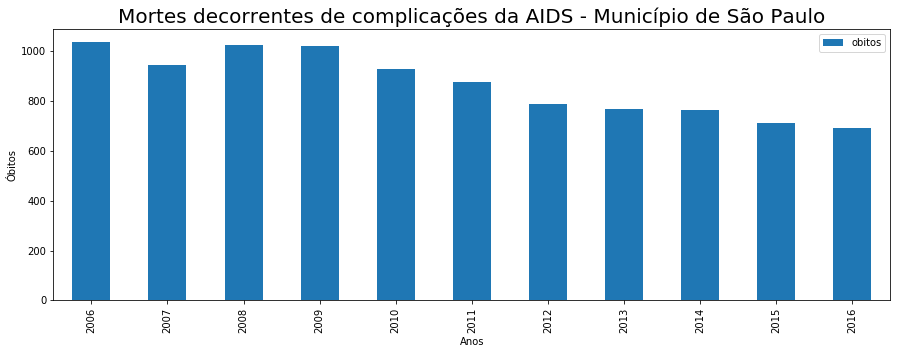

In [41]:
anos_sp = pd.read_csv('./dados/anos_sp.csv',sep=';',encoding='ANSI')
anos_sp.plot(kind='bar',x='ano', figsize=(15,5))
plt.title('Mortes decorrentes de complicações da AIDS - Município de São Paulo',fontsize=20)
plt.ylabel('Óbitos')
plt.xlabel('Anos')

# Conclusão
### Ao realizar este trabalho, cheguei a conclusão que há uma concentração das mortes decorrentes da AIDS próximos ao município de São Paulo, permanecendo recorrente no intervalo de dez anos. No município de São Paulo é a cidade onde tem o maior número de casos, no ano de 2016 os números são 10 vezes maiores que o segundo colocado, Campinas. Dentre os anos de 2006 e 2016 houve uma queda no número de vítimas, foi de 1038, para 692, sendo assim, uma redução de 34%. 